In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter



# Đọc dữ liệu từ file CSV
df = pd.read_csv("camera.csv")




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17556\1958732453.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("camera.csv")


In [2]:
# Fix locarion columns
df["location"] = df["location"].astype("str")

## Clean data

In [3]:

df.head()


,product_base_id,name,name_normalized,price,platform_id,total_sale,rating_avg,location,official_type,url_thumbnail,...,description,status_da,buff_type,is_correct_category,is_gift,brand,partner_package_form,partner_type,price_range,brand_normalized
0,1__10000490990__85262197,Camera thông minh Xiaomi chuẩn 2K HD hoạt động...,Camera thông minh Xiaomi chuẩn 2K HD hoạt động...,540000,Shopee,35.0,NaN,Nước ngoài,0,https://cf.shopee.vn/file/abaae6d6546f0d849eec...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,400-600K,Xiaomi
1,1__10002438621__7794035,[Mã 1010ELHA1000K1 giảm 8% đơn 3TR] CAMERA VIT...,CAMERA VITACAM C1280 C1290C C600C C1290 PRO FU...,319000,Shopee,66.0,NaN,Hà Nội,0,https://cf.shopee.vn/file/sg-11134201-22120-n2...,...,NaN,NaN,NaN,NaN,NaN,vitacam,NaN,Others,<400K,Others
2,1__10007943036__3994816,Trọn Bộ Camera Hikvision 2MP FHD 1080P + Ổ Cứn...,Trọn Bộ Camera Hikvision 2MP FHD 1080P Ổ Cứng ...,1655000,Shopee,2.0,NaN,TP. Hồ Chí Minh,0,https://cf.shopee.vn/file/b6f96064dfb89e953ea1...,...,NaN,NaN,NaN,NaN,NaN,hikvision,NaN,Others,>=1000K,Hikvision
3,1__10009074912__417974504,Camera HDCVI hồng ngoại 5.0 Megapixel DAHUA DH...,Camera HDCVI hồng ngoại 5.0 Megapixel DAHUA DH...,769000,Shopee,1.0,NaN,Hà Nội,0,https://cf.shopee.vn/file/8caaec3c648e2445608f...,...,NaN,NaN,NaN,NaN,NaN,dahua,NaN,Others,600-800K,Dahua
4,1__10018837288__439677526,"Camera yoosee trong nhà xoay 360 độ, đàm thoại...",Camera yoosee trong nhà xoay 360 độ đàm thoại ...,549000,Shopee,70.0,NaN,TP. Hồ Chí Minh,0,https://cf.shopee.vn/file/1879d3e632e322db61fb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,400-600K,Yoosee


In [4]:
df.columns


Index(['product_base_id', 'name', 'name_normalized', 'price', 'platform_id',
       'total_sale', 'rating_avg', 'location', 'official_type',
       'url_thumbnail', 'url', 'shop_base_id', 'shop_name', 'shop_username',
       'total_sale_in_range', 'total_review_in_range',
       'total_revenue_in_range', 'sale_202210', 'revenue_202210',
       'sale_202211', 'revenue_202211', 'sale_202212', 'revenue_202212',
       'sale_202301', 'revenue_202301', 'sale_202302', 'revenue_202302',
       'sale_202303', 'revenue_202303', 'sale_202304', 'revenue_202304',
       'sale_202305', 'revenue_202305', 'sale_202306', 'revenue_202306',
       'sale_202307', 'revenue_202307', 'sale_202308', 'revenue_202308',
       'sale_202309', 'revenue_202309', 'partner_uses', 'product_ingredients',
       'partner_brand', 'partner_model', 'partner_price_range', 'price_max',
       'price_min', 'status_product', 'platform_created_at', 'total_review',
       'description', 'status_da', 'buff_type', 'is_correct_cat

In [5]:
df["all_revenue"] = df["revenue_202210"] + df["revenue_202211"] + df["revenue_202212"] + df["revenue_202301"] + df["revenue_202302"] + df["revenue_202303"] + df["revenue_202304"] + df["revenue_202305"] + df["revenue_202306"] + df["revenue_202307"] + df["revenue_202308"] + df["revenue_202309"]

In [6]:
df["all_sale"] = df["sale_202210"] + df["sale_202211"] + df["sale_202212"] + df["sale_202301"] + df["sale_202302"] + df["sale_202303"] + df["sale_202304"] + df["sale_202305"] + df["sale_202306"] + df["sale_202307"] + df["sale_202308"] + df["sale_202309"]


In [7]:
df["brand_normalized"].value_counts()

brand_normalized
Others       5621
Yoosee       3758
Ezviz        3443
IMOU         3218
Hikvision    1230
Dahua         699
Xiaomi        650
Kbvision      473
TP-Link       326
FNKvision     220
Tenda         124
Vstarcam      120
Onvizcam       32
Hanet          30
Deli           22
Goviz          13
Name: count, dtype: int64

In [8]:
## Xóa các cột null
null_cols = df.isnull().sum()
columns_with_many_nulls = null_cols[null_cols > 19000].index
columns_with_many_nulls

Index(['rating_avg', 'partner_uses', 'product_ingredients', 'partner_model',
       'price_max', 'price_min', 'status_product', 'platform_created_at',
       'total_review', 'description', 'status_da', 'buff_type',
       'is_correct_category', 'is_gift', 'partner_package_form'],
      dtype='object')

In [9]:
df_cleaned = df.drop(columns=columns_with_many_nulls)
print(len(df_cleaned.columns))

48


## Tổng số shop trên thị trường 


In [10]:
unique_shop = df_cleaned["shop_username"].value_counts()
count_unique_shop = len(unique_shop)
print(count_unique_shop)

3344


## Tổng số shop thương hiệu Ezviz


In [11]:
ezviz_shop = df_cleaned[df_cleaned["brand_normalized"] == "Ezviz"]
ezviz_shop.shape[0]

3443

# Slide 1

## Doanh thu thị trường theo các sàn

In [12]:
# Tạo pivot_table từ groupby
grouped_platform = df_cleaned.pivot_table(index='platform_id', values='all_revenue', aggfunc='sum')
grouped_platform_sale = df_cleaned.pivot_table(index='platform_id', values='all_sale', aggfunc='sum')
sorted_grouped_platform = grouped_platform.sort_values(by='all_revenue', ascending=False)
sorted_grouped_platform_sale = grouped_platform_sale.sort_values(by='all_sale', ascending=False)


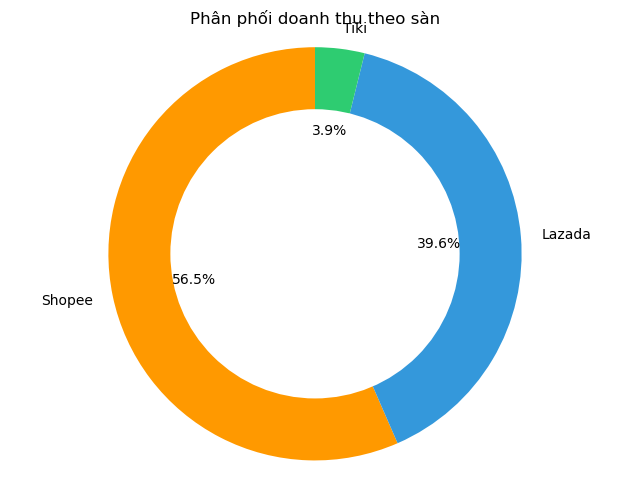

In [13]:
# Đoạn code này để tạo biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = sorted_grouped_platform["all_revenue"]

# Tiêu đề biểu đồ
title = "Phân phối doanh thu theo sàn"

plot_donut(data, title)


## Doanh thu Ezviz so với Tổng doanh thu thị trường theo các sàn

In [14]:
# Tạo pivot_table từ groupby
pivot_table_platform_ezviz = ezviz_shop.pivot_table(index='platform_id', values='all_revenue', aggfunc='sum')
sorted_pivot_table_platform_ezviz = pivot_table_platform_ezviz.sort_values(by='all_revenue', ascending=False)


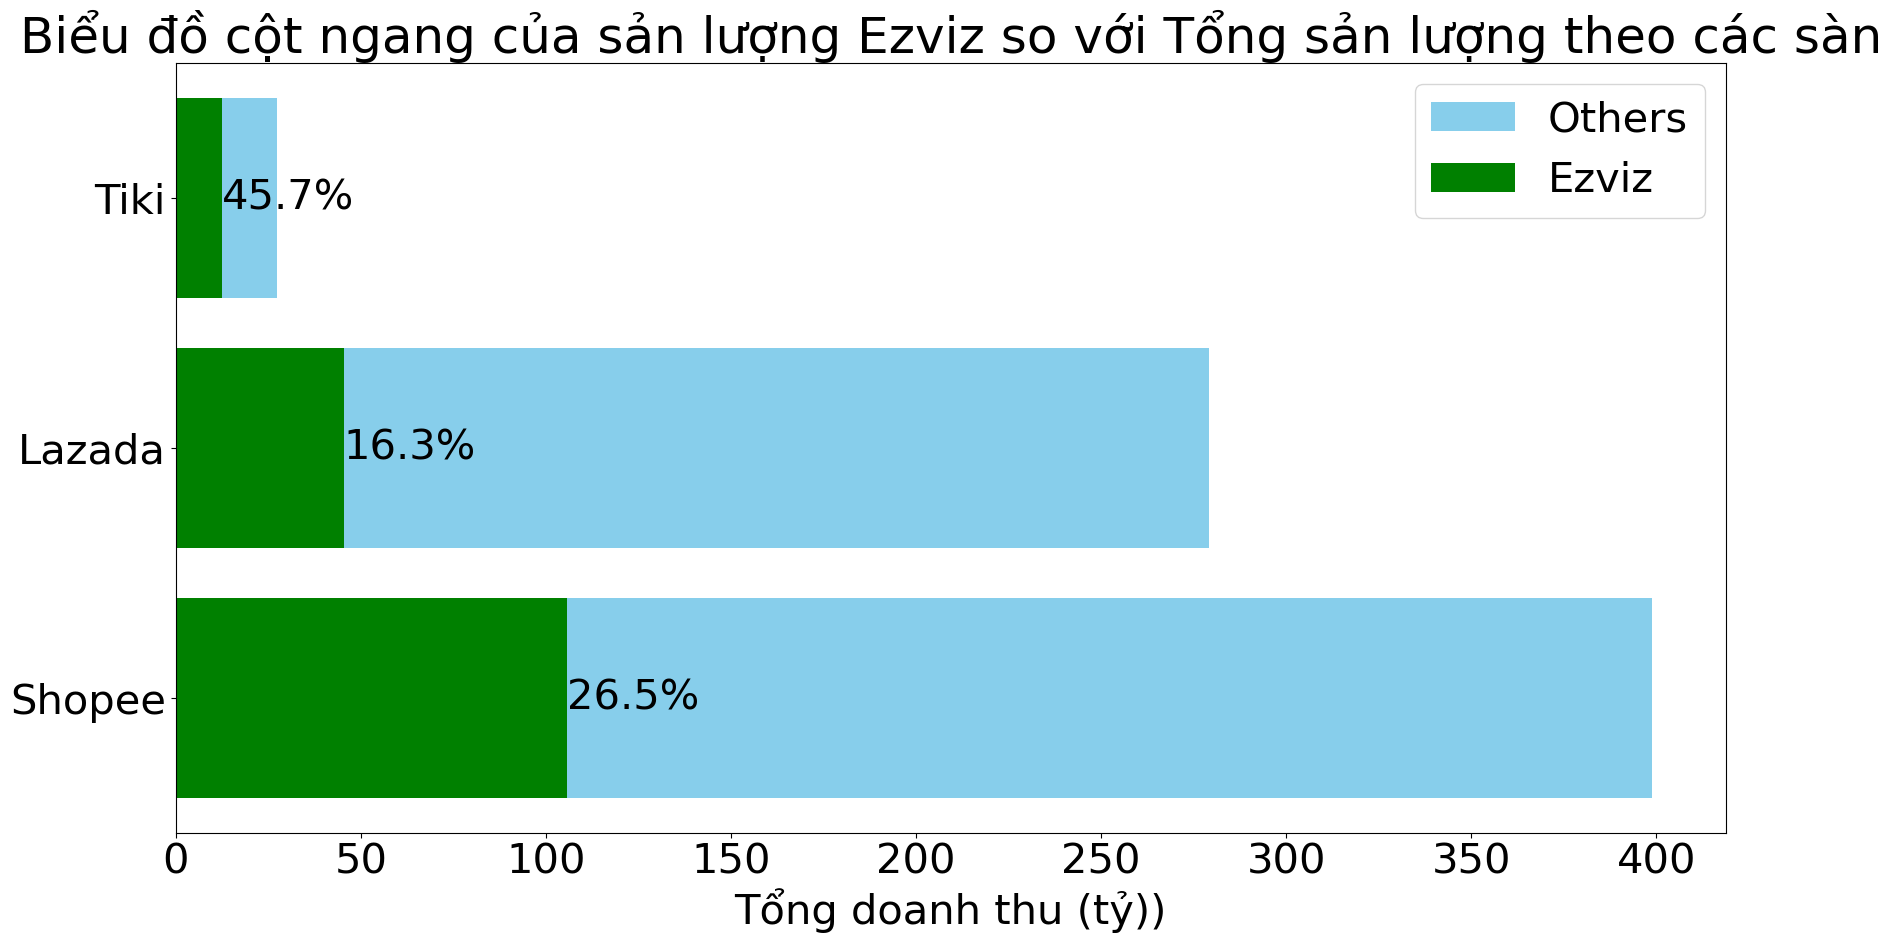

In [102]:
# Sản lượng theo sàn của thị trường
pivot_table_platform = df_cleaned.pivot_table(index='platform_id', values='all_revenue', aggfunc='sum')
sorted_pivot_table_platform = pivot_table_platform.sort_values(by='all_revenue', ascending=False)

# Sản lượng theo sàn của Ezviz
pivot_table_platform_ezviz_sale = ezviz_shop.pivot_table(index='platform_id', values='all_revenue', aggfunc='sum')
sorted_pivot_table_platform_ezviz_sale = pivot_table_platform_ezviz_sale.sort_values(by='all_revenue', ascending=False)

# Kích thước của biểu đồ
plt.figure(figsize=(20, 10))

# Lấy các giá trị cần vẽ
platforms = sorted_pivot_table_platform.index
platforms_ezviz = sorted_pivot_table_platform_ezviz_sale.index
sales = sorted_pivot_table_platform['all_revenue']
sales_ezviz = sorted_pivot_table_platform_ezviz_sale['all_revenue']

# Tính phần trăm
percentage_sales_eziviz_to_all = sales_ezviz/sales * 100

# Vẽ biểu đồ cột ngang
## Thị trường
plt.barh(platforms, sales, color='skyblue', label='Others')

## Ezviz
plt.barh(platforms_ezviz, sales_ezviz, left=[0]*len(platforms_ezviz), color='green', label='Ezviz')
for i, value in enumerate(percentage_sales_eziviz_to_all):
    plt.text(sales_ezviz[i] + 0.5, i, f'{value:.1f}%', va='center')

# Hiển thị chú thích
plt.xlabel('Tổng doanh thu (tỷ))')
plt.title('Biểu đồ cột ngang của sản lượng Ezviz so với Tổng sản lượng theo các sàn')
plt.legend()

# Định dạng lại nhãn trục hoành để hiển thị đơn vị tỷ
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()



# Slide 2

##  Sản lượng thị trường theo các sàn

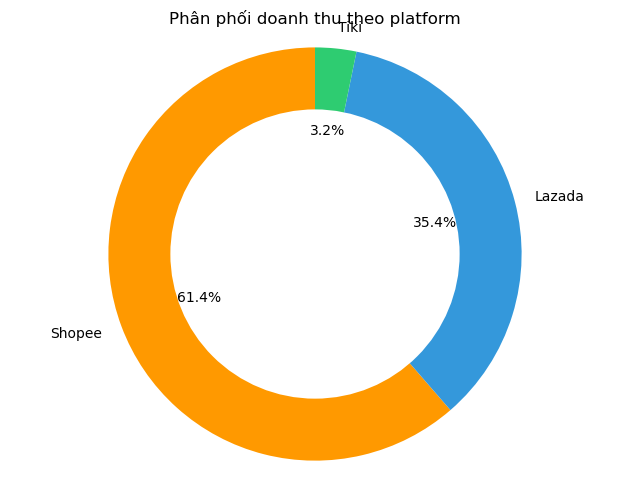

In [16]:
# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = sorted_grouped_platform_sale["all_sale"]

# Tiêu đề biểu đồ
title = "Phân phối doanh thu theo platform"

plot_donut(data, title)


## Sản lượng Ezviz so với Tổng sản lượng theo các sàn

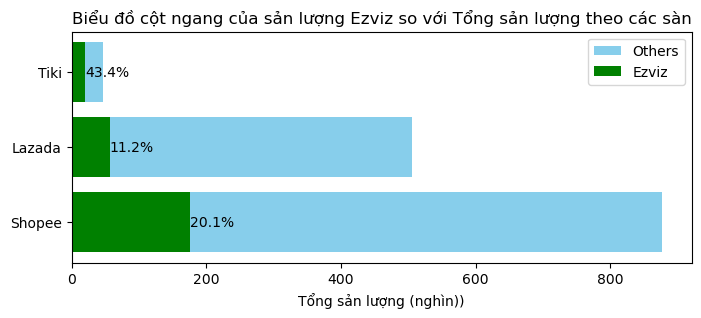

In [17]:
# Sản lượng theo sàn của thị trường
pivot_table_platform = df_cleaned.pivot_table(index='platform_id', values='all_sale', aggfunc='sum')
sorted_pivot_table_platform = pivot_table_platform.sort_values(by='all_sale', ascending=False)

# Sản lượng theo sàn của Ezviz
pivot_table_platform_ezviz_sale = ezviz_shop.pivot_table(index='platform_id', values='all_sale', aggfunc='sum')
sorted_pivot_table_platform_ezviz_sale = pivot_table_platform_ezviz_sale.sort_values(by='all_sale', ascending=False)

# Kích thước của biểu đồ
plt.figure(figsize=(8, 3))

# Lấy các giá trị cần vẽ
platforms = sorted_pivot_table_platform.index
platforms_ezviz = sorted_pivot_table_platform_ezviz_sale.index
sales = sorted_pivot_table_platform['all_sale']
sales_ezviz = sorted_pivot_table_platform_ezviz_sale['all_sale']

# Tính phần trăm
percentage_sales_eziviz_to_all = sales_ezviz/sales * 100

# Vẽ biểu đồ cột ngang
## Thị trường
plt.barh(platforms, sales, color='skyblue', label='Others')

## Ezviz
plt.barh(platforms_ezviz, sales_ezviz, left=[0]*len(platforms_ezviz), color='green', label='Ezviz')
for i, value in enumerate(percentage_sales_eziviz_to_all):
    plt.text(sales_ezviz[i] + 0.5, i, f'{value:.1f}%', va='center')

# Hiển thị chú thích
plt.xlabel('Tổng sản lượng (nghìn))')
plt.title('Biểu đồ cột ngang của sản lượng Ezviz so với Tổng sản lượng theo các sàn')
plt.legend()

# Định dạng lại nhãn trục hoành để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e3:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()


## Tăng trưởng doanh số toàn thị trường của T9/2023 so với T8/2023

In [18]:
percentage_change = round(((df_cleaned["revenue_202309"].sum() - df_cleaned["revenue_202308"].sum()) / df_cleaned["revenue_202309"].sum()) * 100, 2)

print(f"Phần trăm thay đổi là: {percentage_change}%")


Phần trăm thay đổi là: -10.48%


## Doanh thu của toàn thị trường

In [19]:
columns_to_sum = ['revenue_202308', 'revenue_202309', 'revenue_202210', 'revenue_202211', 'revenue_202212', 'revenue_202307', 'revenue_202306', 'revenue_202305', 'revenue_202304', 'revenue_202303', 'revenue_202302', 'revenue_202301']
df_cleaned['total_revenue'] = df_cleaned[columns_to_sum].sum(axis=1)
revenue_combined = pd.pivot_table(df_cleaned, values='total_revenue', index='platform_id', aggfunc='sum')
revenue_combined

,total_revenue
platform_id,
Lazada,279218753779
Shopee,398799740344
Tiki,27251600558


## Sản lượng của toàn thị trường


In [20]:
columns_to_sum = ['sale_202308', 'sale_202309', 'sale_202210', 'sale_202211', 'sale_202212', 'sale_202307', 'sale_202306', 'sale_202305', 'sale_202304', 'sale_202303', 'sale_202302', 'sale_202301']
df_cleaned['total_sale'] = df_cleaned[columns_to_sum].sum(axis=1)
revenue_combined = pd.pivot_table(df_cleaned, values='total_sale', index='platform_id', aggfunc='sum')
revenue_combined

,total_sale
platform_id,
Lazada,505666
Shopee,876589
Tiki,45959


## Doanh thu tháng 8 năm 2023 của Ezviz

In [21]:
revenue_ezviz_202308 = pd.pivot_table(ezviz_shop, values='revenue_202308', index='platform_id', aggfunc='sum')
revenue_ezviz_202308

,revenue_202308
platform_id,
Lazada,2640065640
Shopee,9950402937
Tiki,718386886


## Tăng trưởng doanh số của Ezviz  T9/2023 so với T8/2023

In [22]:
percentage_change = round(((ezviz_shop["revenue_202309"].sum() - ezviz_shop["revenue_202308"].sum()) / ezviz_shop["revenue_202309"].sum()) * 100, 2)

print(f"Phần trăm thay đổi là: {percentage_change}%")

Phần trăm thay đổi là: 6.72%


## Tăng trưởng sản lượng toàn thị trường của T9/2023 so với T8/2023

In [23]:
percentage_change = round(((df_cleaned["sale_202309"].sum() - df_cleaned["sale_202308"].sum()) / df_cleaned["sale_202309"].sum()) * 100, 2)

print(f"Phần trăm thay đổi là: {percentage_change}%")


Phần trăm thay đổi là: -11.18%


## Tăng trưởng sản lượng của Ezviz T9/2023 so với T8/2023

In [24]:
percentage_change = round(((ezviz_shop["sale_202309"].sum() - ezviz_shop["sale_202308"].sum()) / ezviz_shop["sale_202309"].sum()) * 100, 2)

print(f"Phần trăm thay đổi là: {percentage_change}%")

Phần trăm thay đổi là: 1.41%


## Q4_2022_sale

In [25]:
df_cleaned["q4_2022_sale"] = df_cleaned["sale_202210"] + df_cleaned["sale_202211"] + df_cleaned["sale_202212"]

## Q4_2022_revenue

In [26]:
df_cleaned["q4_2022_revenue"] = df_cleaned["revenue_202210"] + df_cleaned["revenue_202211"] + df_cleaned["revenue_202212"]

## Q1_2023_sale

In [27]:
df_cleaned["q1_2023_sale"] = df_cleaned["sale_202301"] + df_cleaned["sale_202302"] + df_cleaned["sale_202303"]

## Q1_2023_revenue

In [28]:
df_cleaned["q1_2023_revenue"] = df_cleaned["revenue_202301"] + df_cleaned["revenue_202302"] + df_cleaned["revenue_202303"]

## Q2_2023_sale

In [29]:
df_cleaned["q2_2023_sale"] = df_cleaned["sale_202304"] + df_cleaned["sale_202305"] + df_cleaned["sale_202306"]

## Q2_2023_revenue

In [30]:
df_cleaned["q2_2023_revenue"] = df_cleaned["revenue_202304"] + df_cleaned["revenue_202305"] + df_cleaned["revenue_202306"]

## Q3_2023_sale

In [31]:
df_cleaned["q3_2023_sale"] = df_cleaned["sale_202307"] + df_cleaned["sale_202308"] + df_cleaned["sale_202309"]

## Q3_2023_revenue

In [32]:
df_cleaned["q3_2023_revenue"] = df_cleaned["revenue_202307"] + df_cleaned["revenue_202308"] + df_cleaned["revenue_202309"]

In [33]:
df_cleaned.columns

Index(['product_base_id', 'name', 'name_normalized', 'price', 'platform_id',
       'total_sale', 'location', 'official_type', 'url_thumbnail', 'url',
       'shop_base_id', 'shop_name', 'shop_username', 'total_sale_in_range',
       'total_review_in_range', 'total_revenue_in_range', 'sale_202210',
       'revenue_202210', 'sale_202211', 'revenue_202211', 'sale_202212',
       'revenue_202212', 'sale_202301', 'revenue_202301', 'sale_202302',
       'revenue_202302', 'sale_202303', 'revenue_202303', 'sale_202304',
       'revenue_202304', 'sale_202305', 'revenue_202305', 'sale_202306',
       'revenue_202306', 'sale_202307', 'revenue_202307', 'sale_202308',
       'revenue_202308', 'sale_202309', 'revenue_202309', 'partner_brand',
       'partner_price_range', 'brand', 'partner_type', 'price_range',
       'brand_normalized', 'all_revenue', 'all_sale', 'total_revenue',
       'q4_2022_sale', 'q4_2022_revenue', 'q1_2023_sale', 'q1_2023_revenue',
       'q2_2023_sale', 'q2_2023_revenue', 

## pivote table doanh thu  theo sàn và theo quý



In [34]:
quarter_columns = ['q4_2022_revenue', 'q1_2023_revenue', 'q2_2023_revenue', 'q3_2023_revenue']
pivot_df_quarter = pd.pivot_table(df_cleaned, 
                           index='platform_id', 
                           values=quarter_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_quarter.loc['Total'] = pivot_df_quarter.sum()
pivot_df_quarter


,q1_2023_revenue,q2_2023_revenue,q3_2023_revenue,q4_2022_revenue
platform_id,,,,
Lazada,63515903054,81207123730,66754232582,67741494413
Shopee,87962223038,92341365518,117472110523,101024041265
Tiki,7589673657,5446851825,5117559911,9097515165
Total,159067799749,178995341073,189343903016,177863050843


In [35]:
pivot_df_quarter_drop_total = pivot_df_quarter.copy().iloc[0:3,:]
pivot_df_quarter_drop_total

,q1_2023_revenue,q2_2023_revenue,q3_2023_revenue,q4_2022_revenue
platform_id,,,,
Lazada,63515903054,81207123730,66754232582,67741494413
Shopee,87962223038,92341365518,117472110523,101024041265
Tiki,7589673657,5446851825,5117559911,9097515165


In [103]:
percent_quarter_revenu = []
for quarter in pivot_df_quarter_drop_total.columns:
    for revenue in pivot_df_quarter_drop_total[quarter]:
        percent_quarter_revenu.append(round((revenue/(pivot_df_quarter_drop_total[quarter]).sum() * 100),2))
print(percent_quarter_revenu)

[39.93, 55.3, 4.77, 45.37, 51.59, 3.04, 35.26, 62.04, 2.7, 38.09, 56.8, 5.11]


# Slide 4

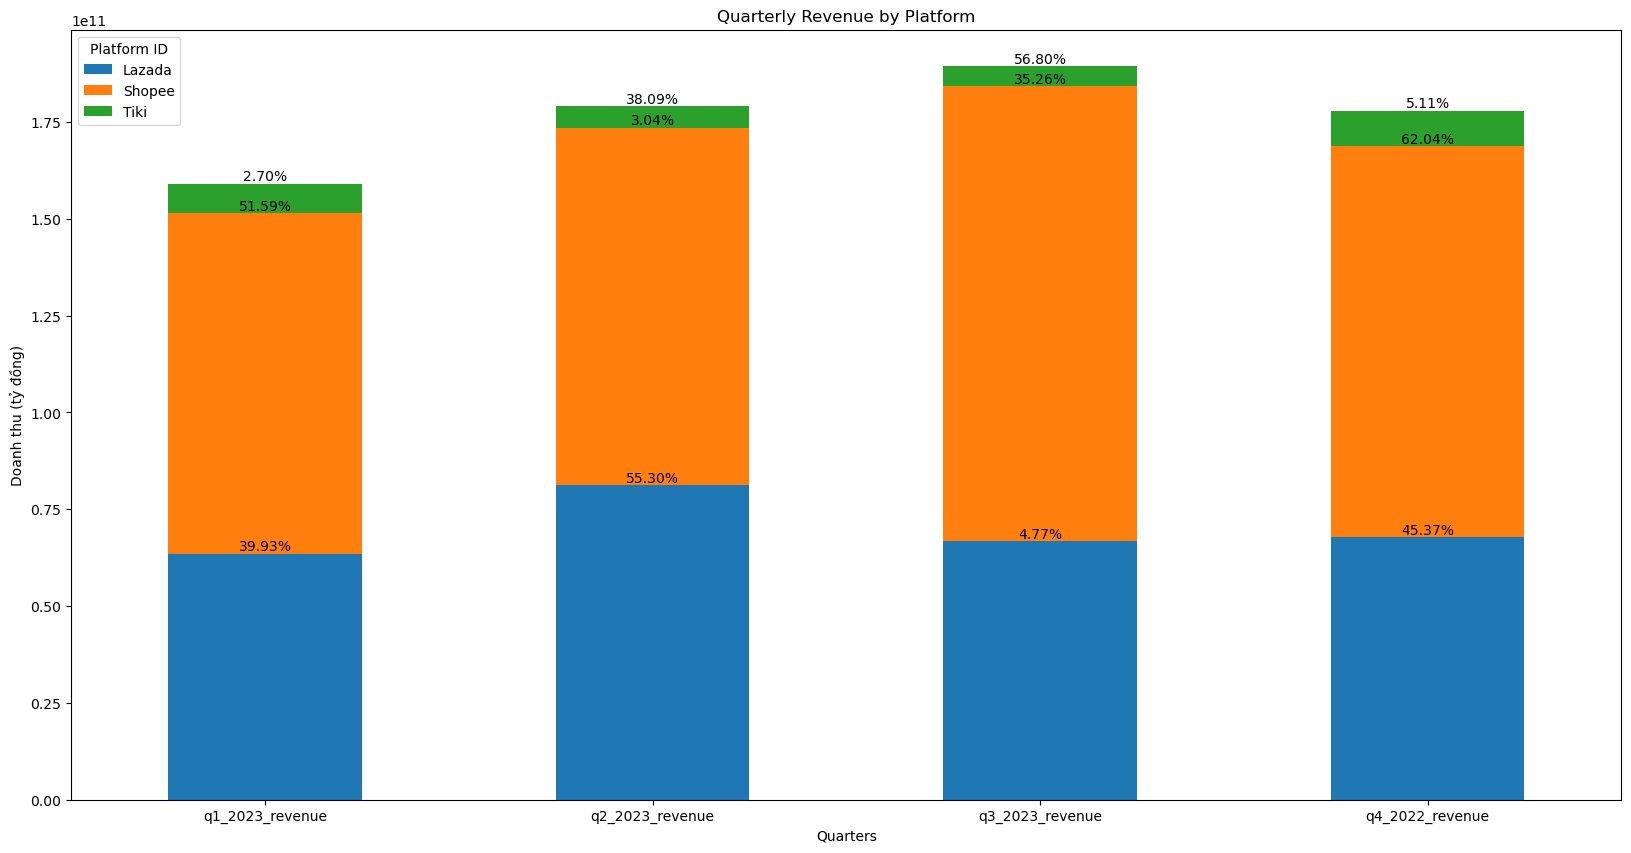

In [37]:
pivot_df_quarter_drop_total = pivot_df_quarter.copy().iloc[0:3,:]

# Vẽ biểu đồ cột
ax = pivot_df_quarter_drop_total.transpose().plot(kind='bar', stacked=True, figsize=(20, 10))

# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    value = [39.93, 55.3, 4.77, 45.37, 51.59, 3.04, 35.26, 62.04, 2.7, 38.09, 56.8, 5.11][i]
    ax.text(x + width / 2, y + height , f'{value:.2f}%', ha='center', va='bottom', color='black')

# Thiết lập tiêu đề và nhãn trục
plt.title('Quarterly Revenue by Platform')
plt.xlabel('Quarters')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.ylabel('Doanh thu (tỷ đồng)')

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Hiển thị biểu đồ
plt.show()

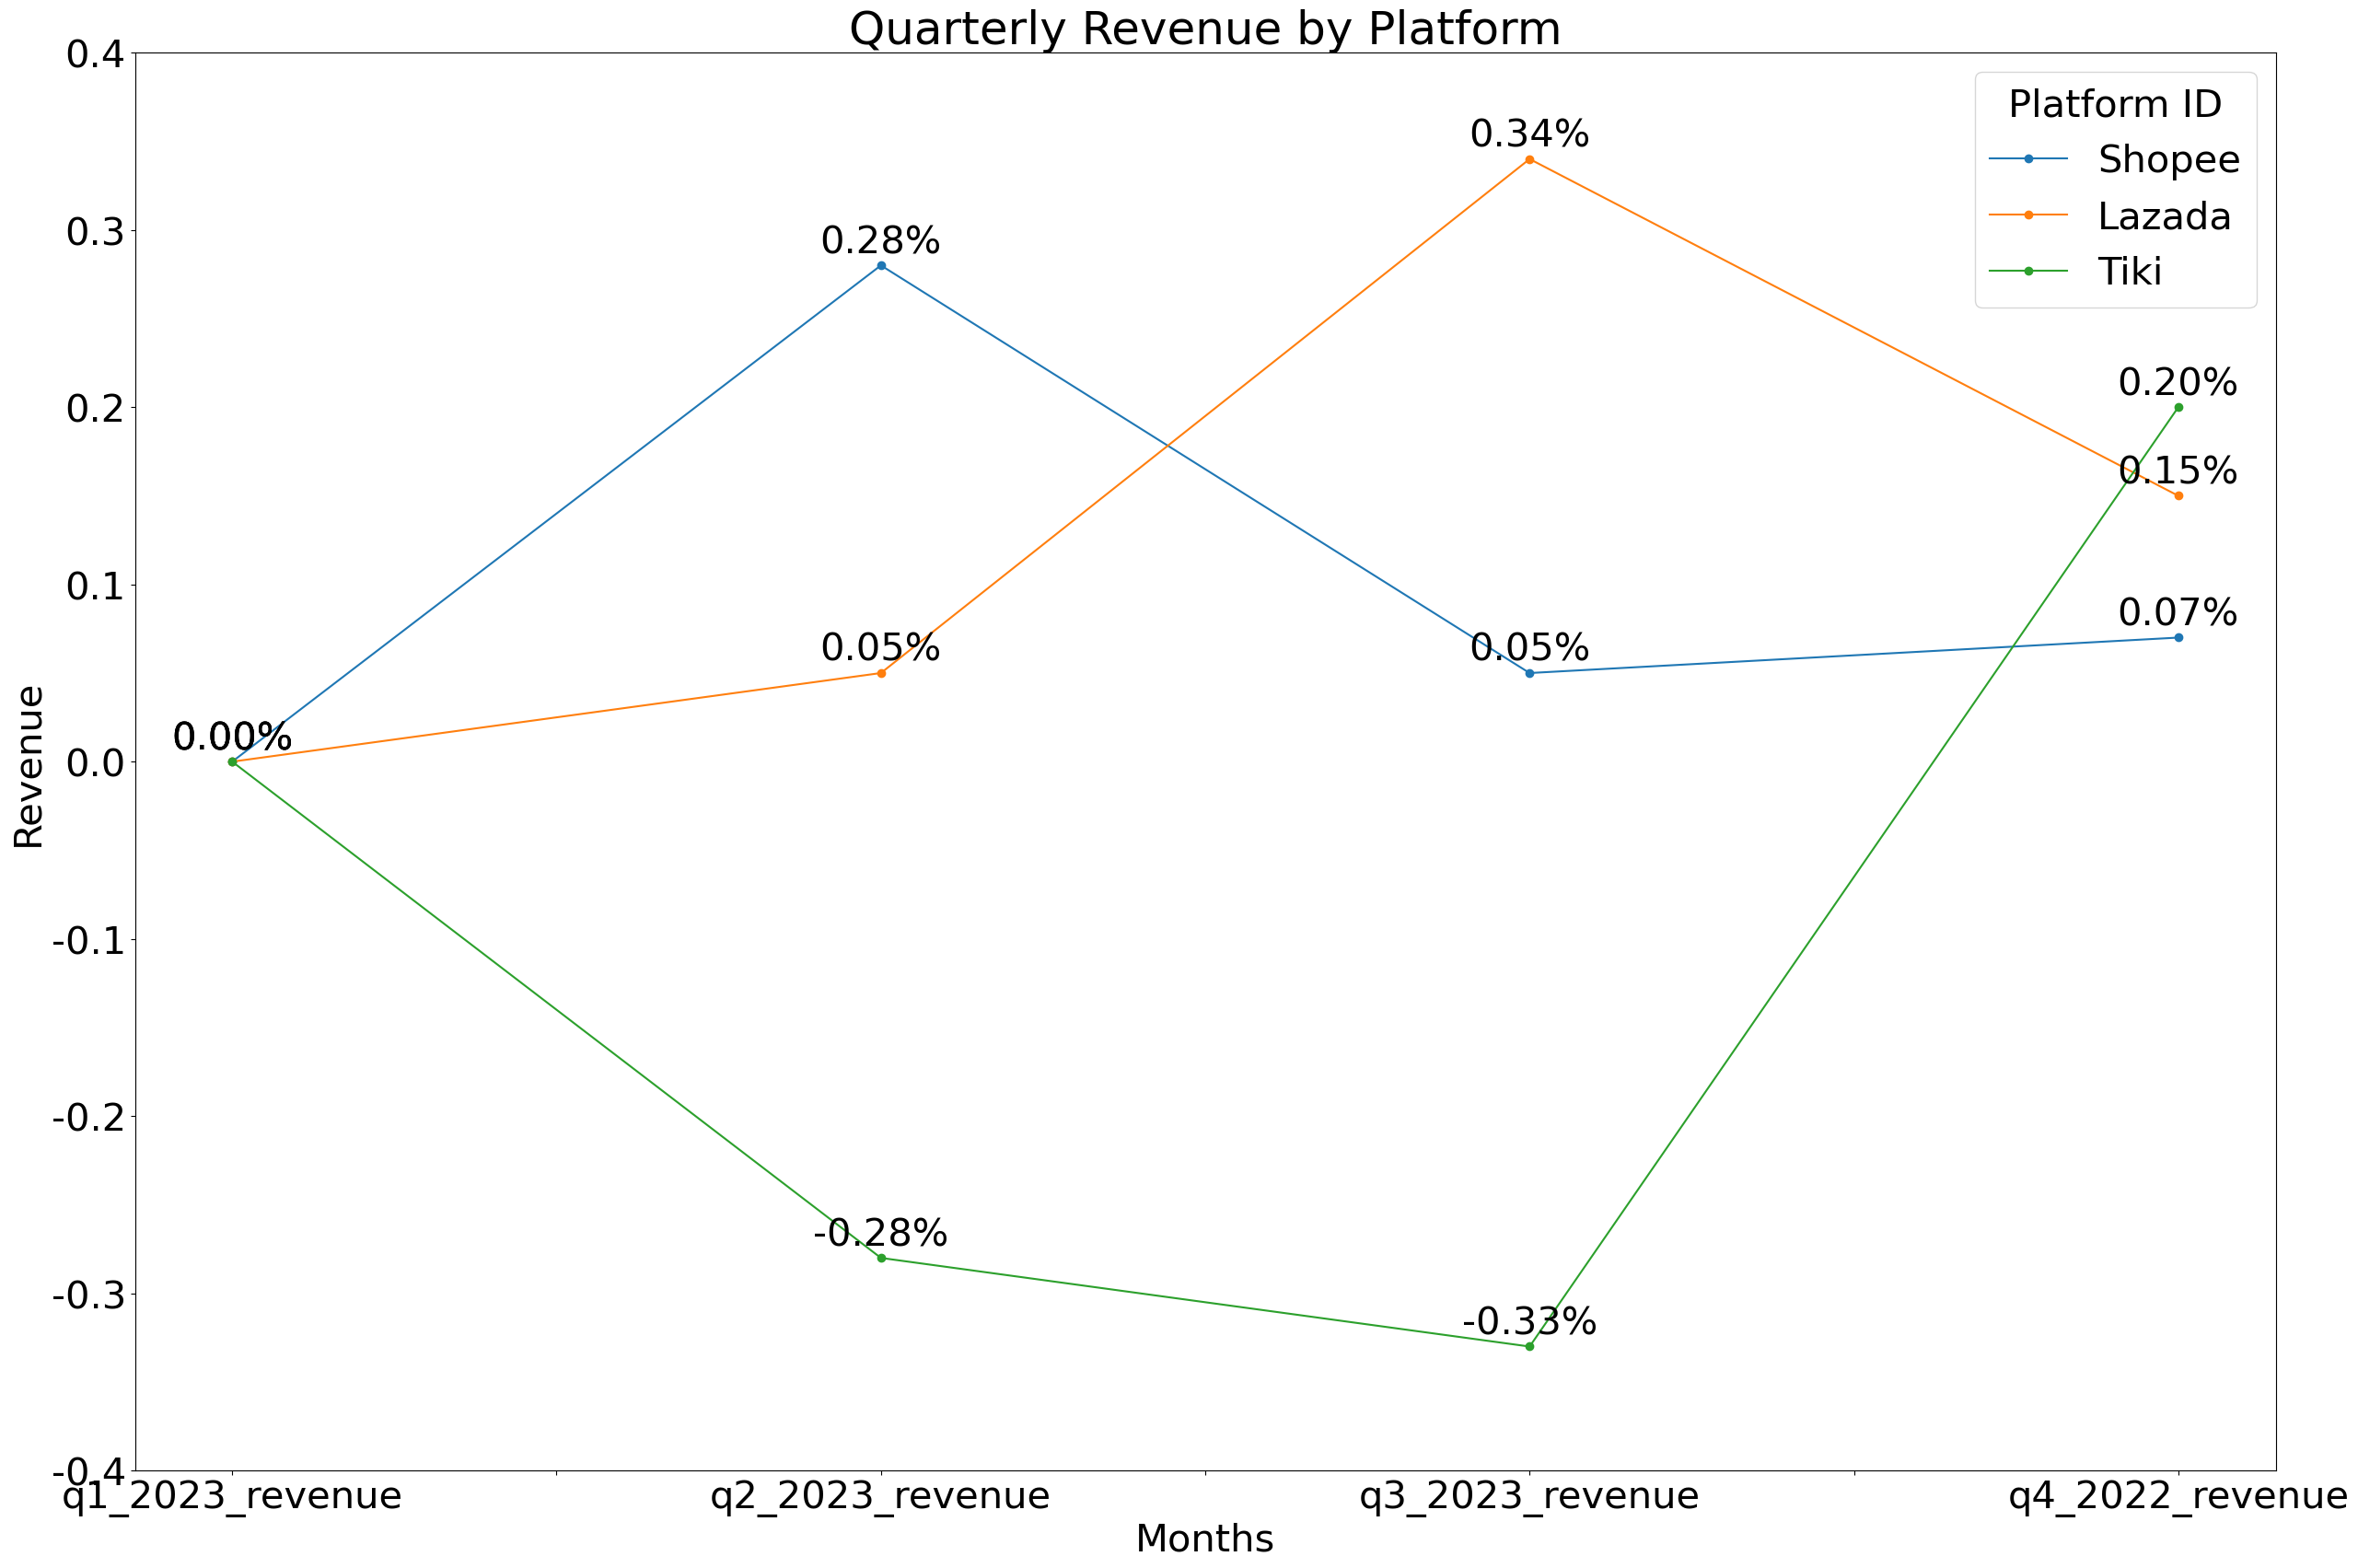

platform_id           Lazada        Shopee        Tiki
q1_2023_revenue  63515903054   87962223038  7589673657
q2_2023_revenue  81207123730   92341365518  5446851825
q3_2023_revenue  66754232582  117472110523  5117559911
q4_2022_revenue  67741494413  101024041265  9097515165


In [98]:
pivot_df_quarter_drop_total = pivot_df_quarter.copy().iloc[0:3,:]
trans_pivot_df_quarter_drop_total = pivot_df_quarter_drop_total.transpose()

# Phần trăm
percent_line_revenue = []
for platform in trans_pivot_df_quarter_drop_total.columns:
    for revenue in trans_pivot_df_quarter_drop_total[platform]:
        percent_line_revenue.append(round(((revenue/(trans_pivot_df_quarter_drop_total[platform])[0]))-1,2))

# Dữ liệu cho DataFrame
data = [
    [0.0, 0.28, 0.05, 0.07],
    [0.0, 0.05, 0.34, 0.15],
    [0.0, -0.28, -0.33, 0.2]
]

# Tên cột cho DataFrame
columns = ["q1_2023_revenue", "q2_2023_revenue", "q3_2023_revenue", "q4_2022_revenue"]

# Tên hàng cho DataFrame
index = ["Shopee", "Lazada", "Tiki"]

# Tạo DataFrame
df_line_quarter = pd.DataFrame(data, columns=columns, index=index)
df_line_quarter_trans = df_line_quarter.transpose()

# Vẽ biểu đồ đường
ax = df_line_quarter_trans.plot(kind='line', marker='o', figsize=(30, 20))

# Thiết lập tiêu đề và nhãn trục
plt.title('Quarterly Revenue by Platform')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.yticks(ax.get_yticks(), [f'{y/1e0:.1f}' for y in ax.get_yticks()])

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Thêm giá trị trực tiếp trên mỗi điểm dữ liệu
for platform in df_line_quarter_trans.columns:
    for i, value in enumerate(df_line_quarter_trans[platform]):
        ax.annotate(f'{value:.2f}%', (i, value), textcoords="offset points", xytext=(0,10), ha='center')

# Hiển thị biểu đồ
plt.show()
print(trans_pivot_df_quarter_drop_total)

## pivote table doanh thu  theo sàn và theo tháng



In [39]:
months_columns = [
       'revenue_202210', 'revenue_202211',
       'revenue_202212', 'revenue_202301',
       'revenue_202302', 'revenue_202303',
       'revenue_202304', 'revenue_202305',
       'revenue_202306', 'revenue_202307',
       'revenue_202308', 'revenue_202309']
pivot_df_months = pd.pivot_table(df_cleaned, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_months.loc['Total'] = pivot_df_months.sum()
pivot_df_months

,revenue_202210,revenue_202211,revenue_202212,revenue_202301,revenue_202302,revenue_202303,revenue_202304,revenue_202305,revenue_202306,revenue_202307,revenue_202308,revenue_202309
platform_id,,,,,,,,,,,,
Lazada,20673399730,23155559636,23912535047,14959996880,20541910831,28013995343,24588005371,26447189913,30171928446,27030954269,22712167533,17011110780
Shopee,34053976707,30086495279,36883569279,23048776750,31059692195,33853754093,32686702995,28977548851,30677113672,36028597144,40848629851,40594883528
Tiki,2310096902,3474150230,3313268033,2554491186,2230590732,2804591739,2128326849,1543061644,1775463332,2109663196,1618972748,1388923967
Total,57037473339,56716205145,64109372359,40563264816,53832193758,64672341175,59403035215,56967800408,62624505450,65169214609,65179770132,58994918275


In [40]:
pivot_df_months_drop_total = pivot_df_months.iloc[0:3,:]
pivot_df_months_drop_total

,revenue_202210,revenue_202211,revenue_202212,revenue_202301,revenue_202302,revenue_202303,revenue_202304,revenue_202305,revenue_202306,revenue_202307,revenue_202308,revenue_202309
platform_id,,,,,,,,,,,,
Lazada,20673399730,23155559636,23912535047,14959996880,20541910831,28013995343,24588005371,26447189913,30171928446,27030954269,22712167533,17011110780
Shopee,34053976707,30086495279,36883569279,23048776750,31059692195,33853754093,32686702995,28977548851,30677113672,36028597144,40848629851,40594883528
Tiki,2310096902,3474150230,3313268033,2554491186,2230590732,2804591739,2128326849,1543061644,1775463332,2109663196,1618972748,1388923967


In [41]:
percent_month_revenu = []
for month in pivot_df_months_drop_total.columns:
    for revenue in pivot_df_months_drop_total[month]:
        percent_month_revenu.append(round((revenue/(pivot_df_months_drop_total[month]).sum() * 100),2))
print(percent_month_revenu)

[36.25, 59.7, 4.05, 40.83, 53.05, 6.13, 37.3, 57.53, 5.17, 36.88, 56.82, 6.3, 38.16, 57.7, 4.14, 43.32, 52.35, 4.34, 41.39, 55.03, 3.58, 46.42, 50.87, 2.71, 48.18, 48.99, 2.84, 41.48, 55.28, 3.24, 34.85, 62.67, 2.48, 28.83, 68.81, 2.35]


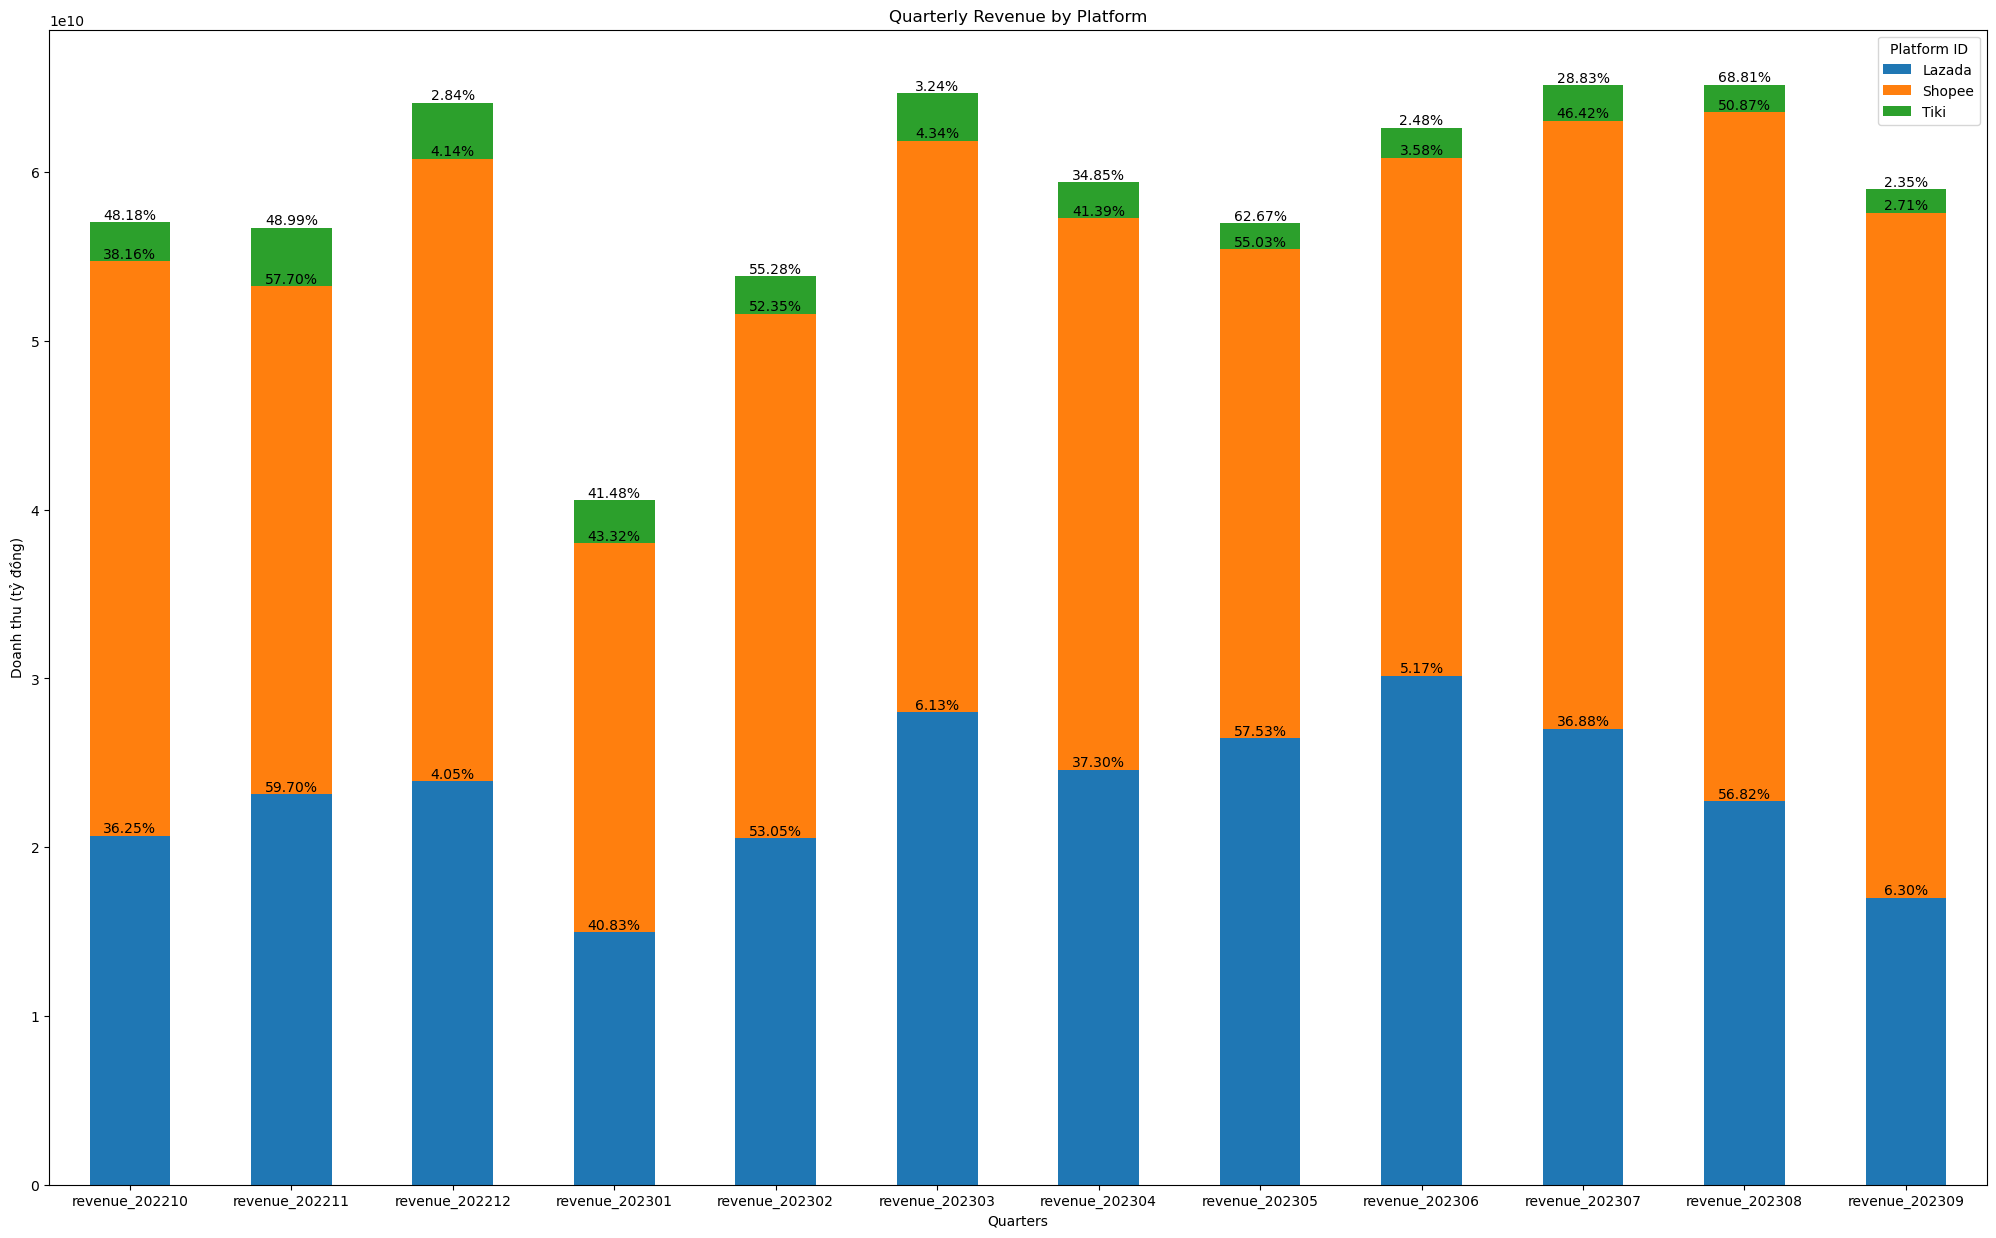

In [42]:

# Vẽ biểu đồ cột
ax = pivot_df_months_drop_total.transpose().plot(kind='bar', stacked=True, figsize=(25, 15))

# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    value = [36.25, 59.7, 4.05, 40.83, 53.05, 6.13, 37.3, 57.53, 5.17, 36.88, 56.82, 6.3, 38.16, 57.7, 4.14, 43.32, 52.35, 4.34, 41.39, 55.03, 3.58, 46.42, 50.87, 2.71, 48.18, 48.99, 2.84, 41.48, 55.28, 3.24, 34.85, 62.67, 2.48, 28.83, 68.81, 2.35][i]
    ax.text(x + width / 2, y + height , f'{value:.2f}%', ha='center', va='bottom', color='black')

# Thiết lập tiêu đề và nhãn trục
plt.title('Quarterly Revenue by Platform')
plt.xlabel('Quarters')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.ylabel('Doanh thu (tỷ đồng)')

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Hiển thị biểu đồ
plt.show()


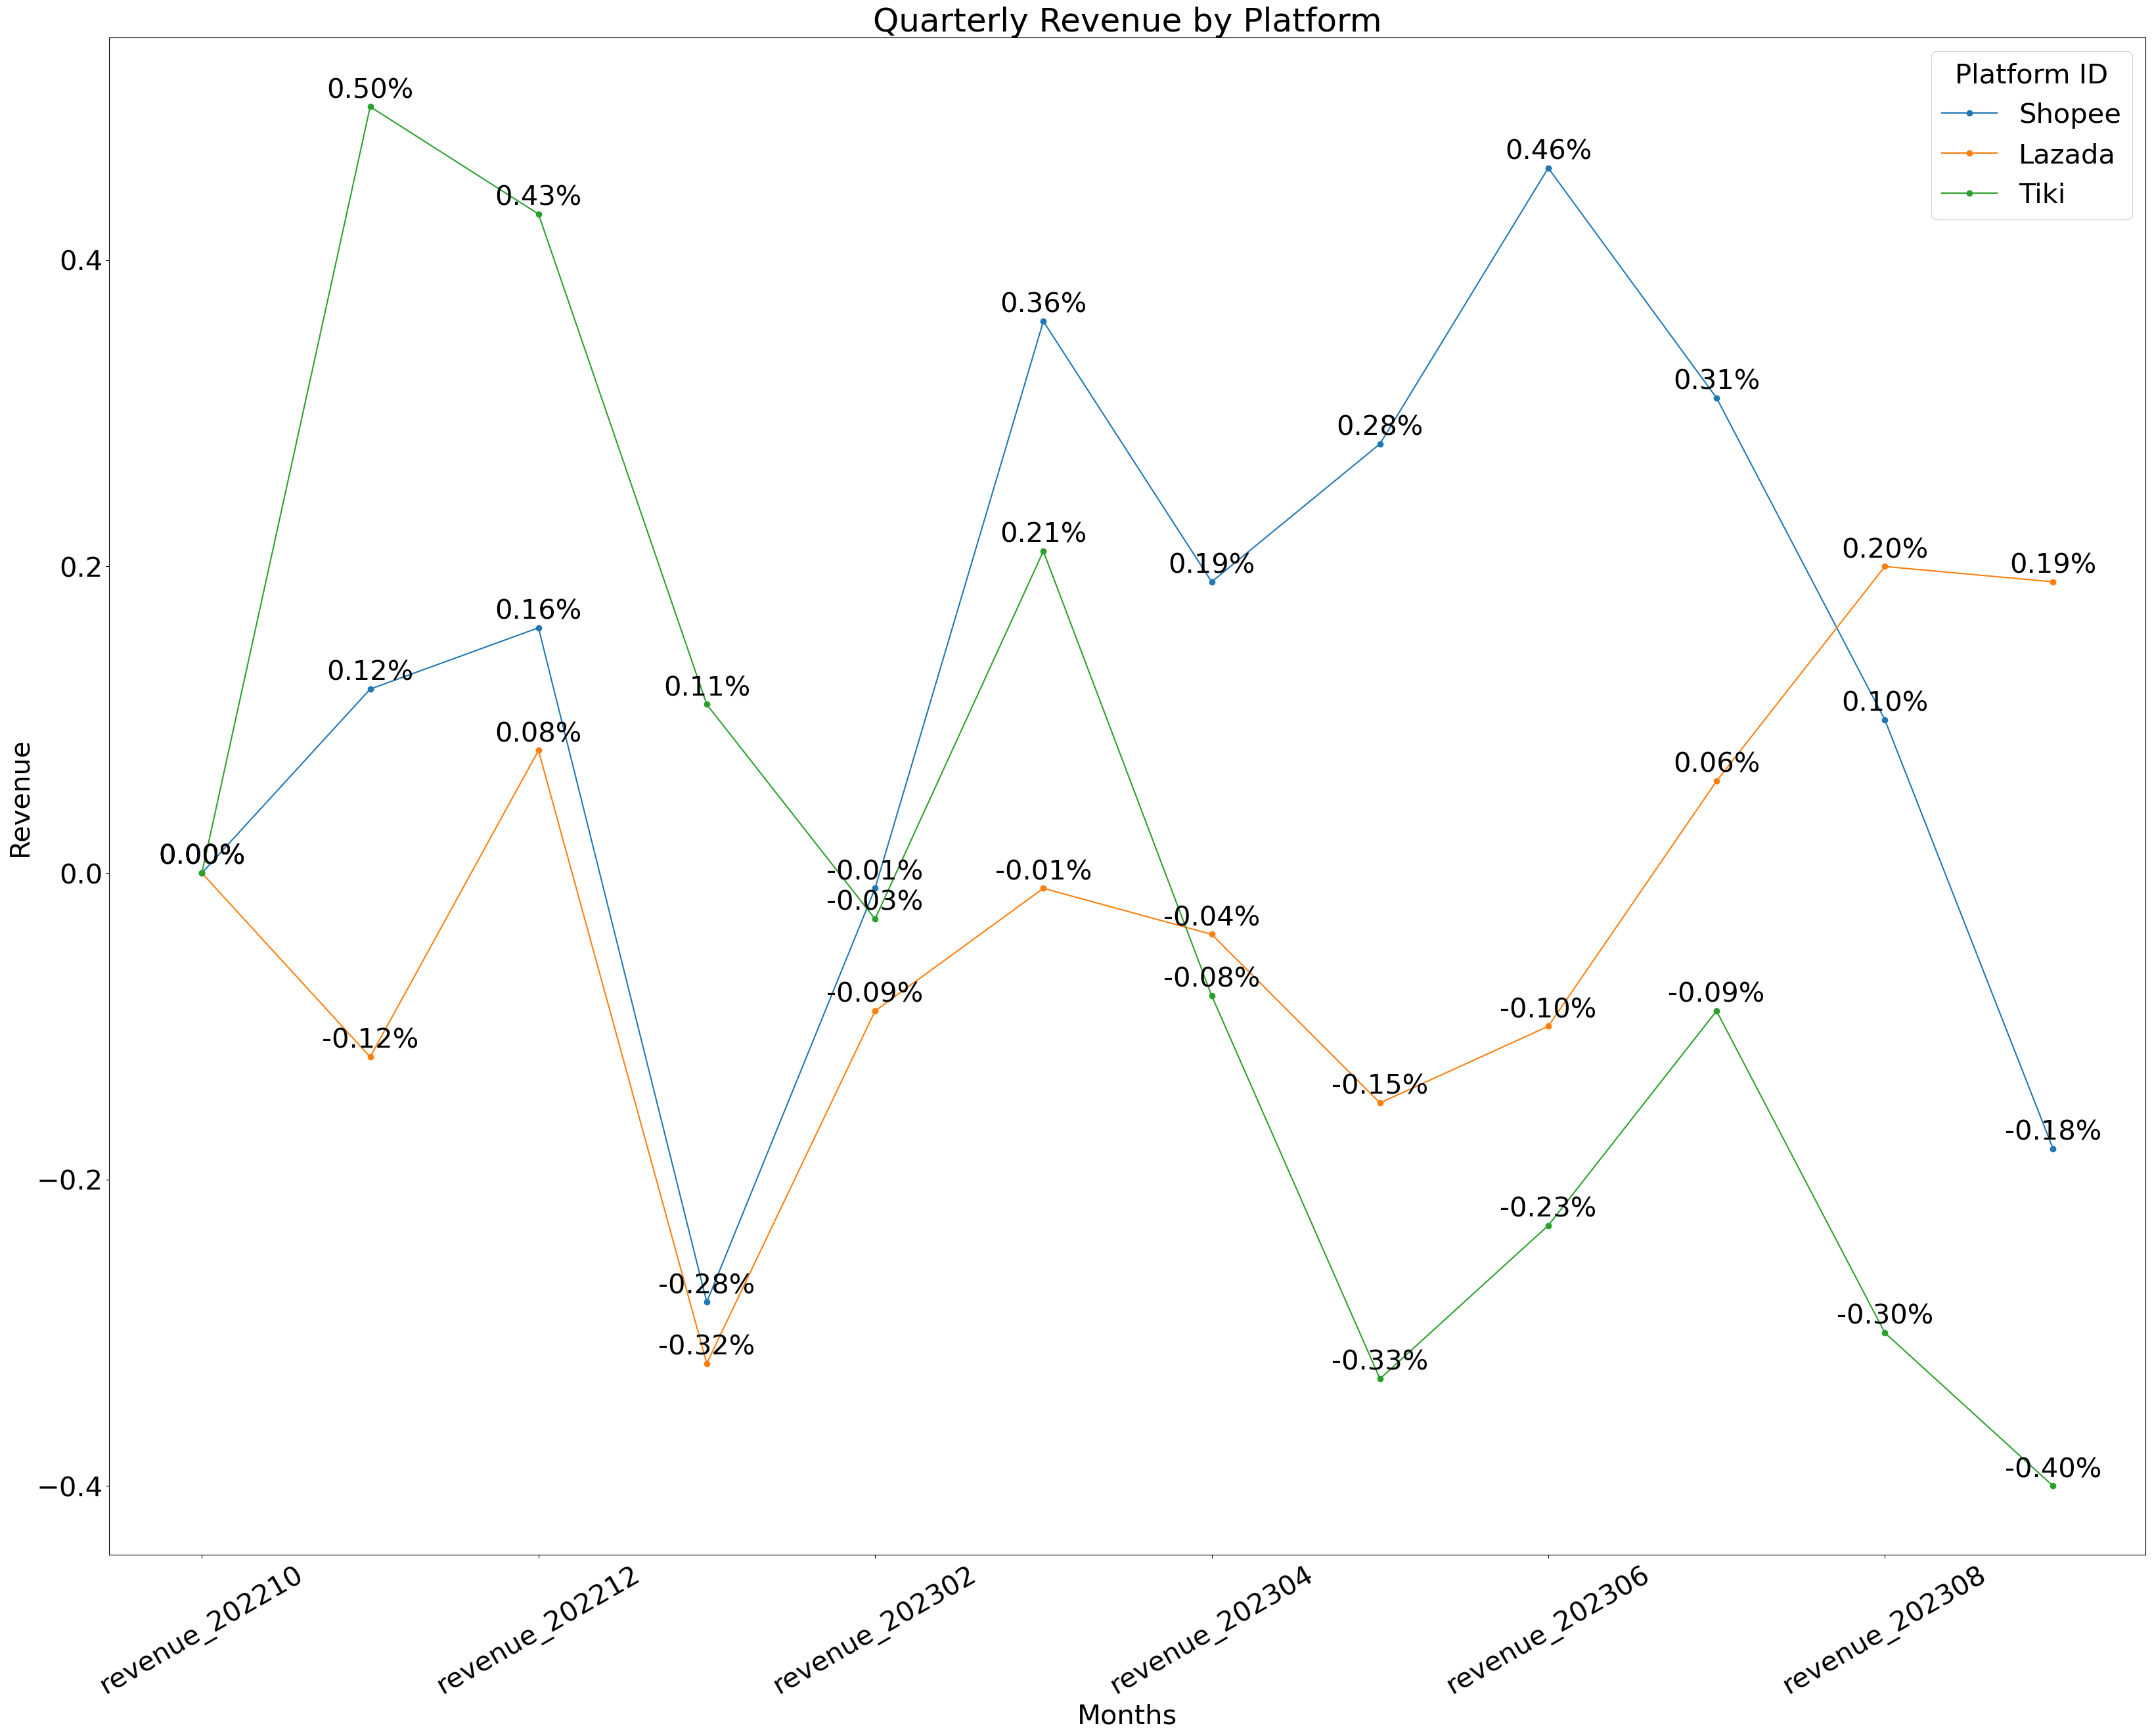

In [96]:
pivot_df_months_drop_total_trans = pivot_df_months_drop_total.transpose()
# Phần trăm
percent_line_revenue_month = []
for platform in pivot_df_months_drop_total_trans.columns:
    for revenue in pivot_df_months_drop_total_trans[platform]:
        percent_line_revenue_month.append(round(((revenue/(pivot_df_months_drop_total_trans[platform])[0]))-1,2))
import pandas as pd

# Dữ liệu cho DataFrame mới
data_new = [
    [0.0, 0.12, 0.16, -0.28, -0.01, 0.36, 0.19, 0.28, 0.46, 0.31, 0.1, -0.18],
    [0.0, -0.12, 0.08, -0.32, -0.09, -0.01, -0.04, -0.15, -0.1, 0.06, 0.2, 0.19],
    [0.0, 0.5, 0.43, 0.11, -0.03, 0.21, -0.08, -0.33, -0.23, -0.09, -0.3, -0.4]
]

# Tên cột cho DataFrame mới
columns_new  = ["revenue_202210", "revenue_202211", "revenue_202212", "revenue_202301", "revenue_202302", "revenue_202303", "revenue_202304", "revenue_202305", "revenue_202306", "revenue_202307", "revenue_202308", "revenue_202309"]

# Tên hàng cho DataFrame mới
index_new = ["Shopee", "Lazada", "Tiki"]

# Tạo DataFrame mới
df_month_revenue_line = pd.DataFrame(data_new, columns=columns_new, index=index_new)
df_month_revenue_line_trans = df_month_revenue_line.transpose()
# Vẽ biểu đồ đường
ax = df_month_revenue_line_trans.plot(kind='line', marker='o', figsize=(40, 30))

# Thiết lập tiêu đề và nhãn trục
plt.title('Quarterly Revenue by Platform')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.xticks(rotation = 30)

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Thêm giá trị trực tiếp trên mỗi điểm dữ liệu
for platform in df_line_quarter_trans.columns:
    for i, value in enumerate(df_month_revenue_line_trans[platform]):
        ax.annotate(f'{value:.2f}%', (i, value), textcoords="offset points", xytext=(0,10), ha='center')

# Hiển thị biểu đồ
plt.show()



## pivote table sản lượng theo sàn và theo quý


In [44]:
quarter_columns = ['q4_2022_sale', 'q1_2023_sale', 'q2_2023_sale', 'q3_2023_sale']
pivot_df = pd.pivot_table(df_cleaned, 
                           index='platform_id', 
                           values=quarter_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

,q1_2023_sale,q2_2023_sale,q3_2023_sale,q4_2022_sale
platform_id,,,,
Lazada,115800,144934,117697,127235
Shopee,185355,200771,255787,234676
Tiki,13237,9078,8972,14672
Total,314392,354783,382456,376583


## pivote table sản lượng  theo sàn và theo tháng


In [45]:
months_columns = [
       'sale_202210', 'sale_202211',
       'sale_202212', 'sale_202301',
       'sale_202302', 'sale_202303',
       'sale_202304', 'sale_202305',
       'sale_202306', 'sale_202307',
       'sale_202308', 'sale_202309']
pivot_df = pd.pivot_table(df_cleaned, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

,sale_202210,sale_202211,sale_202212,sale_202301,sale_202302,sale_202303,sale_202304,sale_202305,sale_202306,sale_202307,sale_202308,sale_202309
platform_id,,,,,,,,,,,,
Lazada,35769,44521,46945,29387,38855,47558,44285,47231,53418,46861,40177,30659
Shopee,82221,60036,92419,48323,64794,72238,70141,64234,66396,77925,90706,87156
Tiki,3814,5640,5218,4254,3770,5213,3577,2594,2907,3686,2831,2455
Total,121804,110197,144582,81964,107419,125009,118003,114059,122721,128472,133714,120270


## Doanh thu của từng mức giá


In [104]:

pivot_df_price = pd.pivot_table(df_cleaned, 
                           index='price_range', 
                           values= 'all_revenue', 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_price.loc['Total'] = pivot_df_price.sum()
pivot_df_price_drop_total = pivot_df_price.iloc[0:5,:]
pivot_df_price_drop_total

,all_revenue
price_range,
400-600K,239068994772
600-800K,111540217459
800-1000K,49606107158
<400K,189828291292
>=1000K,115226484000


# Slide 6

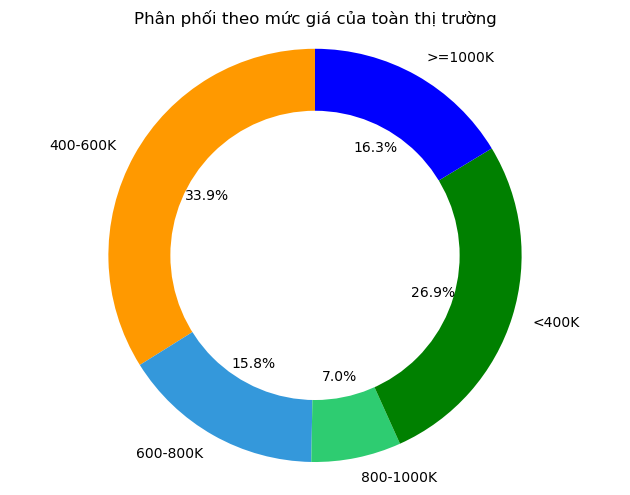

In [47]:
# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71','green','blue'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = pivot_df_price_drop_total["all_revenue"]

# Tiêu đề biểu đồ
title = "Phân phối theo mức giá của toàn thị trường"

plot_donut(data, title)

## Doanh thu từng mức giá của cửa hàng Ezviz


In [48]:

pivot_df_price_ezviz = pd.pivot_table(ezviz_shop, 
                           index='price_range', 
                           values= 'all_revenue', 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_price_ezviz.loc['Total'] = pivot_df_price_ezviz.sum()
pivot_df_price_ezviz_drop_total = pivot_df_price_ezviz.iloc[0:5,:]
pivot_df_price_ezviz_drop_total

,all_revenue
price_range,
400-600K,76793560876
600-800K,28137186491
800-1000K,13417380684
<400K,7010987001
>=1000K,38222933813


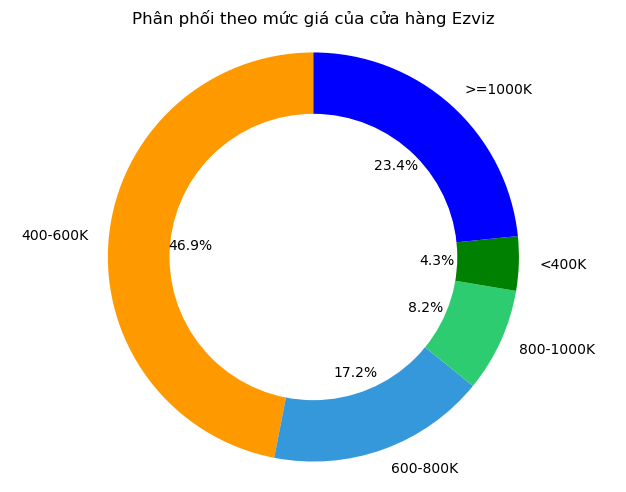

In [49]:
# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71','green','blue'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = pivot_df_price_ezviz_drop_total["all_revenue"]

# Tiêu đề biểu đồ
title = "Phân phối theo mức giá của cửa hàng Ezviz"

plot_donut(data, title)

## Doanh thu các cửa hàng khác không phải Ezviz

In [50]:
non_ezviz_shop = df_cleaned.copy()[df_cleaned["brand"] != "Ezviz"]


In [51]:

pivot_df_non_ezviz_shop_price = pd.pivot_table(non_ezviz_shop, 
                           index='price_range', 
                           values= 'all_revenue', 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_non_ezviz_shop_price.loc['Total'] = pivot_df_non_ezviz_shop_price.sum()
pivot_df_non_ezviz_shop_price_drop_total = pivot_df_non_ezviz_shop_price.iloc[0:5,:]

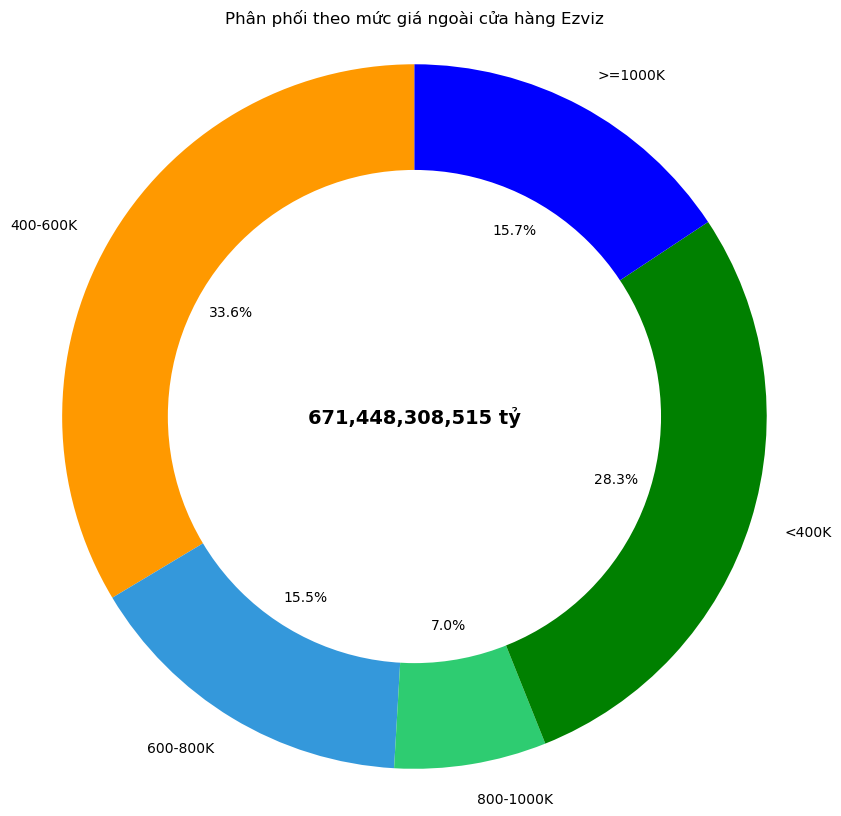

In [52]:
import matplotlib.pyplot as plt
import locale
import math

# Thiết lập locale để định dạng số thành định dạng nghìn tỷ
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  

# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots(figsize=(10, 10))  

    # Vẽ biểu đồ donut
    wedges, text, autotext = ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71','green','blue'])
    
    # Vẽ vòng trắng giữa biểu đồ
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Đảm bảo tỉ lệ khía cạnh bằng nhau để đảm bảo biểu đồ donut trông đẹp
    ax.axis('equal')  

    # Đặt vị trí trung tâm của vòng trắng là giá trị "all_revenue"
    total_revenue = pivot_df_non_ezviz_shop_price_drop_total["all_revenue"].sum()
    
    # Làm tròn lên và định dạng số, sau đó đặt vị trí trung tâm của vòng trắng
    rounded_total_revenue = math.ceil(total_revenue)
    formatted_total_revenue = locale.format_string('%.0f', rounded_total_revenue, grouping=True)
    plt.text(0, 0, f'{formatted_total_revenue} tỷ', ha='center', va='center', fontsize=14, color='black', weight='bold')

    # Đặt tiêu đề và hiển thị biểu đồ
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = pivot_df_non_ezviz_shop_price_drop_total["all_revenue"]

# Tiêu đề biểu đồ
title = "Phân phối theo mức giá ngoài cửa hàng Ezviz"

plot_donut(data, title)


## Doanh thu của các mức giá theo các sàn

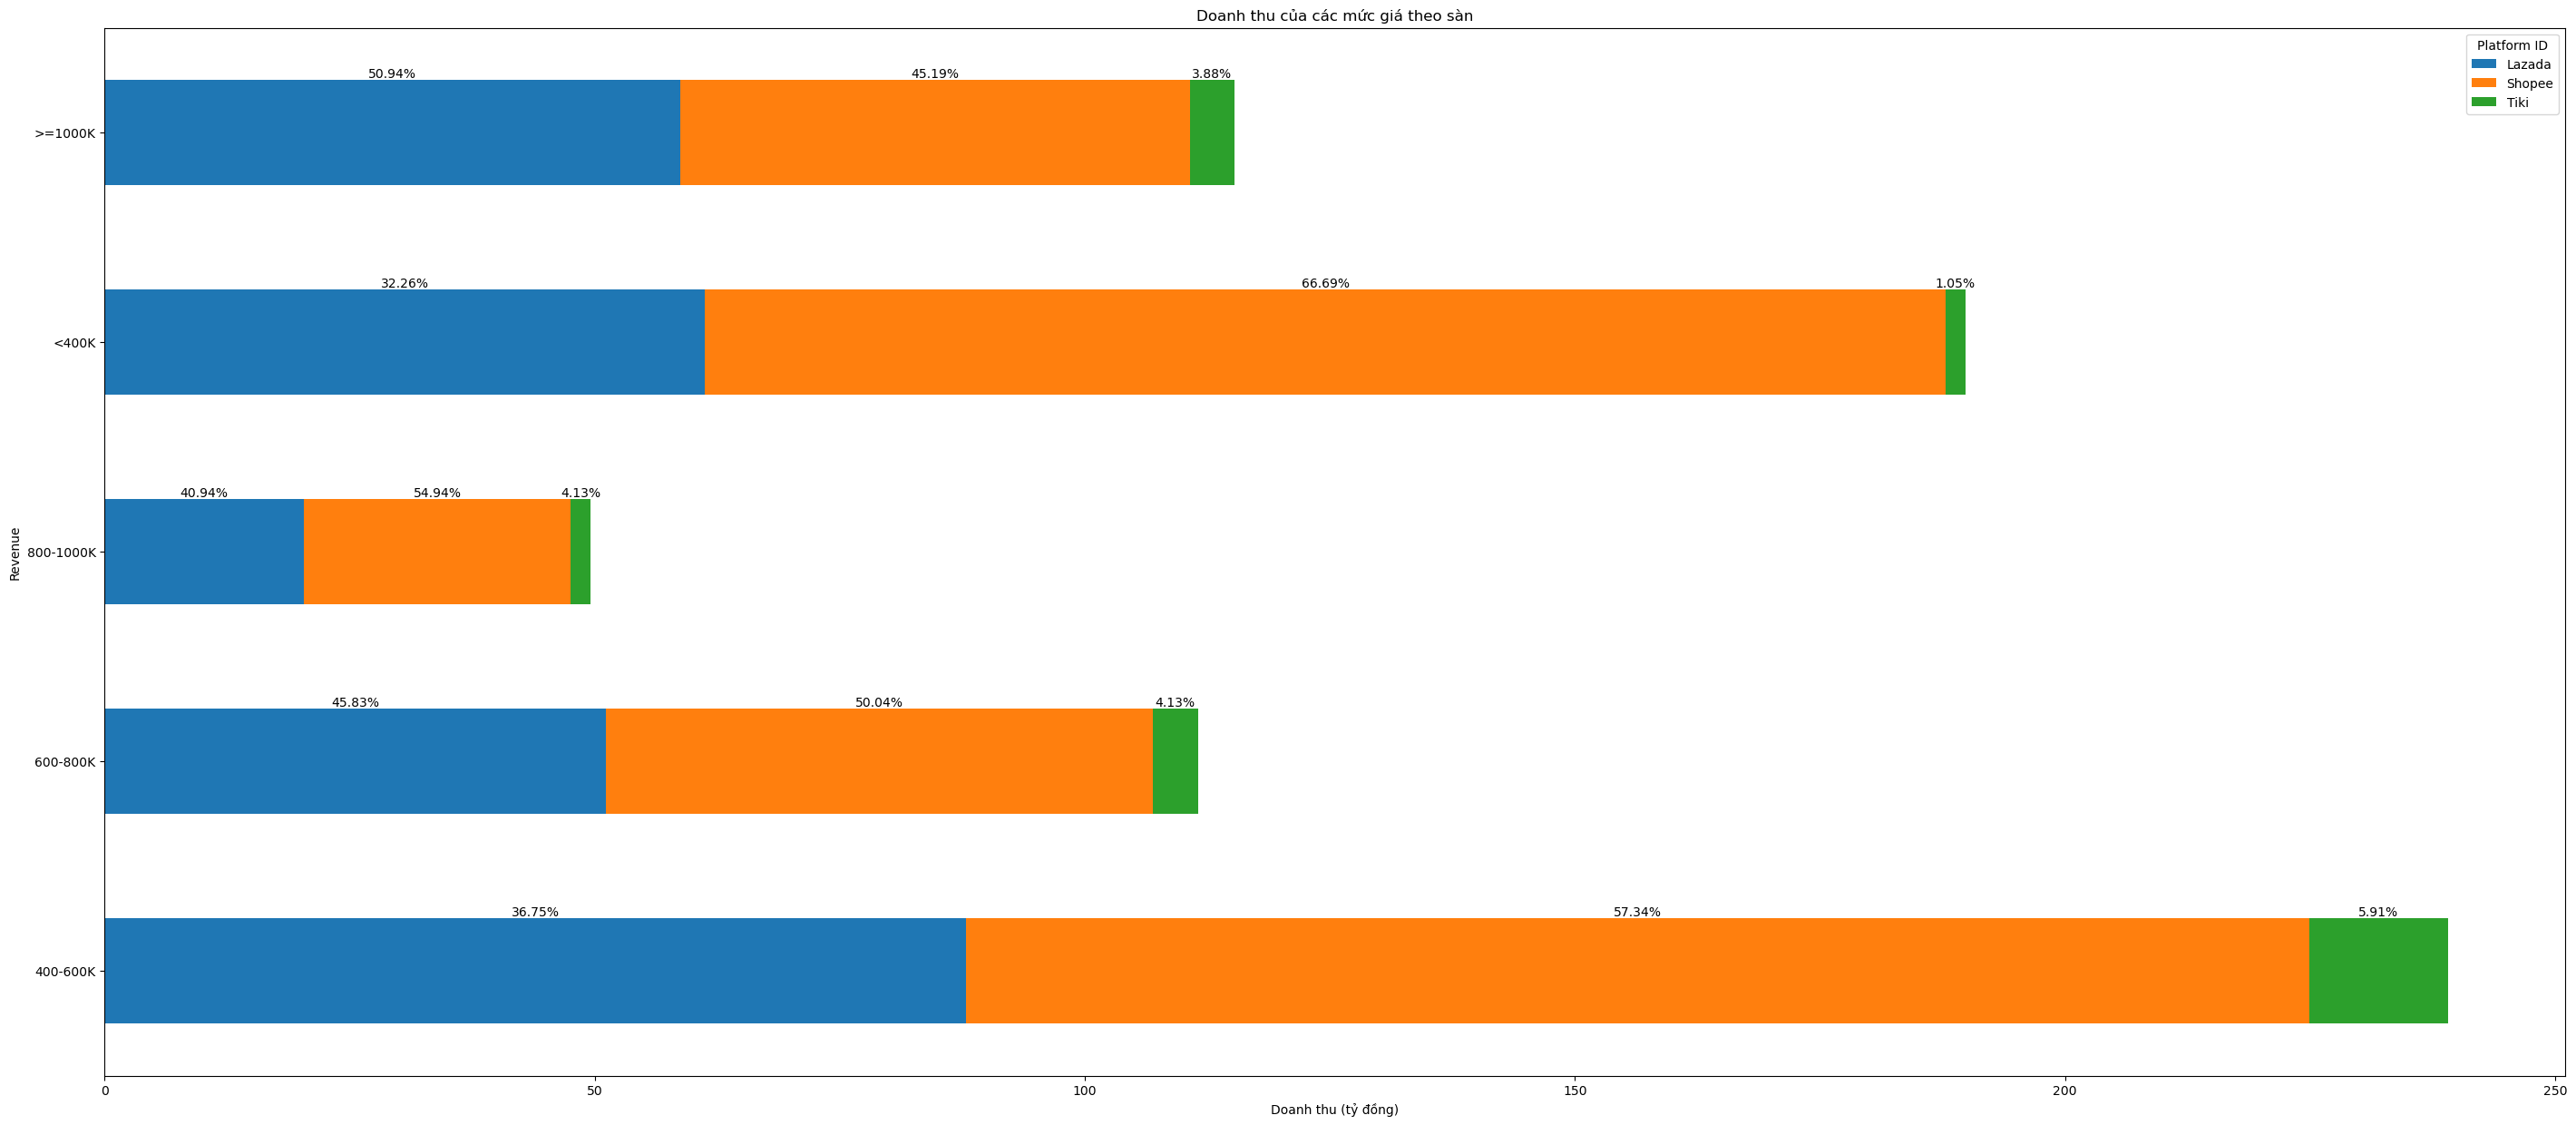

price_range      400-600K     600-800K    800-1000K         <400K      >=1000K
platform_id                                                                   
Lazada        87868151947  51118833404  20307045783   61233440117  58691282528
Shopee       137073574918  55810380905  27251745144  126595724613  52068314764
Tiki          14127267907   4611003150   2047316231    1999126562   4466886708
[36.75, 57.34, 5.91, 45.83, 50.04, 4.13, 40.94, 54.94, 4.13, 32.26, 66.69, 1.05, 50.94, 45.19, 3.88]
0
Rectangle(xy=(0, -0.25), width=8.78682e+10, height=0.5, angle=0)
1
Rectangle(xy=(0, 0.75), width=5.11188e+10, height=0.5, angle=0)
2
Rectangle(xy=(0, 1.75), width=2.0307e+10, height=0.5, angle=0)
3
Rectangle(xy=(0, 2.75), width=6.12334e+10, height=0.5, angle=0)
4
Rectangle(xy=(0, 3.75), width=5.86913e+10, height=0.5, angle=0)
5
Rectangle(xy=(8.78682e+10, -0.25), width=1.37074e+11, height=0.5, angle=0)
6
Rectangle(xy=(5.11188e+10, 0.75), width=5.58104e+10, height=0.5, angle=0)
7
Rectangle(xy=(2.030

In [53]:
pivot_df_price_platform = df.pivot_table(values='all_revenue', index='price_range', columns='platform_id', aggfunc='sum')
percent_price_platform = []
pivot_df_price_platform_trans = pivot_df_price_platform.transpose()
for price in pivot_df_price_platform_trans.columns:
    for revenue in pivot_df_price_platform_trans[price]:
        percent_price_platform.append(round((revenue/(pivot_df_price_platform_trans[price]).sum() * 100),2))
# Vẽ biểu đô cột 
ax = pivot_df_price_platform.plot(kind = "barh",stacked = True,figsize = (35,15))

# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    value = [36.75,45.83,40.94,32.26,50.94,57.34,50.04,54.94,66.69,45.19,5.91,4.13,4.13,1.05,3.88][i]
    ax.text(x + width / 2, y + height , f'{value:.2f}%', ha='center', va='bottom', color='black')

# Thiết lập tiêu đề và nhãn trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.xlabel('Doanh thu (tỷ đồng)')

# Định dạng lại nhãn trục hoành để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Chuyển đổi legend
ax.legend(title='Platform ID')

# Hiển thị biểu đồ
plt.show()

print(pivot_df_price_platform_trans)
print(percent_price_platform)

for i, patch in enumerate(ax.patches):
    print(i)
    print(patch)


## So sánh doanh thu theo các mức giá của Ezviz shop so với các hãng còn lại 

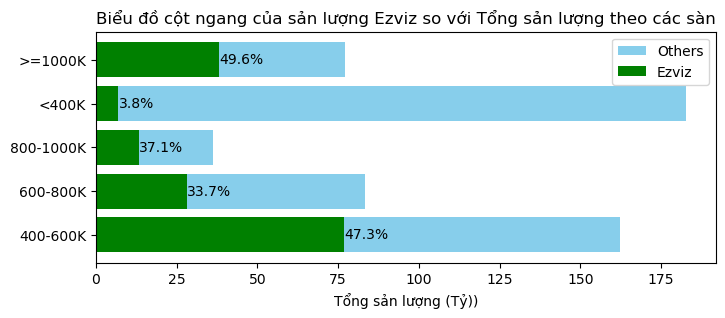

In [54]:
other_shop = df[df["brand_normalized"] != "Ezviz"]
pivot_df_ezviz = ezviz_shop.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')
pivot_df_other_shop = other_shop.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')
bar_width = 0.4

# Kích thước của biểu đồ
plt.figure(figsize=(8, 3))

# Lấy các giá trị cần vẽ
platforms = pivot_df_other_shop.index
platforms_ezviz = pivot_df_ezviz.index
sales = pivot_df_other_shop['all_revenue']
sales_ezviz = pivot_df_ezviz['all_revenue']

# Tính phần trăm
percentage_sales_eziviz_to_all = sales_ezviz/sales * 100

# Vẽ biểu đồ cột ngang
## Thị trường
plt.barh(platforms, sales, color='skyblue', label='Others')

## Ezviz
plt.barh(platforms_ezviz, sales_ezviz, left=[0]*len(platforms_ezviz), color='green', label='Ezviz')
for i, value in enumerate(percentage_sales_eziviz_to_all):
    plt.text(sales_ezviz[i] + 0.5, i, f'{value:.1f}%', va='center')

# Hiển thị chú thích
plt.xlabel('Tổng sản lượng (Tỷ))')
plt.title('Biểu đồ cột ngang của sản lượng Ezviz so với Tổng sản lượng theo các sàn')
plt.legend()

# Định dạng lại nhãn trục hoành để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()


## Doanh thu theo các loại sản phẩm của thị trường



In [105]:
pivot_df_type = pd.pivot_table(df_cleaned, 
                           index='partner_type', 
                           values= 'all_revenue', 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df_type

,all_revenue
partner_type,
Indoor,244899897886
Mix,2750282264
Others,131546842241
Outdoor,326073072290


# Slide 7

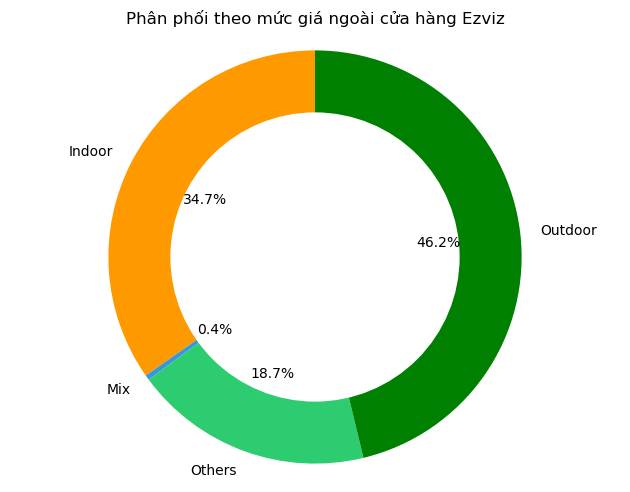

In [56]:
# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71','green','blue'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = pivot_df_type["all_revenue"]

# Tiêu đề biểu đồ
title = "Phân phối theo mức giá ngoài cửa hàng Ezviz"

plot_donut(data, title)

## Doanh thu những sản phẩm Indoor theo các sàn


In [57]:
indoor_data = df_cleaned[df_cleaned["partner_type"] == "Indoor"]
# Tạo pivot table
pivot_table_indoor = pd.pivot_table(indoor_data, values='all_revenue', index='platform_id', aggfunc='sum')
# In ra pivot table
print(pivot_table_indoor)


              all_revenue
platform_id              
Lazada       114070171738
Shopee       124068138172
Tiki           6761587976


## Doanh thu những sản phẩm Outdoor theo các sàn


In [58]:

outdoor_data = df_cleaned[df_cleaned["partner_type"] == "Outdoor"]

pivot_table_outdoor = pd.pivot_table(outdoor_data, values='all_revenue', index='platform_id', aggfunc='sum')

# In ra pivot table
print(pivot_table_outdoor)


              all_revenue
platform_id              
Lazada       101301904004
Shopee       209710663522
Tiki          15060504764


## Doanh thu những sản phẩm Other theo các sàn


In [59]:
others_data = df_cleaned[df_cleaned["partner_type"] == "Others"]
pivot_table_others = pd.pivot_table(others_data, values='all_revenue', index='platform_id', aggfunc='sum')
# In ra pivot table
print(pivot_table_others)


             all_revenue
platform_id             
Lazada       62298692093
Shopee       63872874330
Tiki          5375275818


## Doanh thu những sản phẩm Indoor theo các mức giá


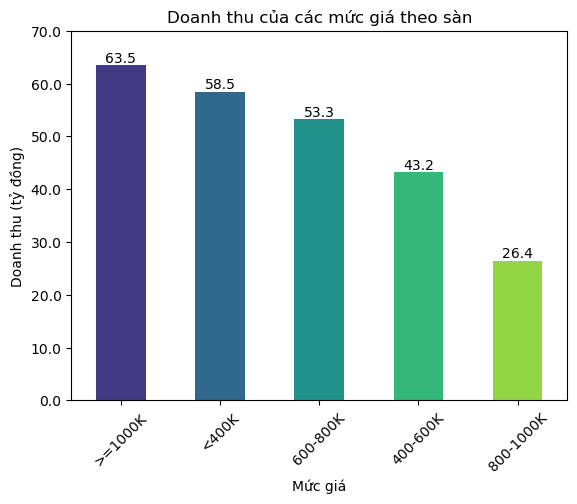

In [60]:
indoor_data = df_cleaned[df_cleaned["partner_type"] == "Indoor"]
pivot_df_indoor_price = indoor_data.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')

# Sắp xếp pivot_df_indoor theo doanh thu giảm dần để màu sắc phản ánh độ cao
sort_pivot_df_indoor_price = pivot_df_indoor_price.sort_values(by='all_revenue', ascending=False)

# Lấy màu từ gradient màu (chọn số lượng màu tùy chọn)
n_colors = len(sort_pivot_df_indoor_price)
colors = sns.color_palette("viridis", n_colors)

# Vẽ biểu đồ cột với màu sắc gradient
ax = sort_pivot_df_indoor_price['all_revenue'].plot(kind='bar', color=colors)

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('Mức giá')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(sort_pivot_df_indoor_price['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

## Doanh thu những sản phẩm Indoor tại các sàn 

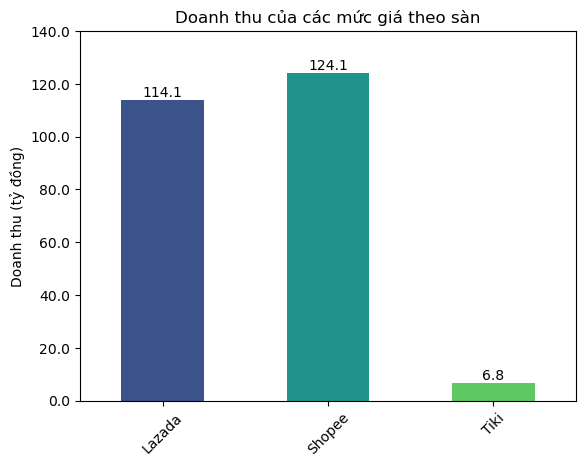

In [61]:
indoor_data = df_cleaned[df_cleaned["partner_type"] == "Indoor"]
pivot_df_indoor_platform = indoor_data.pivot_table(values='all_revenue', index='platform_id', aggfunc='sum')

# Lấy màu từ gradient màu (chọn số lượng màu tùy chọn)
n_colors = len(pivot_df_indoor_platform)
colors = sns.color_palette("viridis", n_colors)

# Vẽ biểu đồ cột với màu sắc gradient
ax = pivot_df_indoor_platform['all_revenue'].plot(kind='bar', color=colors)

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(pivot_df_indoor_platform['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')
    
# Hiển thị biểu đồ
plt.show()

## Doanh thu những sản phẩm Outdoor theo các mức giá


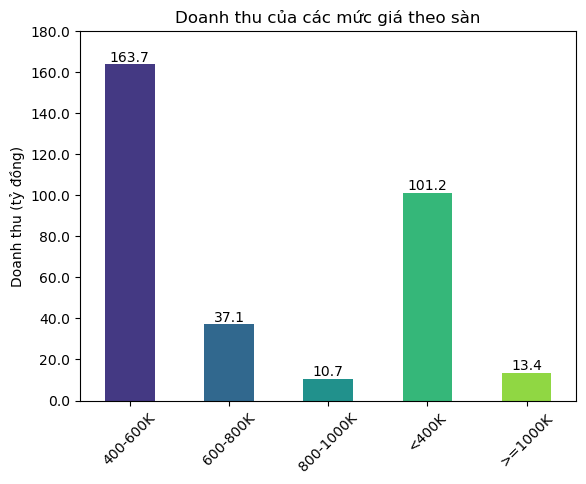

In [62]:
out_door = df_cleaned[df_cleaned["partner_type"] == "Outdoor"]
pivot_df_outdoor_price = out_door.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')
# Lấy màu từ gradient màu (chọn số lượng màu tùy chọn)
n_colors = len(pivot_df_outdoor_price)
colors = sns.color_palette("viridis", n_colors)

# Vẽ biểu đồ cột với màu sắc gradient
ax = pivot_df_outdoor_price['all_revenue'].plot(kind='bar', color=colors)

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(pivot_df_outdoor_price['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')
    
# Hiển thị biểu đồ
plt.show()

## Doanh thu những sản phẩm Out tại các sàn 


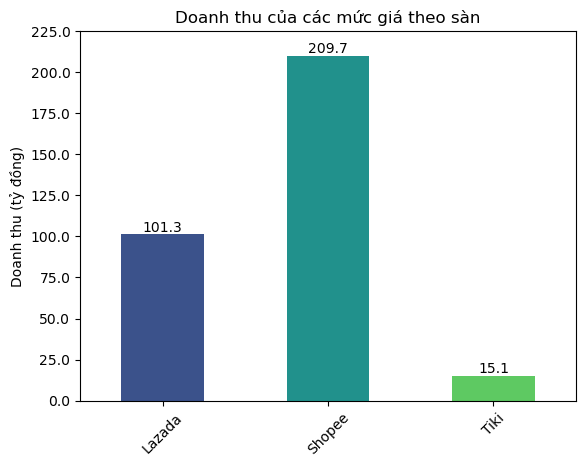

In [63]:
out_door = df_cleaned[df_cleaned["partner_type"] == "Outdoor"]
pivot_df_outdoor = out_door.pivot_table(values='all_revenue', index='platform_id', aggfunc='sum')
# Lấy màu từ gradient màu (chọn số lượng màu tùy chọn)
n_colors = len(pivot_df_outdoor)
colors = sns.color_palette("viridis", n_colors)

# Vẽ biểu đồ cột với màu sắc gradient
ax = pivot_df_outdoor['all_revenue'].plot(kind='bar', color=colors)

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(pivot_df_outdoor['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')
    
# Hiển thị biểu đồ
plt.show()

## Doanh thu những sản phẩm Others theo các mức giá


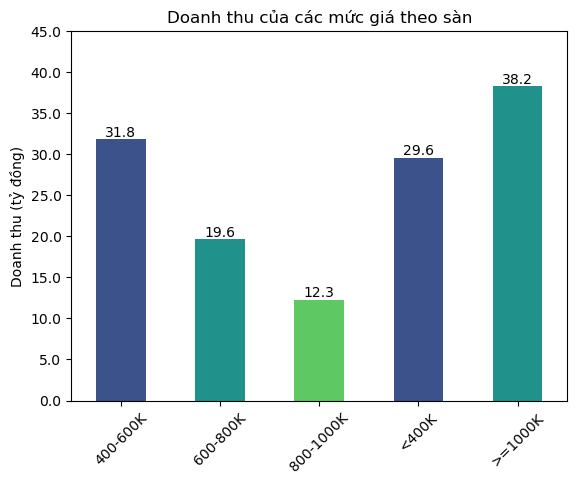

In [64]:
others = df_cleaned[df_cleaned["partner_type"] == "Others"]
pivot_df_others_price = others.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')

# Vẽ biểu đồ cột với màu sắc gradient
ax = pivot_df_others_price['all_revenue'].plot(kind='bar', color=colors)

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(pivot_df_others_price['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')
    
# Hiển thị biểu đồ
plt.show()

## Doanh thu những sản phẩm Others tại các sàn 


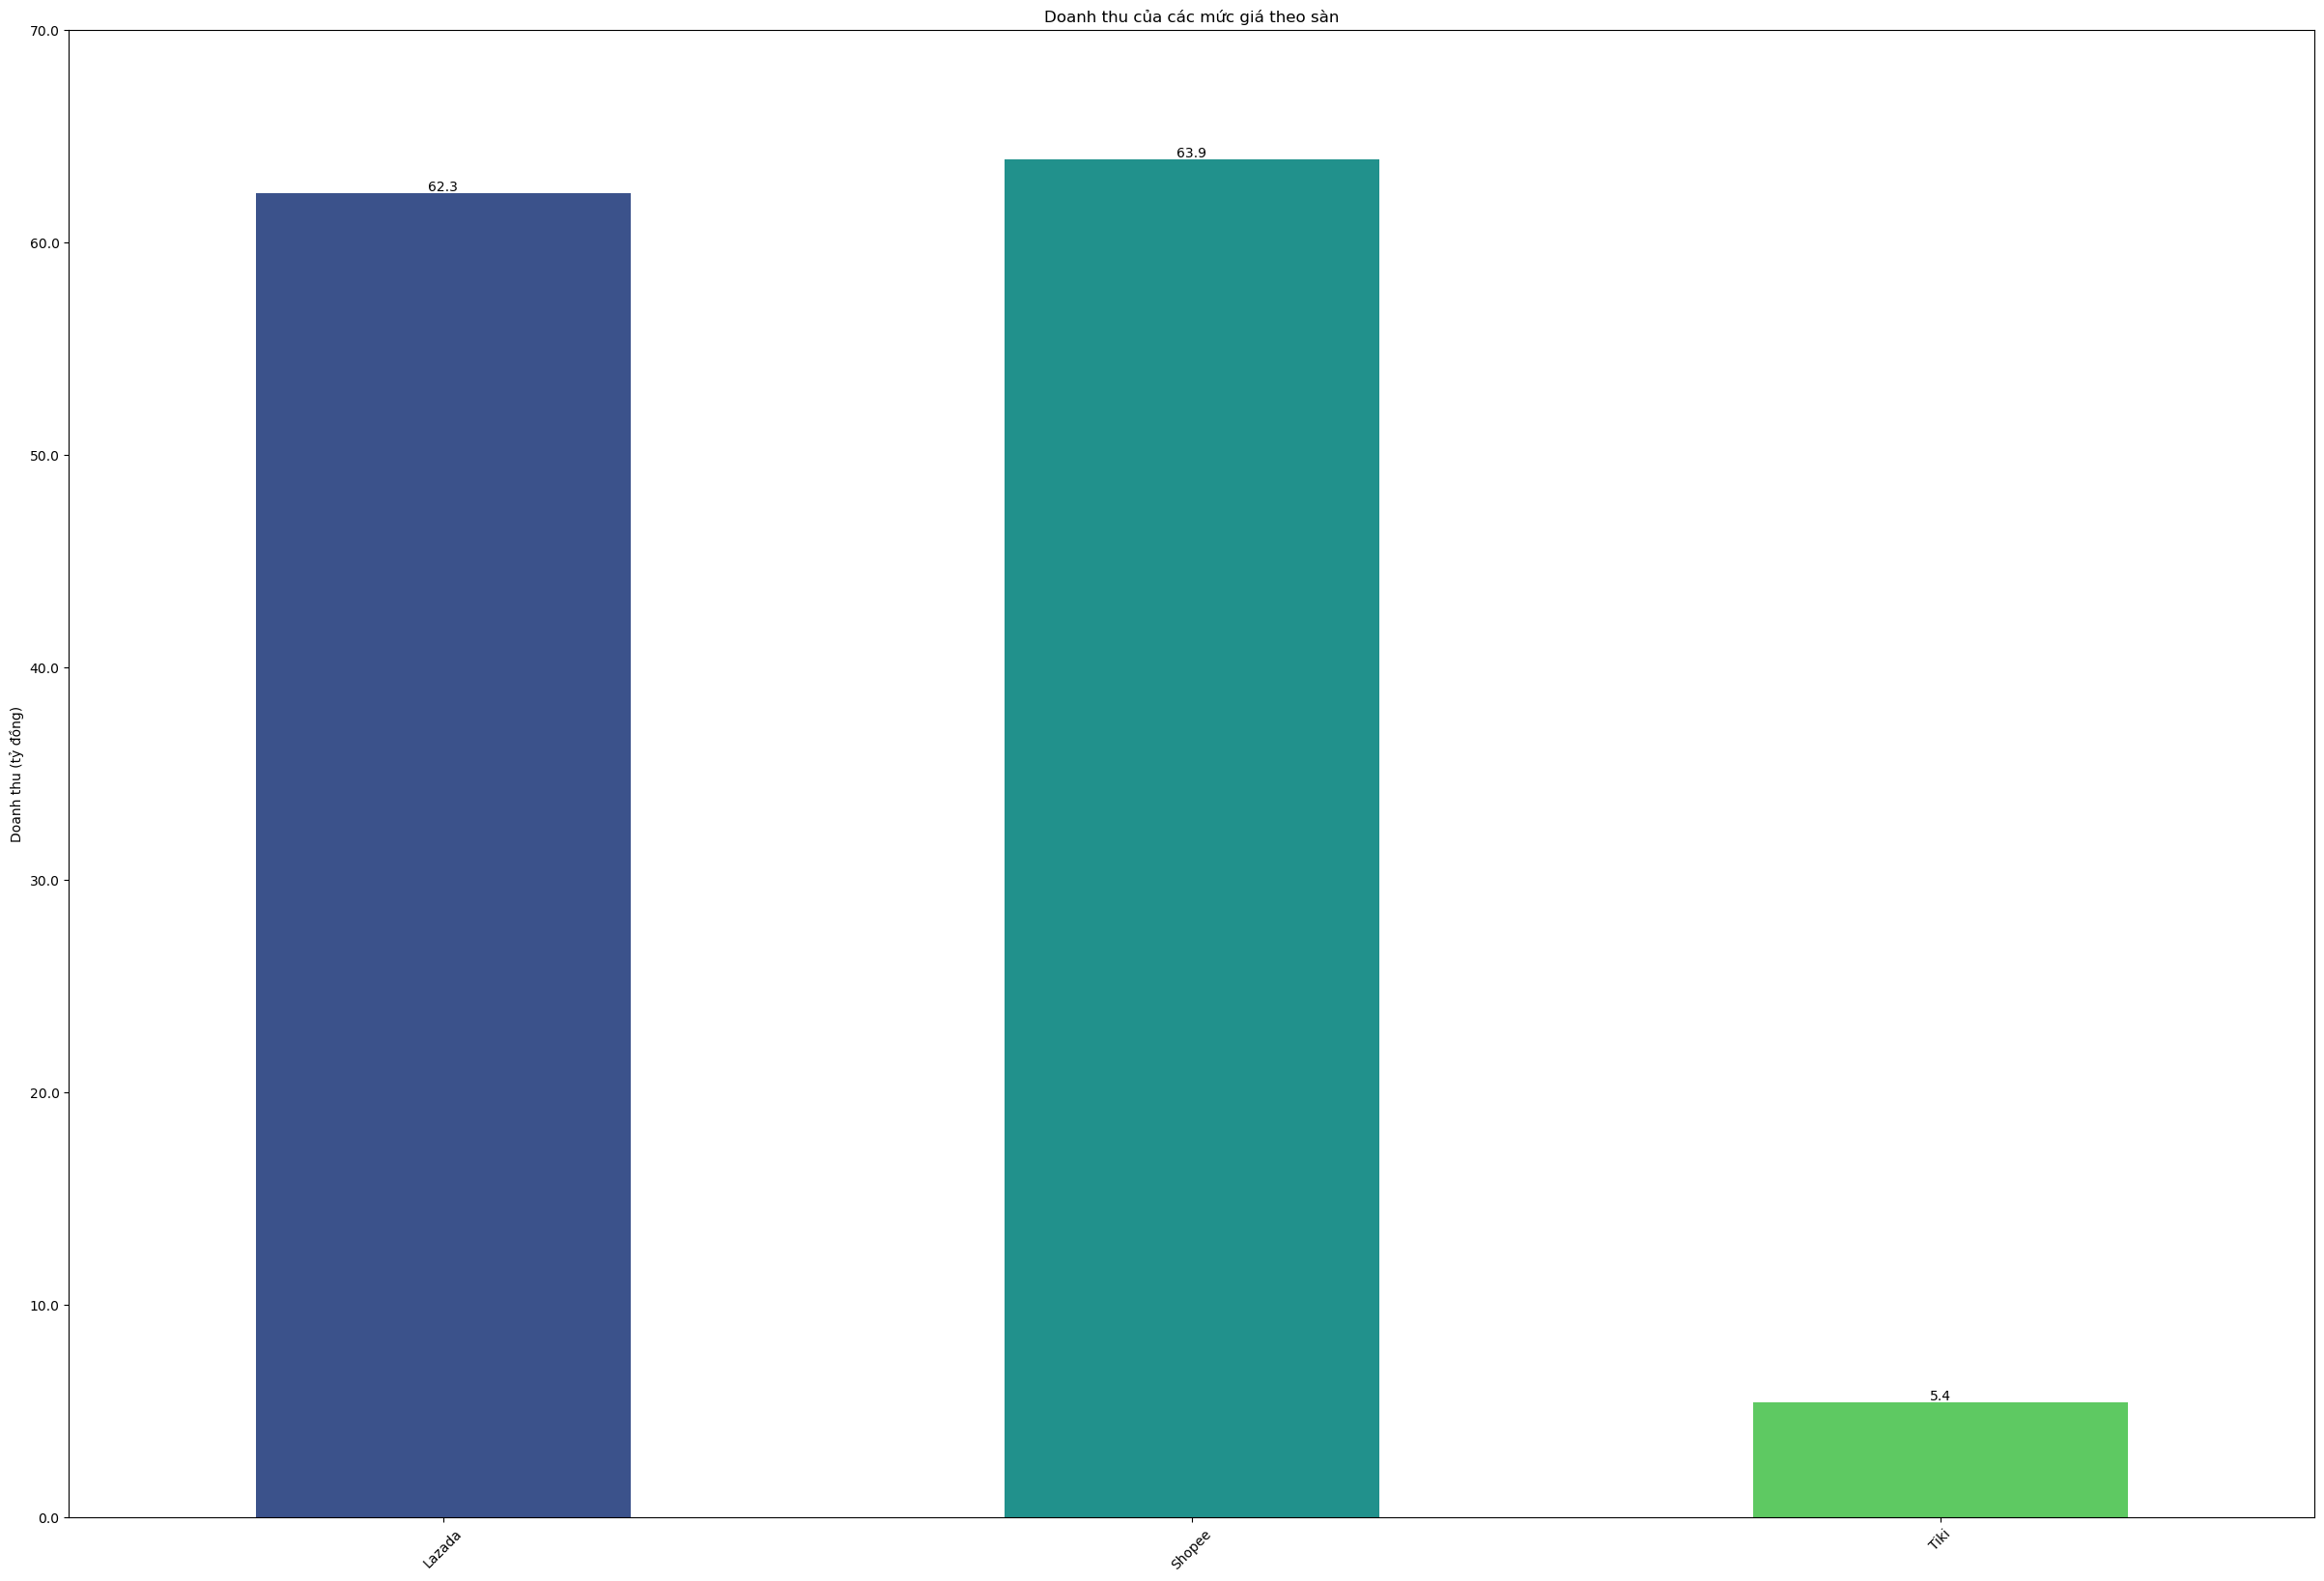

In [65]:
others = df_cleaned[df_cleaned["partner_type"] == "Others"]
pivot_df_others = others.pivot_table(values='all_revenue', index='platform_id', aggfunc='sum')

# Vẽ biểu đồ cột với màu sắc gradient
ax = pivot_df_others['all_revenue'].plot(kind='bar', color=colors,figsize = (30,20))

# Tiêu đề và trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('')
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng trục y để hiển thị tỷ lệ tỷ đồng
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Xoay nhãn trục x để đảm bảo đọc được
plt.xticks(rotation=45)

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(pivot_df_others['all_revenue']):
    plt.text(i, value, f'{value/1e9:.1f}', ha='center', va='bottom')
    
# Hiển thị biểu đồ
plt.show()

## Top 10 brands có doanh thu cao nhất tại thị trường

In [106]:
pivot_brand_platform = pd.pivot_table(df_cleaned, values='all_revenue', index='brand_normalized', columns='platform_id', aggfunc='sum')
pd.set_option('display.float_format', '{:.2f}'.format)
pivot_brand_platform['Total'] = pivot_brand_platform.sum(axis=1)
sorted_pivot_brand_platform = pivot_brand_platform.sort_values(by='Total', ascending=True)
sorted_pivot_brand_platform['Percentage'] = (sorted_pivot_brand_platform['Total'] / sorted_pivot_brand_platform['Total'].sum()) * 100
name_brand = sorted_pivot_brand_platform.index
name_brand_array = name_brand.to_numpy()
top_10_brand = []

for i, n in zip(name_brand_array, range(1, 11)): 
    revenue_brand_n = df_cleaned[df_cleaned["brand_normalized"] == i]["all_revenue"].sum()
    top_10_brand.append(revenue_brand_n)
revenue_top_10_brand = sum(top_10_brand)
revenue_top_10_brand

56509322288

# Slide 8

## Doanh thu của 10 brand có doanh thu cao nhất so với toàn thị trường

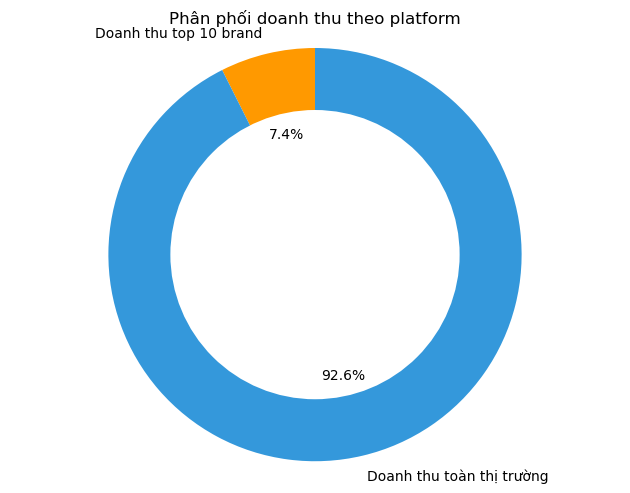

In [67]:
total_top_10_revenue = 56509322288
total_market_revenue = 705270094681

revenue_summary = pd.DataFrame({
    'Doanh thu': [total_top_10_revenue, total_market_revenue]
}, index=['Doanh thu top 10 brand', 'Doanh thu toàn thị trường'])

# Biểu đồ donut
def plot_donut(data, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9900', '#3498db', '#2ecc71'])
    # Draw center circle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    plt.tight_layout()
    plt.title(title)
    plt.show()

# Dữ liệu từ cột "all_revenue" trong DataFrame grouped_platform
data = revenue_summary["Doanh thu"]

# Tiêu đề biểu đồ
title = "Phân phối doanh thu theo platform"

plot_donut(data, title)

In [68]:
percent_brand_platform = []
trans_sorted_pivot_brand_platform_drop = sorted_pivot_brand_platform.drop(columns = ["Total","Percentage"]).transpose().fillna(0)
for platform in trans_sorted_pivot_brand_platform_drop.columns:
    for revenue in trans_sorted_pivot_brand_platform_drop[platform]:
        percent_brand_platform.append(round((revenue/(trans_sorted_pivot_brand_platform_drop[platform]).sum() * 100),2))
print(percent_brand_platform)
print(trans_sorted_pivot_brand_platform_drop)

[39.86, 60.14, 0.0, 54.86, 45.14, 0.0, 2.09, 92.11, 5.81, 15.48, 60.72, 23.8, 29.22, 65.39, 5.39, 22.48, 74.0, 3.52, 74.46, 25.29, 0.24, 23.0, 75.66, 1.33, 27.49, 69.51, 3.0, 22.31, 60.81, 16.88, 57.54, 42.46, 0.0, 22.33, 75.3, 2.37, 60.46, 38.01, 1.53, 30.8, 66.62, 2.57, 27.78, 64.6, 7.62, 50.54, 47.72, 1.74]
brand_normalized       Goviz     Onvizcam        Hanet         Deli  \
platform_id                                                           
Lazada           42913000.00 100883614.00  18847000.00 149052000.00   
Shopee           64746940.00  83012996.00 832486000.00 584610000.00   
Tiki                    0.00         0.00  52502500.00 229150480.00   

brand_normalized      Kbvision         Tenda     Vstarcam          Dahua  \
platform_id                                                                
Lazada            526548457.00  761001808.00 2640156402.00  996945145.00   
Shopee           1178354304.00 2505359584.00  896801000.00 3279368900.00   
Tiki               97197408.

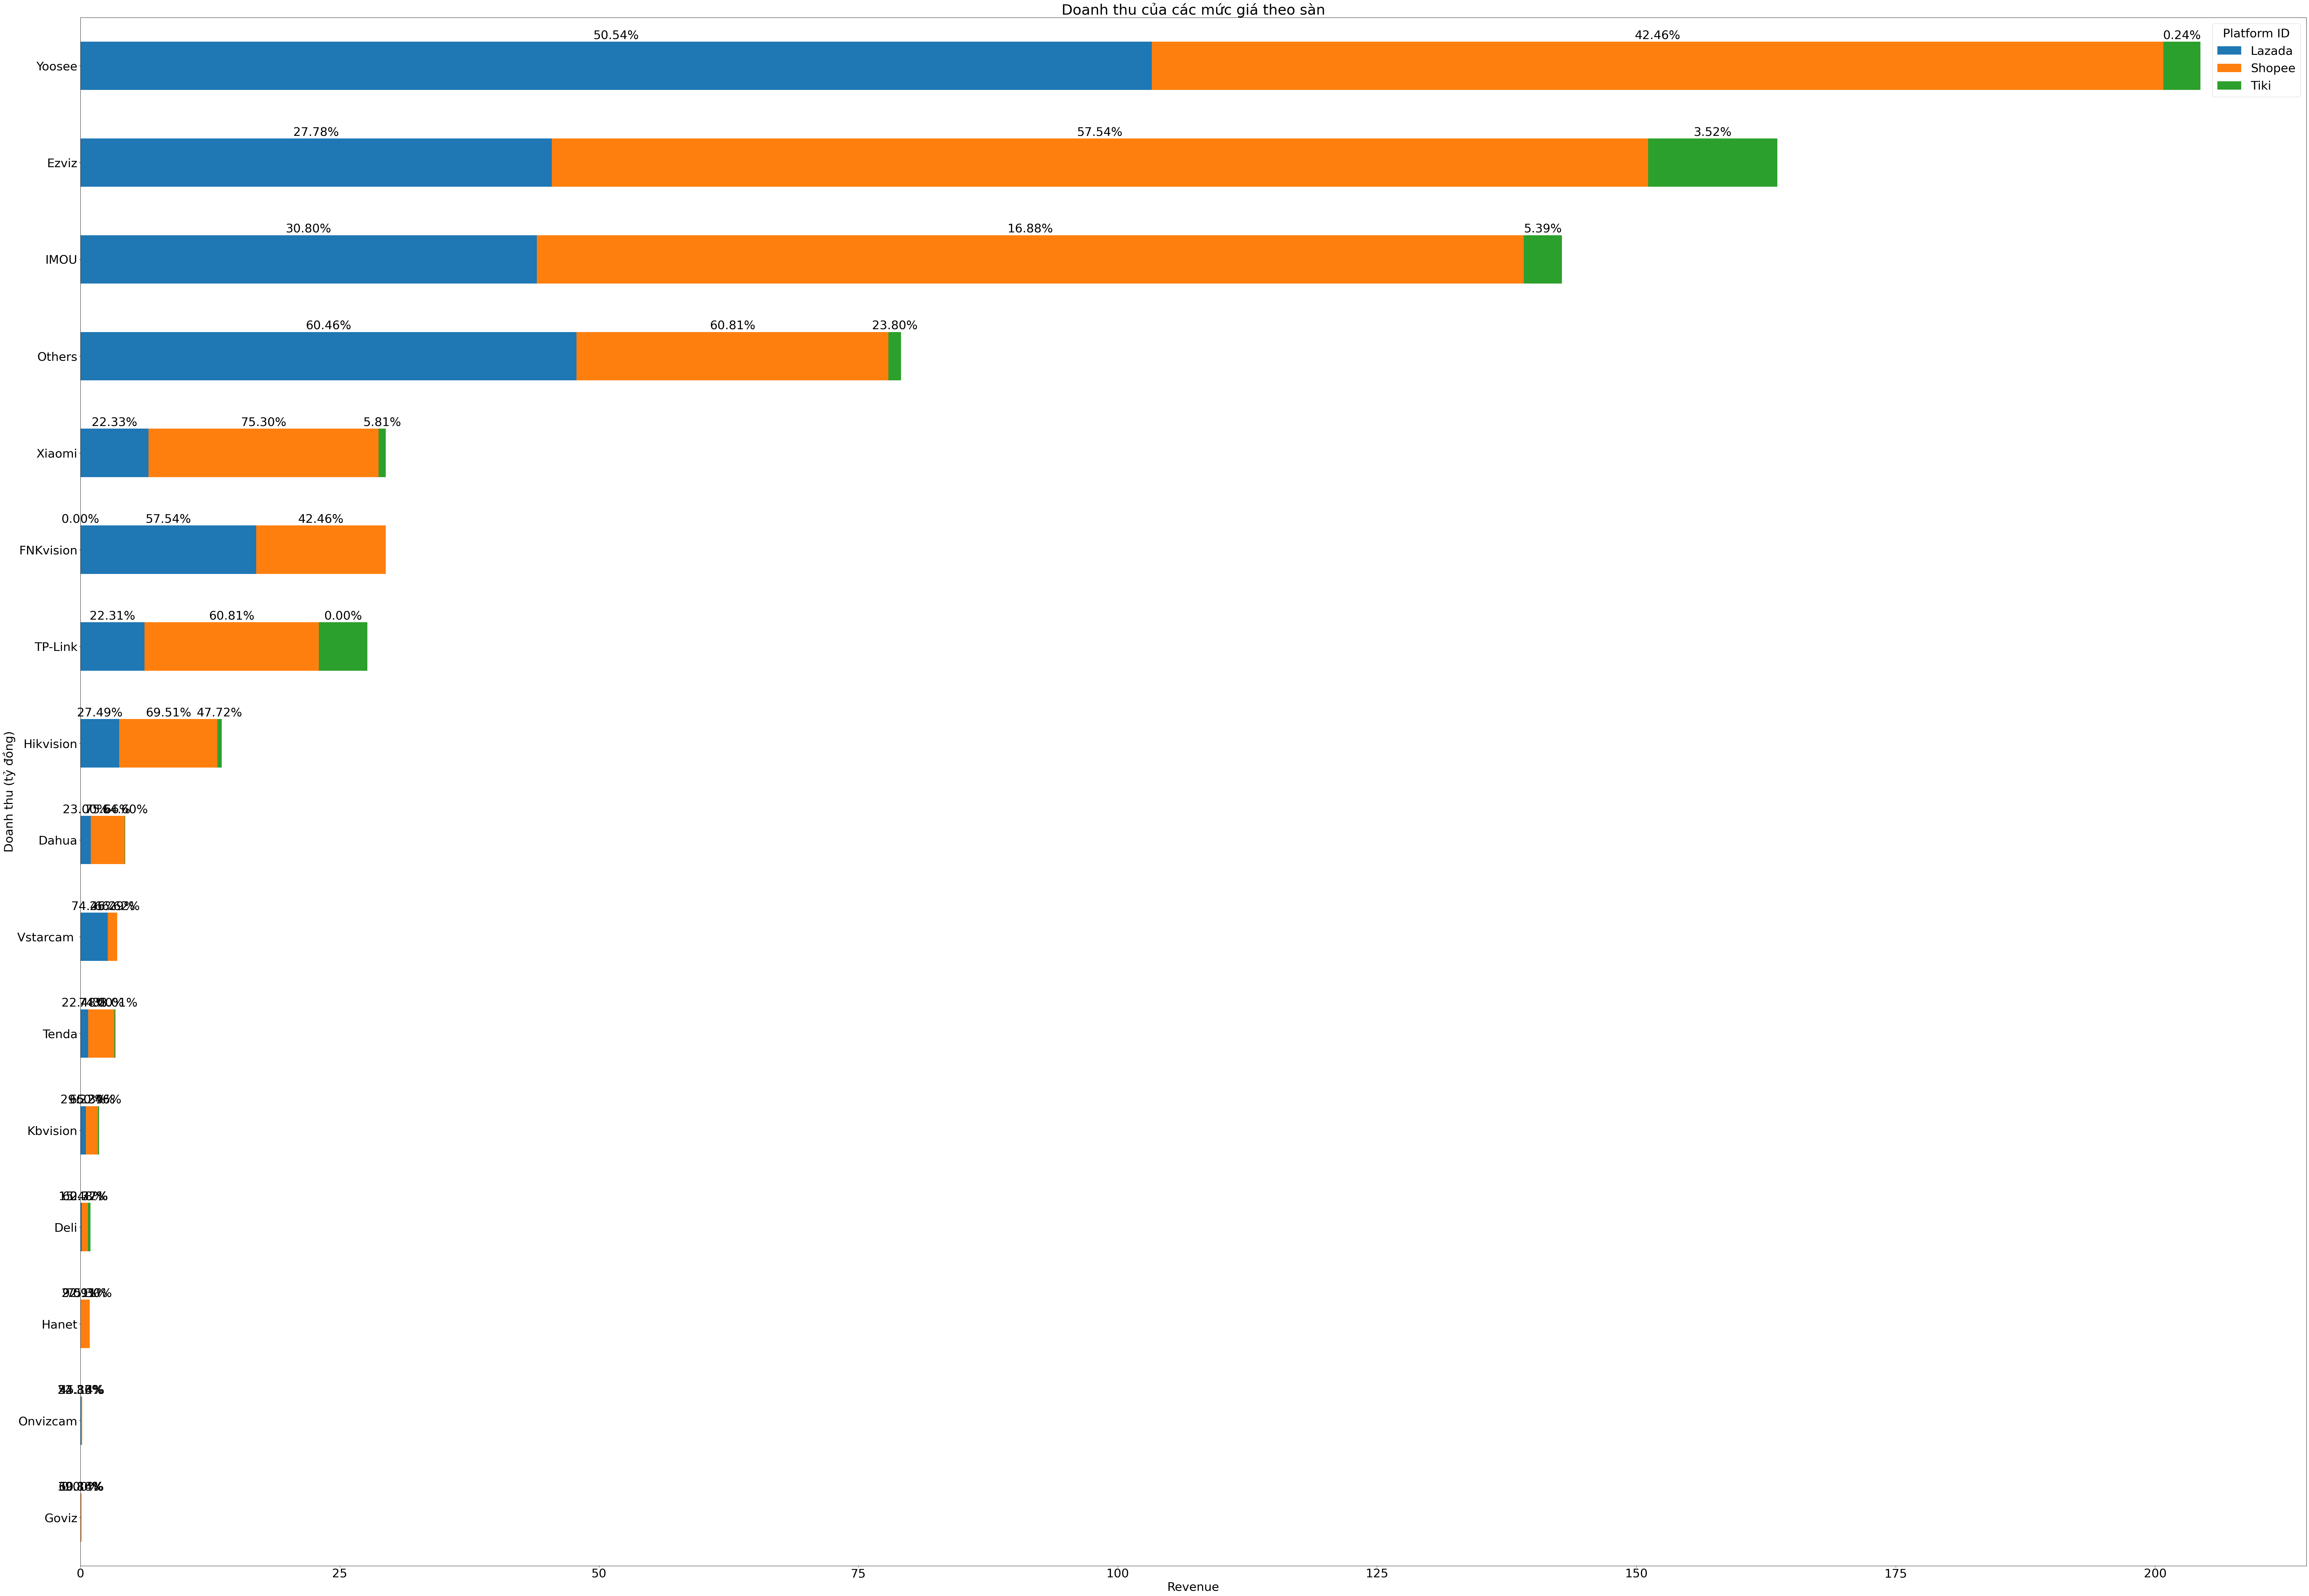

In [109]:

# Vẽ biểu đồ cột
ax = sorted_pivot_brand_platform.drop(columns=["Total", "Percentage"]).plot(kind="barh", stacked=True, figsize=(100, 70))


# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
value = [39.86, 54.86, 2.09, 15.48, 29.22,22.48,  74.46, 23.0, 27.49, 22.31, 57.54, 22.33, 60.46, 30.8, 27.78, 50.54,60.14, 45.14, 92.11, 60.72, 65.39, 74.0, 25.29, 75.66, 69.51, 60.81, 42.46, 75.3, 60.81, 16.88, 57.54, 42.46, 0.0, 22.33, 75.3, 2.37, 60.46, 38.01, 66.62, 64.6,47.72, 0.0, 0.0, 5.81,23.8, 5.39, 3.52, 0.24,1.33,3.0,16.88,0.0,2.37,1.53,2.57,7.62,1.74]

for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width / 2, y + height, f'{value[i]:.2f}%', ha='center', va='bottom', color='black')

# Thiết lập tiêu đề và nhãn trục
plt.title('Doanh thu của các mức giá theo sàn')
plt.xlabel('Revenue')
plt.xticks(rotation=0)
plt.ylabel('Doanh thu (tỷ đồng)')

# Định dạng lại nhãn trục tung để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Hiển thị biểu đồ
plt.show()


In [70]:
value = [39.86, 60.14, 0.0, 54.86, 45.14, 0.0, 2.09, 92.11, 5.81, 15.48, 60.72, 23.8, 29.22, 65.39, 5.39, 22.48, 74.0, 3.52, 74.46, 25.29, 0.24, 23.0, 75.66, 1.33, 27.49, 69.51, 3.0, 22.31, 60.81, 16.88, 57.54, 42.46, 0.0, 22.33, 75.3, 2.37, 60.46, 38.01, 1.53, 30.8, 66.62, 2.57, 27.78, 64.6, 7.62, 50.54, 47.72, 1.74]


In [110]:
pivot_brand_platform['Percentage'] = (pivot_brand_platform['Total'] / pivot_brand_platform['Total'].sum()) * 100
pivot_brand_platform.head(20)

platform_id,Lazada,Shopee,Tiki,Total,Percentage
brand_normalized,,,,,
Dahua,996945145.00,3279368900.00,57779000.00,4334093045.00,0.61
Deli,149052000.00,584610000.00,229150480.00,962812480.00,0.14
Ezviz,45440425964.00,105678935781.00,12462687120.00,163582048865.00,23.19
FNKvision,16941262395.00,12503488944.00,NaN,29444751339.00,4.17
Goviz,42913000.00,64746940.00,NaN,107659940.00,0.02
Hanet,18847000.00,832486000.00,52502500.00,903835500.00,0.13
Hikvision,3745216461.00,9469662685.00,409133667.00,13624012813.00,1.93
IMOU,43995838314.00,95153246949.00,3673262466.00,142822347729.00,20.25
Kbvision,526548457.00,1178354304.00,97197408.00,1802100169.00,0.26


# Slide 9 

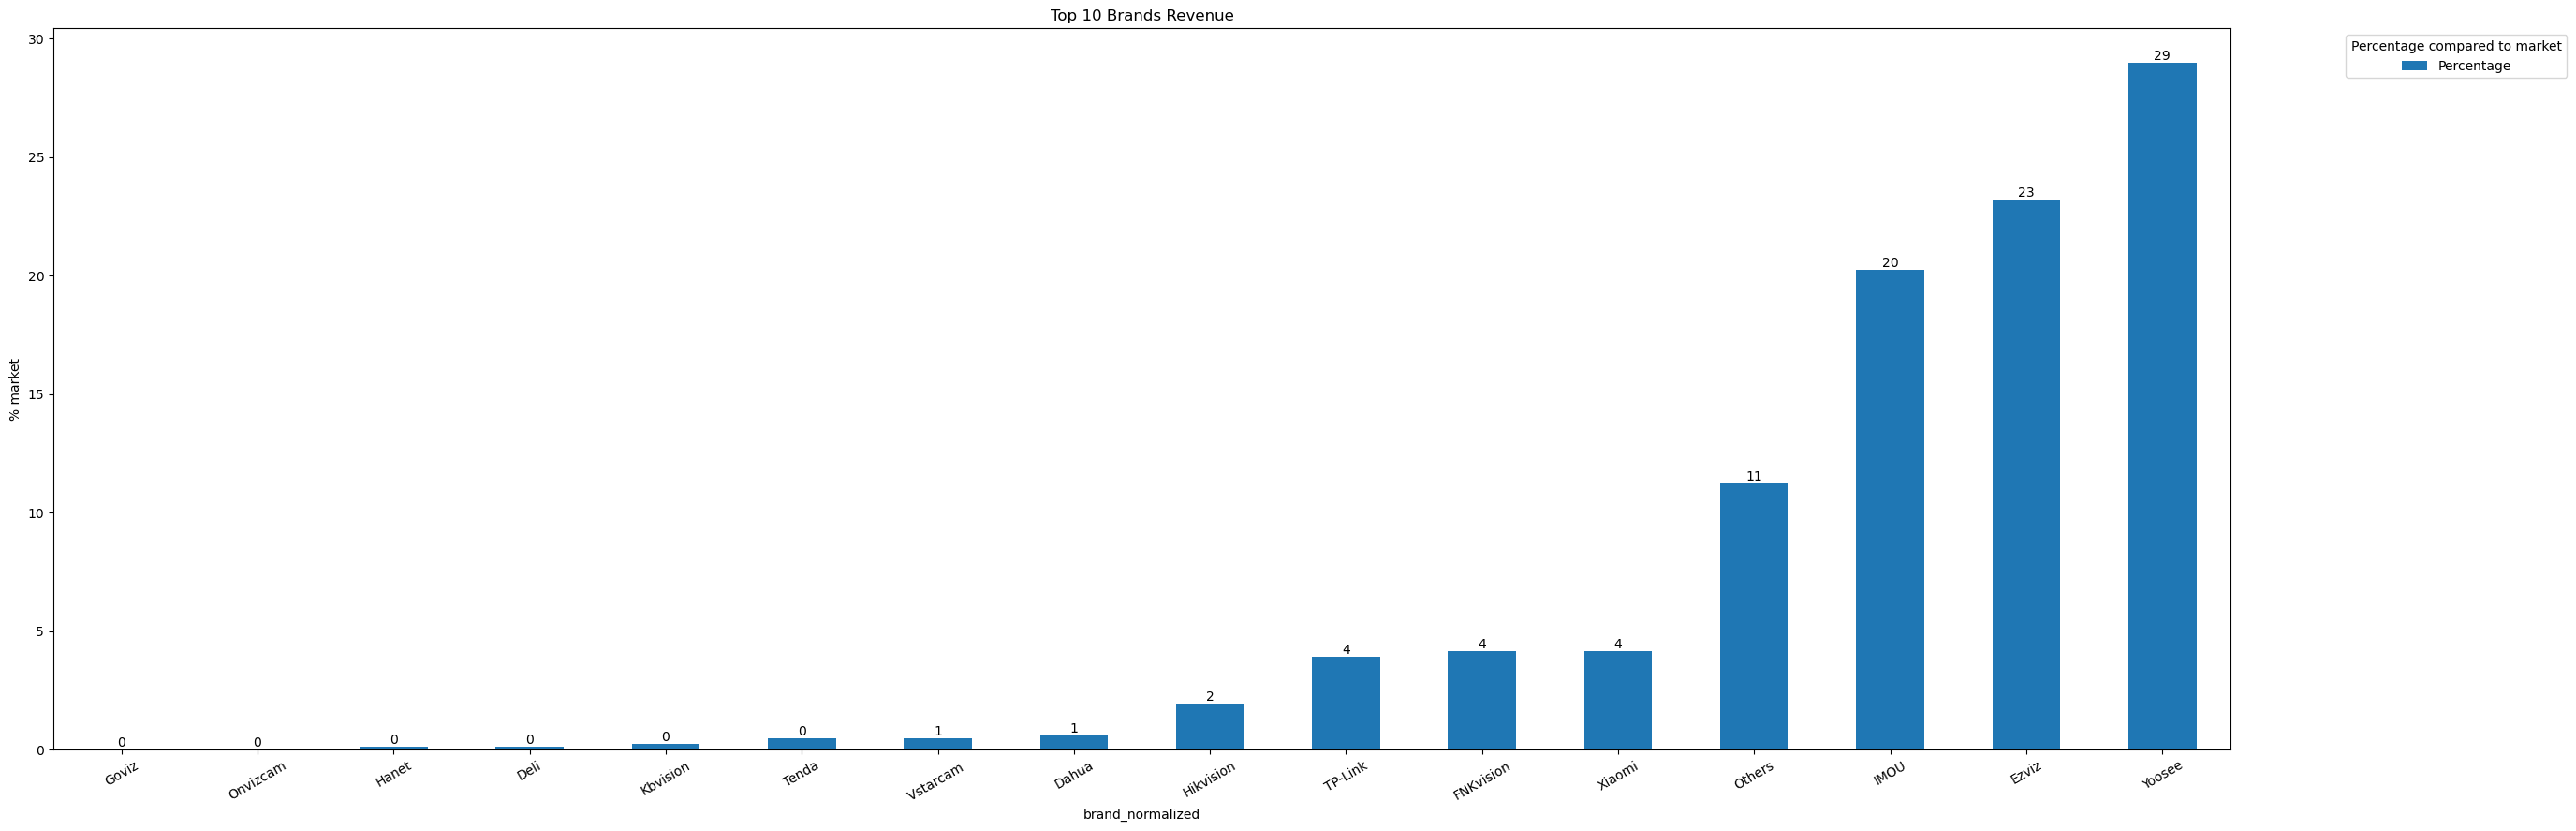

In [72]:
fig, ax = plt.subplots(figsize=(30, 10))
sorted_pivot_brand_platform["Percentage"].plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('% market')
ax.set_title('Top 10 Brands Revenue')
plt.legend(title='Percentage compared to market', bbox_to_anchor=(1.05, 1), loc='upper left')
# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(sorted_pivot_brand_platform['Percentage']):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

# Sửa định dạng nhãn trục x
plt.xticks(rotation= 30)

plt.show()


## Top 10 brands có doanh thu cao nhất tại nền tảng Shopee

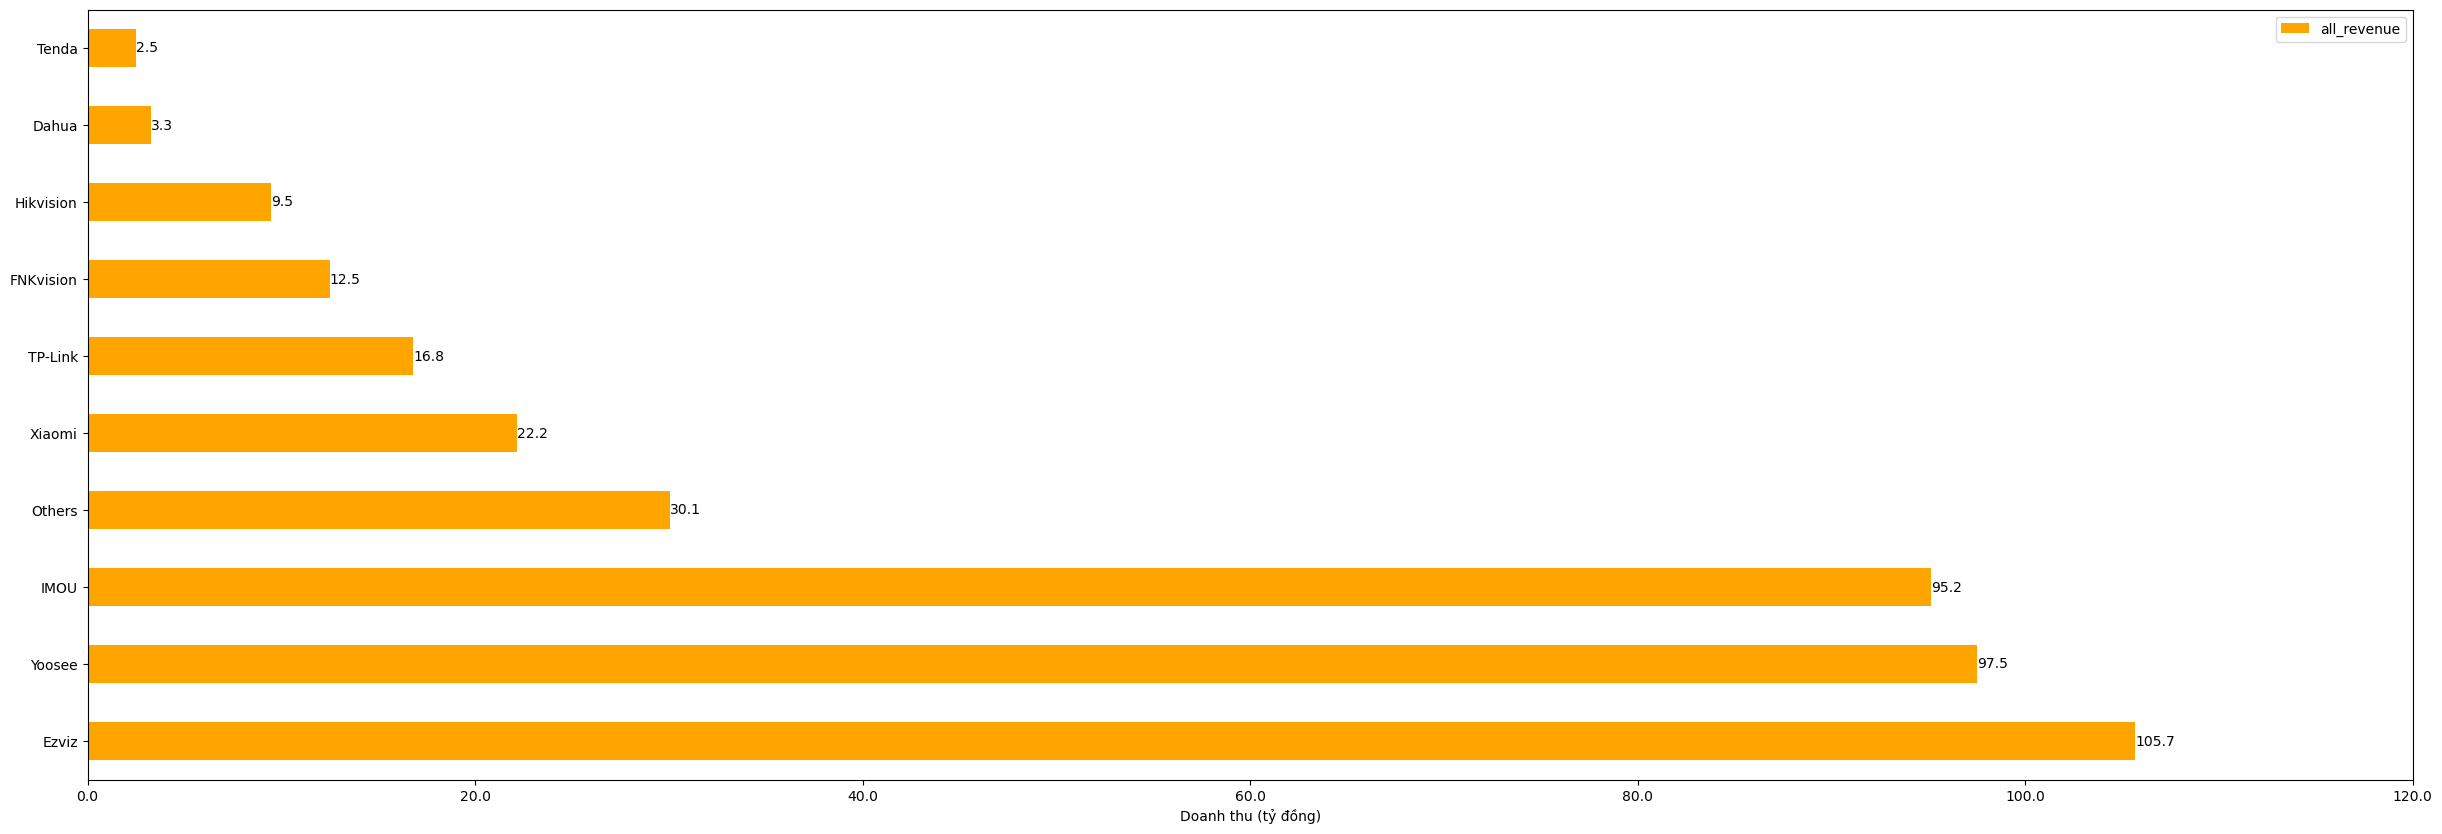

In [73]:
Shoppe_data = df_cleaned[df_cleaned["platform_id"] == "Shopee"]
pivot_brand_Shopee = pd.pivot_table(Shoppe_data, values='all_revenue', index='brand_normalized', aggfunc='sum')
sorted_pivot_brand_Shopee = pivot_brand_Shopee.sort_values(by='all_revenue', ascending=False)
top_10_brand_Shopee = sorted_pivot_brand_Shopee.head(10)

# Vẽ biểu đồ
ax = top_10_brand_Shopee.plot(kind="barh", stacked=True, figsize=(30, 10), color='orange')
plt.xticks(rotation=0)
plt.xlabel("Doanh thu (tỷ đồng)")
plt.xticks(ax.get_xticks(), [f'{x/1e9:.1f}' for x in ax.get_xticks()])
plt.ylabel("")

# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(top_10_brand_Shopee['all_revenue']):
    plt.text(value, i, f'{value/1e9:.1f}', ha='left', va='center')  

plt.show()



## Top 10 brands có doanh thu cao nhất tại nền tảng Lazada


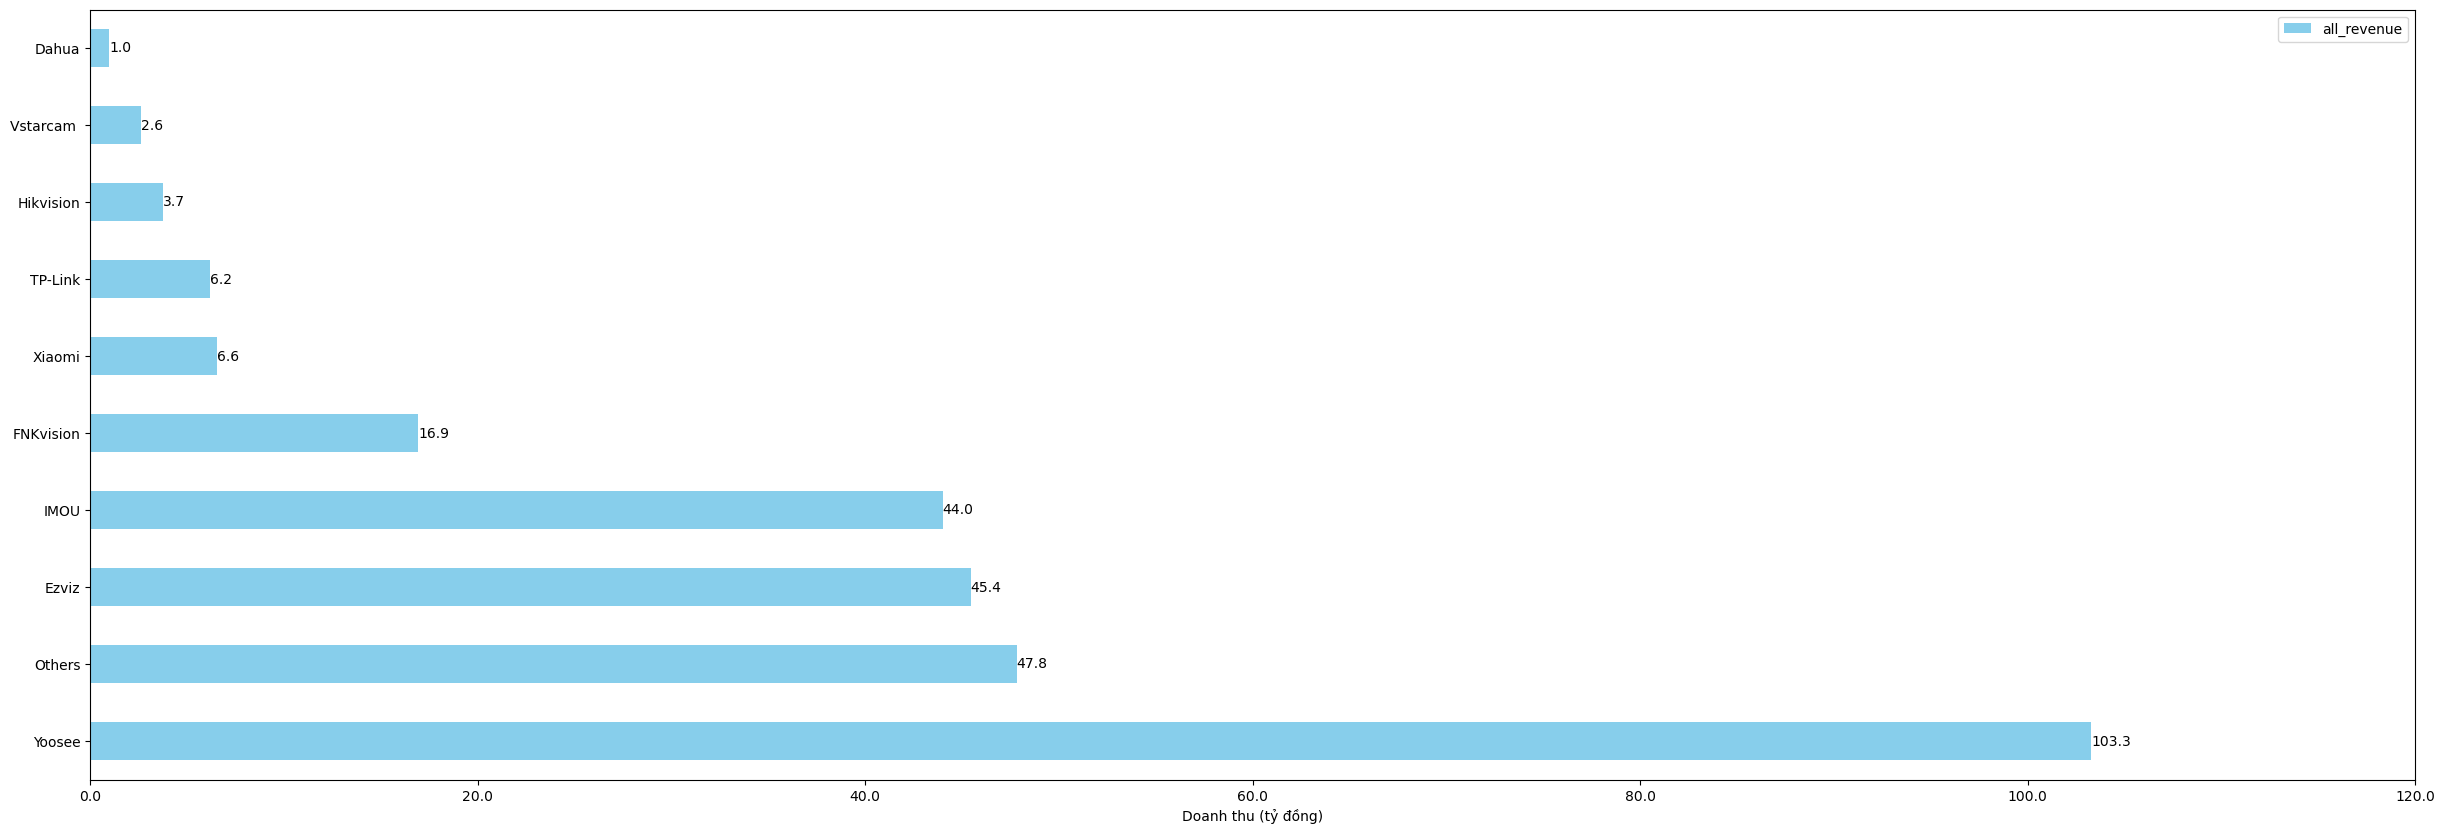

In [74]:
Lazada_data = df_cleaned[df_cleaned["platform_id"] == "Lazada"]
pivot_brand_Lazada = pd.pivot_table(Lazada_data, values='all_revenue', index='brand_normalized', aggfunc='sum')
sorted_pivot_brand_Lazada = pivot_brand_Lazada.sort_values(by='all_revenue', ascending=False)
top_10_brand_Lazada = sorted_pivot_brand_Lazada.head(10)

# Vẽ biểu đồ
ax = top_10_brand_Lazada.plot(kind ="barh",stacked =True,figsize = (30,10), color = 'skyblue')
plt.xticks(rotation = 0)
plt.xlabel("Doanh thu (tỷ đồng)")
plt.xticks(ax.get_xticks(), [f'{x/1e9:.1f}' for x in ax.get_xticks()])
plt.ylabel("")
# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(top_10_brand_Lazada['all_revenue']):
    plt.text(value, i, f'{value/1e9:.1f}', ha='left', va='center')  

plt.show()

## Top 10 brands có doanh thu cao nhất tại nền tảng Tiki


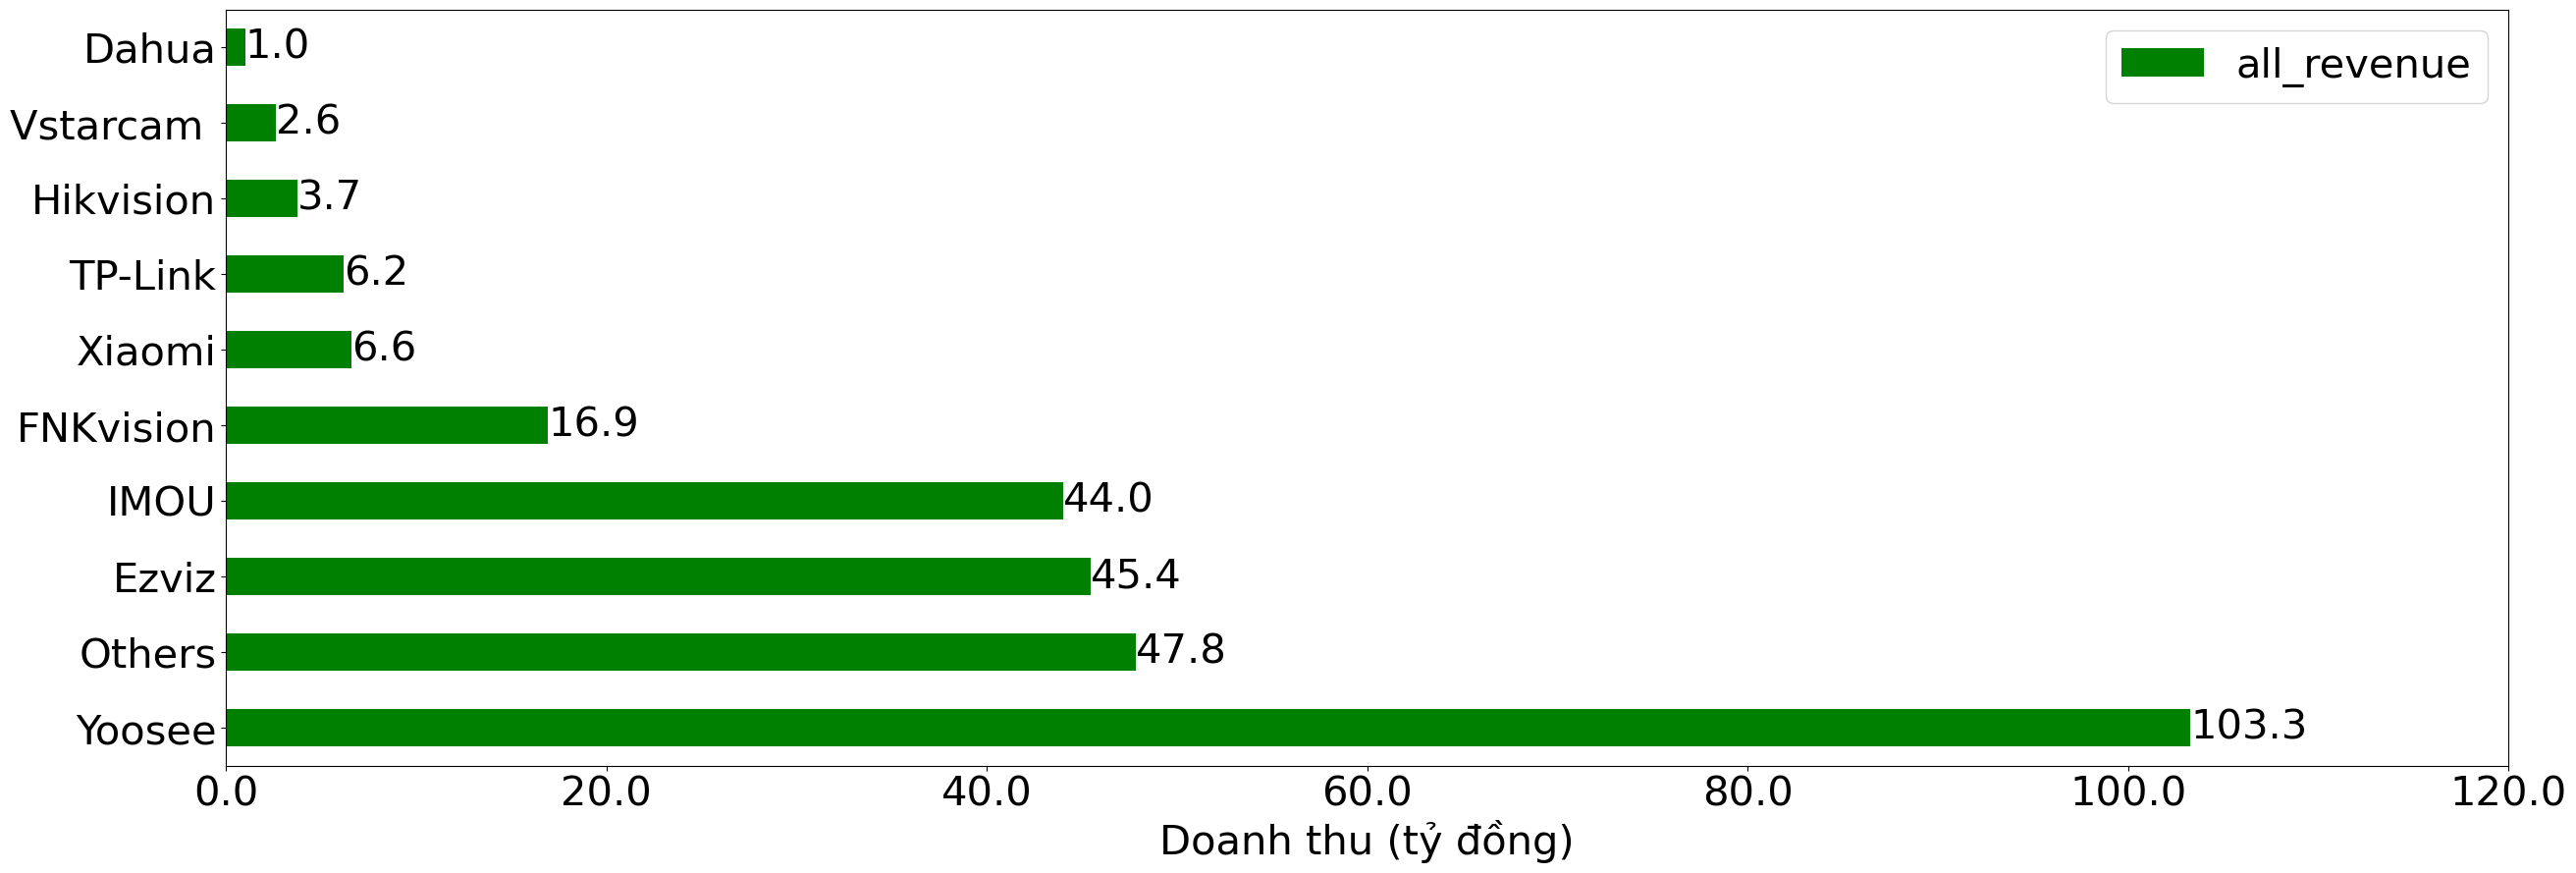

In [111]:
Tiki_data = df_cleaned[df_cleaned["platform_id"] == "Tiki"]
pivot_brand_Tiki = pd.pivot_table(Tiki_data, values='all_revenue', index='brand_normalized', aggfunc='sum')
sorted_pivot_brand_Tiki = pivot_brand_Tiki.sort_values(by='all_revenue', ascending=False)
top_10_brand_Tiki = sorted_pivot_brand_Tiki.head(10)

# Vẽ biểu đồ
ax = top_10_brand_Lazada.plot(kind ="barh",stacked =True,figsize = (30,10),color = 'green')
plt.xticks(rotation = 0)
plt.xlabel("Doanh thu (tỷ đồng)")
plt.xticks(ax.get_xticks(), [f'{x/1e9:.1f}' for x in ax.get_xticks()])
plt.ylabel("")
# Thêm giá trị trực tiếp trên đỉnh của từng cột bằng plt.text
for i, value in enumerate(top_10_brand_Lazada['all_revenue']):
    plt.text(value, i, f'{value/1e9:.1f}', ha='left', va='center')  
plt.show()

# Slide 10

## Top các sản phẩm có doanh thu cao nhất 


In [112]:
sorted_df_cleaned = df_cleaned.sort_values(by='all_revenue',ascending = False)
sorted_df_cleaned[["name_normalized","platform_id","total_sale","brand_normalized","url"]].head(20)

,name_normalized,platform_id,total_sale,brand_normalized,url
754,CAMERA IP YOOSEE 360 QUAN SÁT RÕ NGÀY VÀ ĐÊM K...,Shopee,50891,Yoosee,https://shopee.vn/product/55564549/1257717612
8848,Camera Wifi TPLink Tapo C200/ C210/ C211/ C212...,Shopee,20001,TP-Link,https://shopee.vn/product/24625047/4944886560
13754,FNKvisionCAMERA IP WIFI 5G YOOSEE 11 LED 5.0Mp...,Lazada,14428,FNKvision,https://www.lazada.vn/products/sp-i2031203756....
8326,Camera Wifi Ezviz C6N 1080p C6N 2mp kèm thẻ 32...,Shopee,12062,Ezviz,https://shopee.vn/product/108312379/3535779915
8622,Camera Wifi dòng P/T EZVIZC6N 1080P,Shopee,9220,Ezviz,https://shopee.vn/product/219490641/4315349694
8041,Camera IP YooSee Tiếng Việt Và Thẻ Nhớ Yoosee ...,Shopee,18671,Yoosee,https://shopee.vn/product/168581444/2757970418
10533,Camera WIFI XOAY 360 2M 4M IMOU Ranger 2 A42P ...,Shopee,8891,IMOU,https://shopee.vn/product/356131635/9464207731
8339,Camera ip wifi imou ranger a42ep 4M Quad HD a2...,Shopee,8190,IMOU,https://shopee.vn/product/190753408/3549055817
8378,Camera Imou A42P 4MP2K siêu nét DSS,Shopee,9224,IMOU,https://shopee.vn/product/50508055/3662077782
8166,Combo Camera Yoosee 3 râu 5.0Mpx sắc nét ban đ...,Shopee,15037,Yoosee,https://shopee.vn/product/156707818/3124392876


# Slide 11

# Phân tích Brand Ezviz

## Doanh số Brand Ezviz

In [77]:
## Doanh số
ezviz_shop["all_revenue"].sum()


163582048865

## Thị phần doanh thu so với thị trường

In [78]:
(ezviz_shop["all_revenue"].sum() / df_cleaned["all_revenue"].sum())*100 

23.194241482618036

## Sản lượng Brand Ezviz

In [79]:
ezviz_shop["all_sale"].sum()

252780

## Thị phần sản lượng so với thị trường

In [80]:
(ezviz_shop["all_sale"].sum() / df_cleaned["all_sale"].sum())*100 

17.699028296879877

## Tăng trưởng doanh số theo tháng của brand Ezviz

In [81]:
months_columns = [
       'revenue_202210', 'revenue_202211',
       'revenue_202212', 'revenue_202301',
       'revenue_202302', 'revenue_202303',
       'revenue_202304', 'revenue_202305',
       'revenue_202306', 'revenue_202307',
       'revenue_202308', 'revenue_202309']
ezviz_revenue_month = pd.pivot_table(ezviz_shop, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
percent_month_ezviz_revenue = []
for month in ezviz_revenue_month.columns:
    for revenue in ezviz_revenue_month[month]:
        percent_month_ezviz_revenue.append(round((revenue/(ezviz_revenue_month[month]).sum() * 100),2))

print(percent_month_ezviz_revenue)

[27.99, 63.8, 8.21, 27.08, 60.66, 12.26, 26.31, 60.55, 13.14, 23.97, 62.97, 13.06, 28.17, 64.36, 7.47, 38.59, 54.63, 6.78, 26.8, 65.73, 7.46, 30.46, 64.18, 5.36, 35.56, 59.26, 5.17, 28.64, 66.68, 4.69, 19.84, 74.77, 5.4, 16.82, 79.67, 3.51]


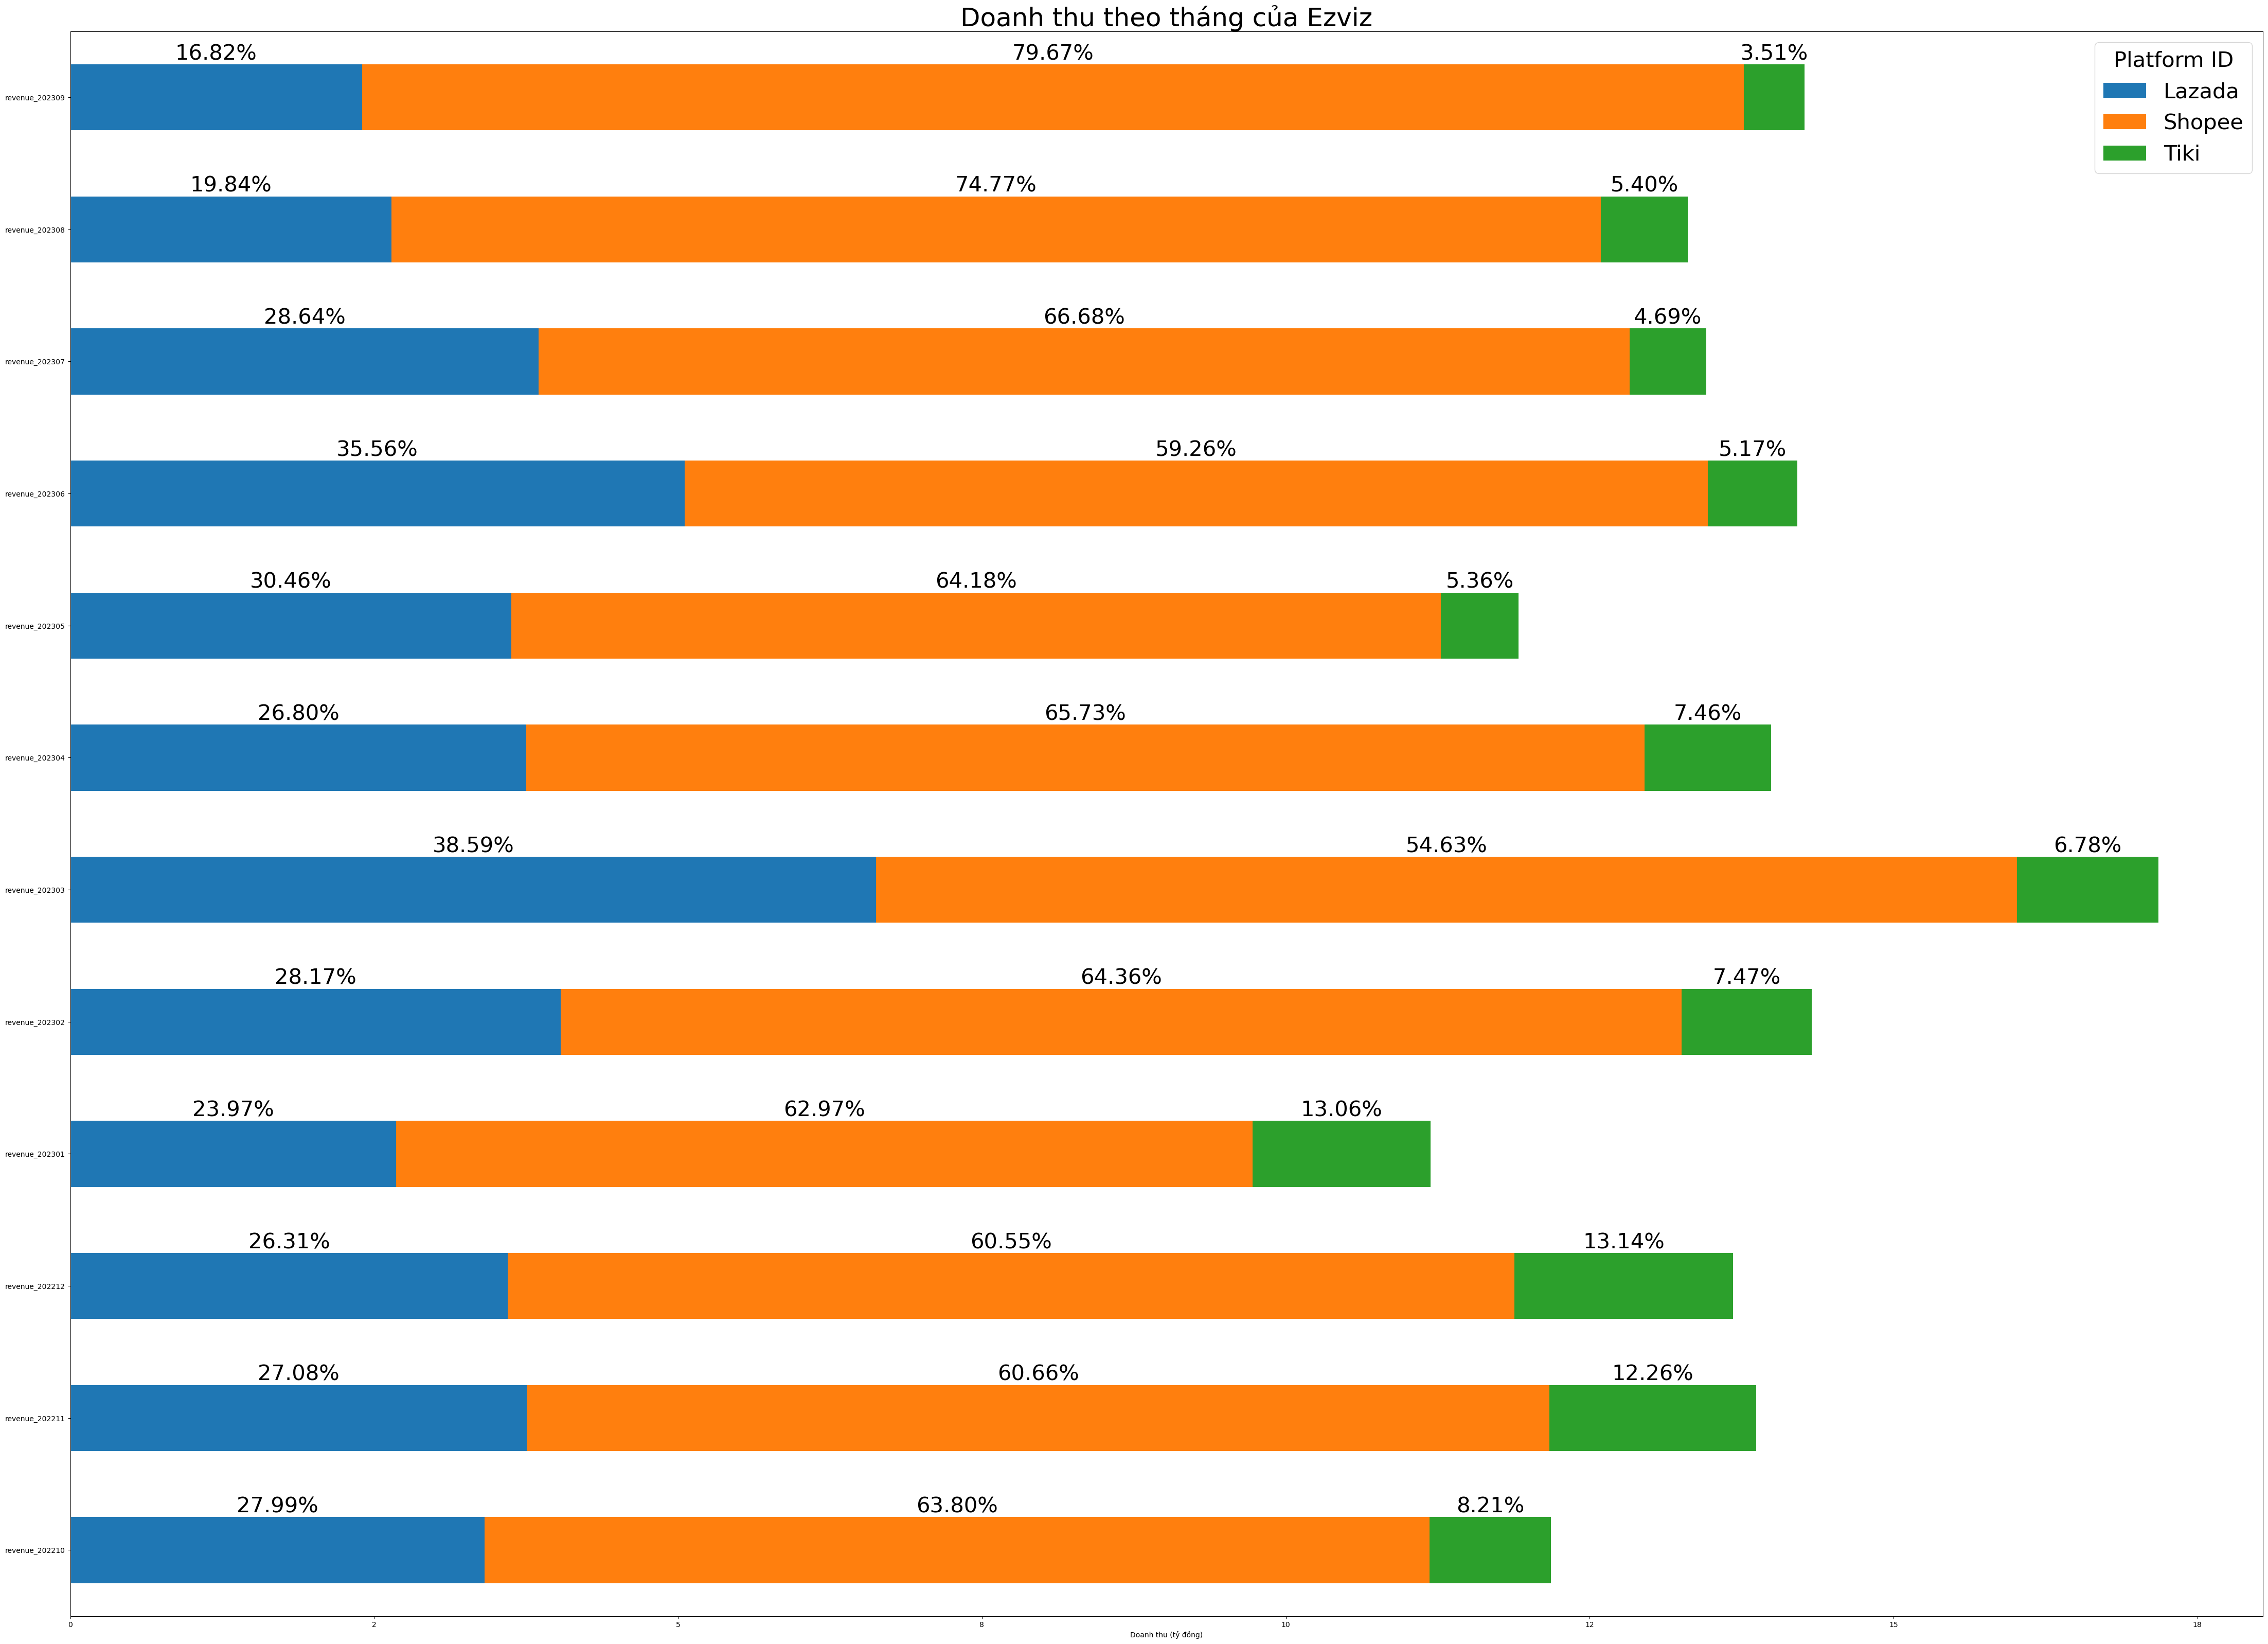

In [82]:
# Vẽ biểu đồ cột
ax = ezviz_revenue_month.transpose().plot(kind="barh", stacked=True, figsize=(55, 40))

# Cấu hình cỡ chữ mặc định
plt.rcParams.update({'font.size': 30})

# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
value = [27.99, 27.08, 26.31, 23.97, 28.17,38.59, 26.8, 30.46, 35.56, 28.64, 19.84, 16.82, 63.8, 60.66, 60.55, 62.97, 64.36, 54.63, 65.73, 64.18, 59.26, 66.68, 74.77, 79.67, 8.21, 12.26, 13.14, 13.06, 7.47,  6.78, 7.46, 5.36, 5.17, 4.69, 5.4, 3.51]

for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width / 2, y + height, f'{value[i]:.2f}%', ha='center', va='bottom', color='black')

# Thiết lập tiêu đề và nhãn trục
plt.title('Doanh thu theo tháng của Ezviz')
plt.xticks(rotation=0)
plt.xlabel('Doanh thu (tỷ đồng)')

# Định dạng lại nhãn trục tung để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Chuyển đổi legend
ax.legend(title='Platform ID')

# Hiển thị biểu đồ
plt.show()


## Doanh số của các mức giá tại brand Ezviz

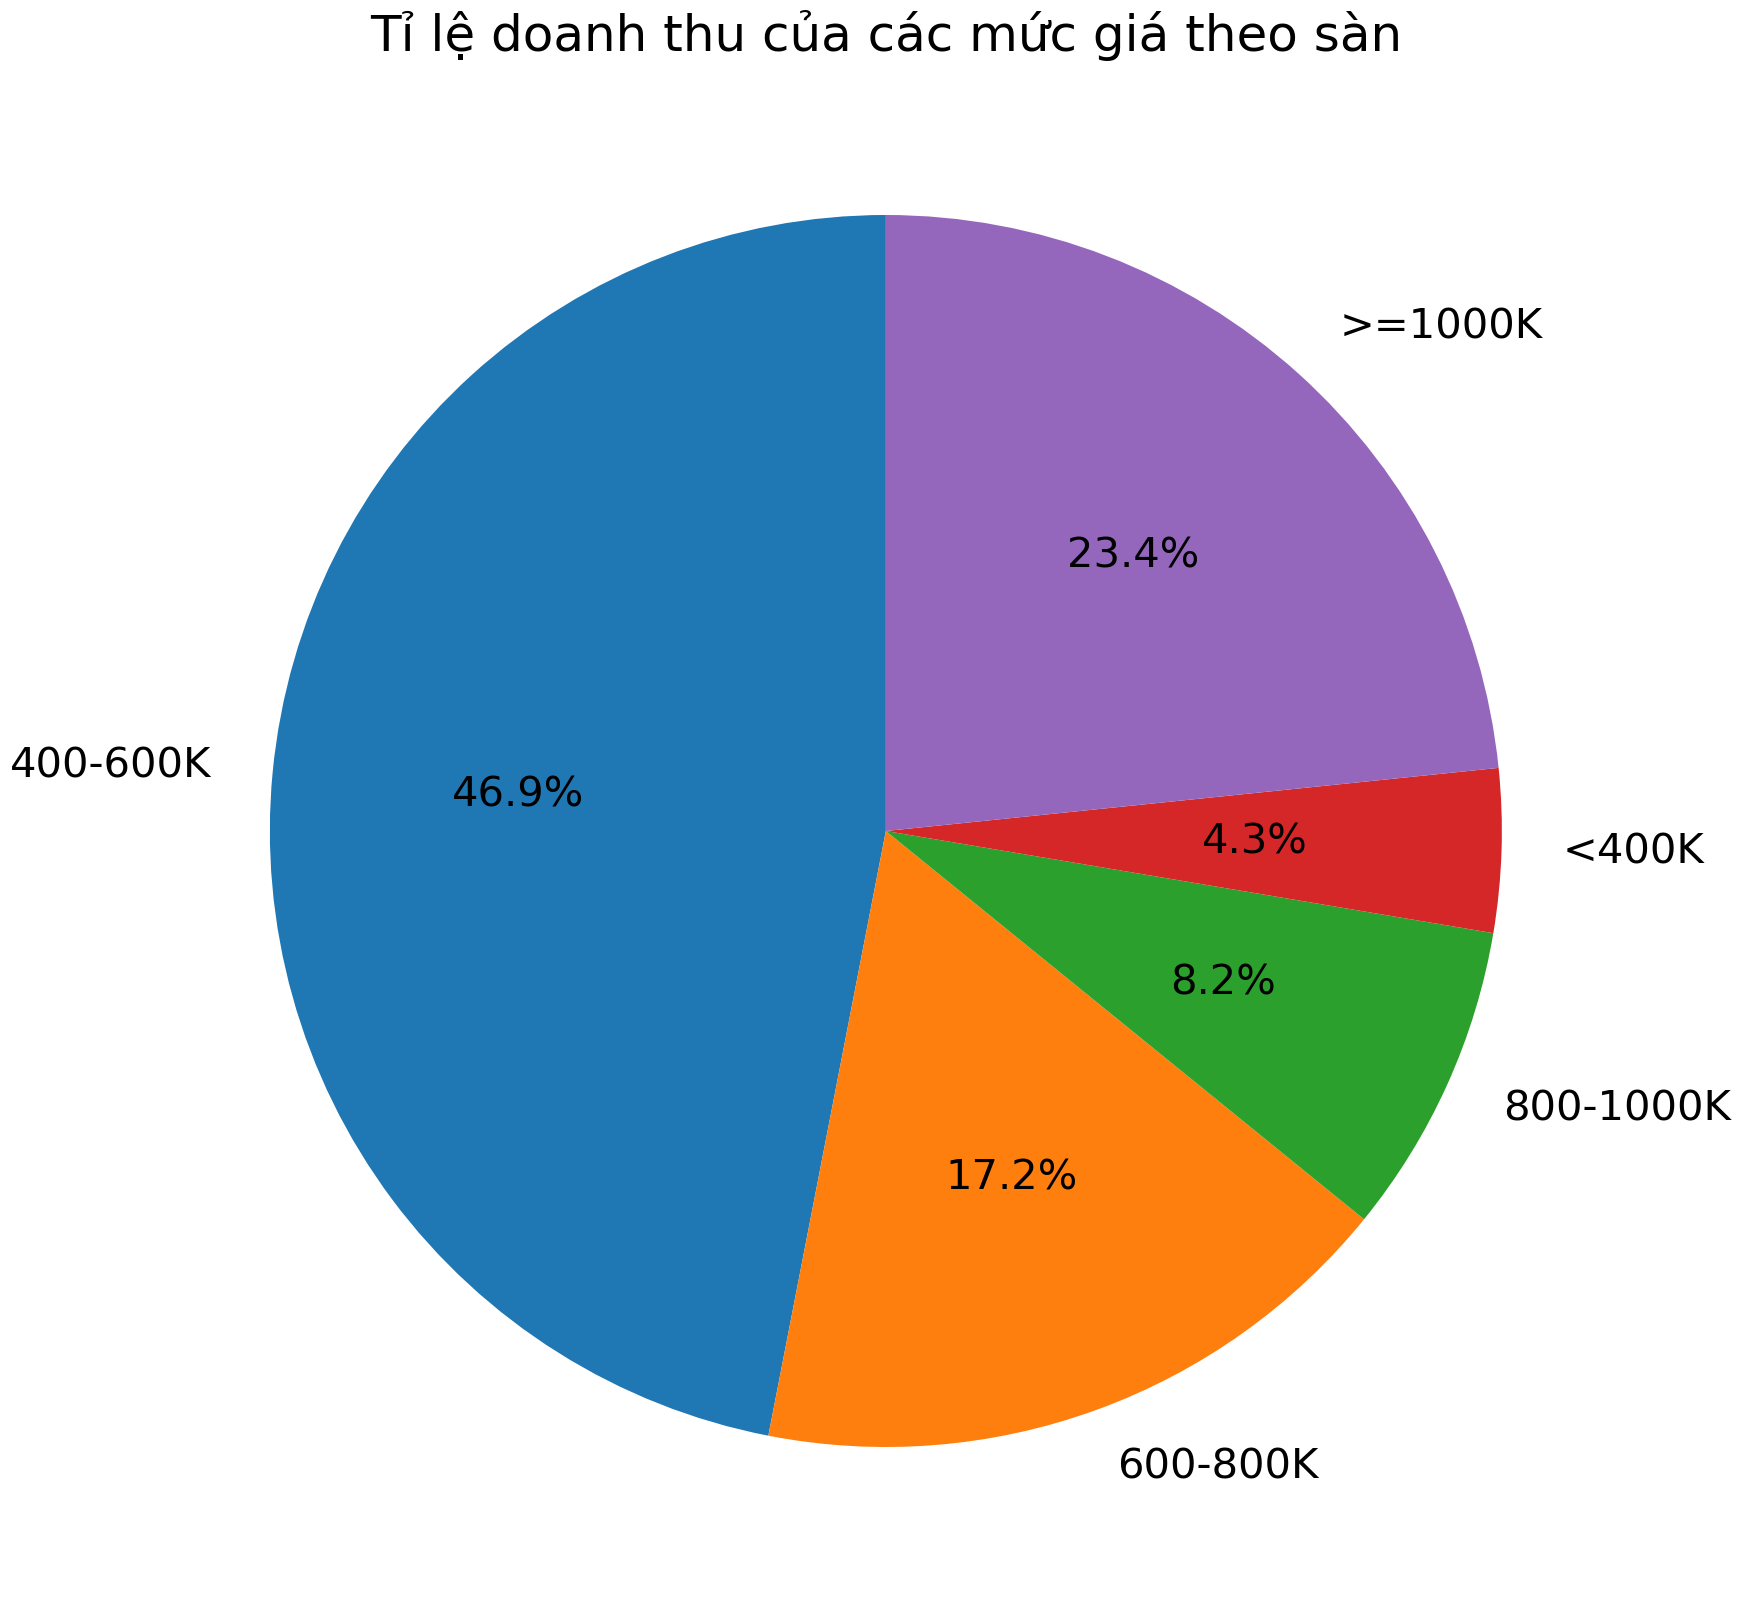

In [83]:
ezviz_price = ezviz_shop.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')
# Vẽ biểu đồ tròn
ax = ezviz_price.plot(kind="pie", y='all_revenue', autopct='%1.1f%%', startangle=90, figsize=(20, 20), legend=False)

# Tiêu đề
plt.title('Tỉ lệ doanh thu của các mức giá theo sàn')
ax.set_ylabel('')
# Hiển thị
plt.show()

## Tăng trưởng sản lượng theo tháng


In [84]:
months_columns = [
       'sale_202210', 'sale_202211',
       'sale_202212', 'sale_202301',
       'sale_202302', 'sale_202303',
       'sale_202304', 'sale_202305',
       'sale_202306', 'sale_202307',
       'sale_202308', 'sale_202309']
pivot_df = pd.pivot_table(ezviz_shop, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

,sale_202210,sale_202211,sale_202212,sale_202301,sale_202302,sale_202303,sale_202304,sale_202305,sale_202306,sale_202307,sale_202308,sale_202309
platform_id,,,,,,,,,,,,
Lazada,4450,5138,5067,3719,4830,7178,4255,4156,6308,5083,3431,3262
Shopee,13512,13488,13329,11401,15760,16661,15429,13039,13861,15115,16756,17599
Tiki,1712,2761,2735,2432,1796,1886,1534,1012,1103,1029,1161,792
Total,19674,21387,21131,17552,22386,25725,21218,18207,21272,21227,21348,21653


## Doanh thu của Ezviz của từng nền tảng theo tháng

In [85]:
months_columns = [
       'revenue_202210', 'revenue_202211',
       'revenue_202212', 'revenue_202301',
       'revenue_202302', 'revenue_202303',
       'revenue_202304', 'revenue_202305',
       'revenue_202306', 'revenue_202307',
       'revenue_202308', 'revenue_202309']
pivot_df = pd.pivot_table(ezviz_shop, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

,revenue_202210,revenue_202211,revenue_202212,revenue_202301,revenue_202302,revenue_202303,revenue_202304,revenue_202305,revenue_202306,revenue_202307,revenue_202308,revenue_202309
platform_id,,,,,,,,,,,,
Lazada,3409394429,3756576826,3599207541,2681944808,4035371130,6630457822,3751122417,3629215226,5052809020,3854413636,2640065640,2399847469
Shopee,7771852598,8413435920,8282497758,7046314314,9221254540,9385806784,9198937968,7647674799,8419774159,8973778066,9950402937,11367205938
Tiki,1000668707,1700728293,1797007288,1461630193,1070416702,1164756773,1044494581,638198857,734726538,630749513,718386886,500922789
Total,12181915734,13870741039,13678712587,11189889315,14327042372,17181021379,13994554966,11915088882,14207309717,13458941215,13308855463,14267976196


## Các sản phẩm bán chạy của Ezviz shop

In [113]:
sorted_ezviz_shop = ezviz_shop.sort_values(by='all_revenue',ascending = False)
sorted_ezviz_shop[["name_normalized","platform_id","total_sale","brand_normalized","url"]].head(15)

,name_normalized,platform_id,total_sale,brand_normalized,url
8326,Camera Wifi Ezviz C6N 1080p C6N 2mp kèm thẻ 32...,Shopee,24693.00,Ezviz,https://shopee.vn/product/108312379/3535779915
8622,Camera Wifi dòng P/T EZVIZC6N 1080P,Shopee,28408.00,Ezviz,https://shopee.vn/product/219490641/4315349694
8699,Camera ip wifi ezviz C6N 4M 1080P 2M xoay 360 ...,Shopee,16066.00,Ezviz,https://shopee.vn/product/190753408/4507400912
19688,Camera IP Wifi Trong Nhà EZVIZ C6N 1080p,Tiki,42713.00,Ezviz,https://tiki.vn/sp-p41319582.html?spid=48652710
958,Camera wifi Ezviz C6N/TY2/TY1 1080p2M 4M Xoay ...,Shopee,11984.00,Ezviz,https://shopee.vn/product/634754185/13273595298
290,Camera wifi Ezviz C6N 1080P xoay 360 độ theo d...,Shopee,6109.00,Ezviz,https://shopee.vn/product/585862174/10981815721
15194,Camera IP/Wifi Ezviz C6N 2MP Smart IrTầm Nhìn ...,Lazada,2984.00,Ezviz,https://www.lazada.vn/products/sp-i2175897924....
17939,Camera EZVIZ C6N 2mp 1080p trong nhà c6n ezviz...,Lazada,8119.00,Ezviz,https://www.lazada.vn/products/sp-i685328751.html
2601,Camera Wifi dòng P/T EZVIZC6N 4MP 2K,Shopee,4262.00,Ezviz,https://shopee.vn/product/219490641/17408270328
19715,Camera IP Wifi Trong Nhà EZVIZ C6N 1080p,Tiki,6389.00,Ezviz,https://tiki.vn/sp-p46462092.html?spid=48657149


# Slide 12

# Phân tích Brand Yoosee

In [87]:
yoosee_shop = df_cleaned[df_cleaned["brand_normalized"] == "Yoosee"]
yoosee_shop.shape[0]

3758

## Doanh số của Brand Yoosee

In [88]:
yoosee_shop["all_revenue"].sum()

204359455489

## Thị phần doanh thu so với thij trường


In [89]:
(yoosee_shop["all_revenue"].sum() / df_cleaned["all_revenue"].sum())*100 

28.976055702664326

## Sản lượng của brand Yoose

In [90]:
yoosee_shop["all_sale"].sum()

575567

## Thị phần sản lượng so với thị trường

In [91]:
(yoosee_shop["all_sale"].sum() / df_cleaned["all_sale"].sum())*100 

40.2997730032054

## Tăng trưởng sản lượng theo tháng của brand Yoosee


In [92]:
months_columns = [
       'sale_202210', 'sale_202211',
       'sale_202212', 'sale_202301',
       'sale_202302', 'sale_202303',
       'sale_202304', 'sale_202305',
       'sale_202306', 'sale_202307',
       'sale_202308', 'sale_202309']
pivot_df = pd.pivot_table(yoosee_shop, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

,sale_202210,sale_202211,sale_202212,sale_202301,sale_202302,sale_202303,sale_202304,sale_202305,sale_202306,sale_202307,sale_202308,sale_202309
platform_id,,,,,,,,,,,,
Lazada,15689,24043,25517,13672,17376,18803,19069,23714,24335,21929,18061,13362
Shopee,31047,20138,53302,15951,20355,22125,23295,23113,25899,30923,34157,31325
Tiki,348,808,522,529,501,1949,835,507,508,577,576,707
Total,47084,44989,79341,30152,38232,42877,43199,47334,50742,53429,52794,45394


## Doanh thu của Yoosee của từng nền tảng theo tháng

In [93]:
months_columns = [
       'revenue_202210', 'revenue_202211',
       'revenue_202212', 'revenue_202301',
       'revenue_202302', 'revenue_202303',
       'revenue_202304', 'revenue_202305',
       'revenue_202306', 'revenue_202307',
       'revenue_202308', 'revenue_202309']
yoosee_revenue_month = pd.pivot_table(yoosee_shop, 
                           index='platform_id', 
                           values= months_columns, 
                           aggfunc='sum', 
                           fill_value=0)
percent_month_yoosee_revenue = []
for month in yoosee_revenue_month.columns:
    for revenue in yoosee_revenue_month[month]:
        percent_month_yoosee_revenue.append(round((revenue/(yoosee_revenue_month[month]).sum() * 100),2))
print(percent_month_yoosee_revenue)

[40.63, 58.23, 1.14, 59.68, 38.13, 2.18, 41.74, 57.33, 0.93, 51.77, 45.9, 2.33, 52.5, 45.79, 1.72, 51.75, 43.27, 4.98, 53.61, 44.24, 2.15, 61.04, 37.73, 1.23, 59.84, 39.09, 1.07, 53.0, 45.8, 1.2, 45.22, 53.4, 1.37, 38.96, 59.07, 1.97]


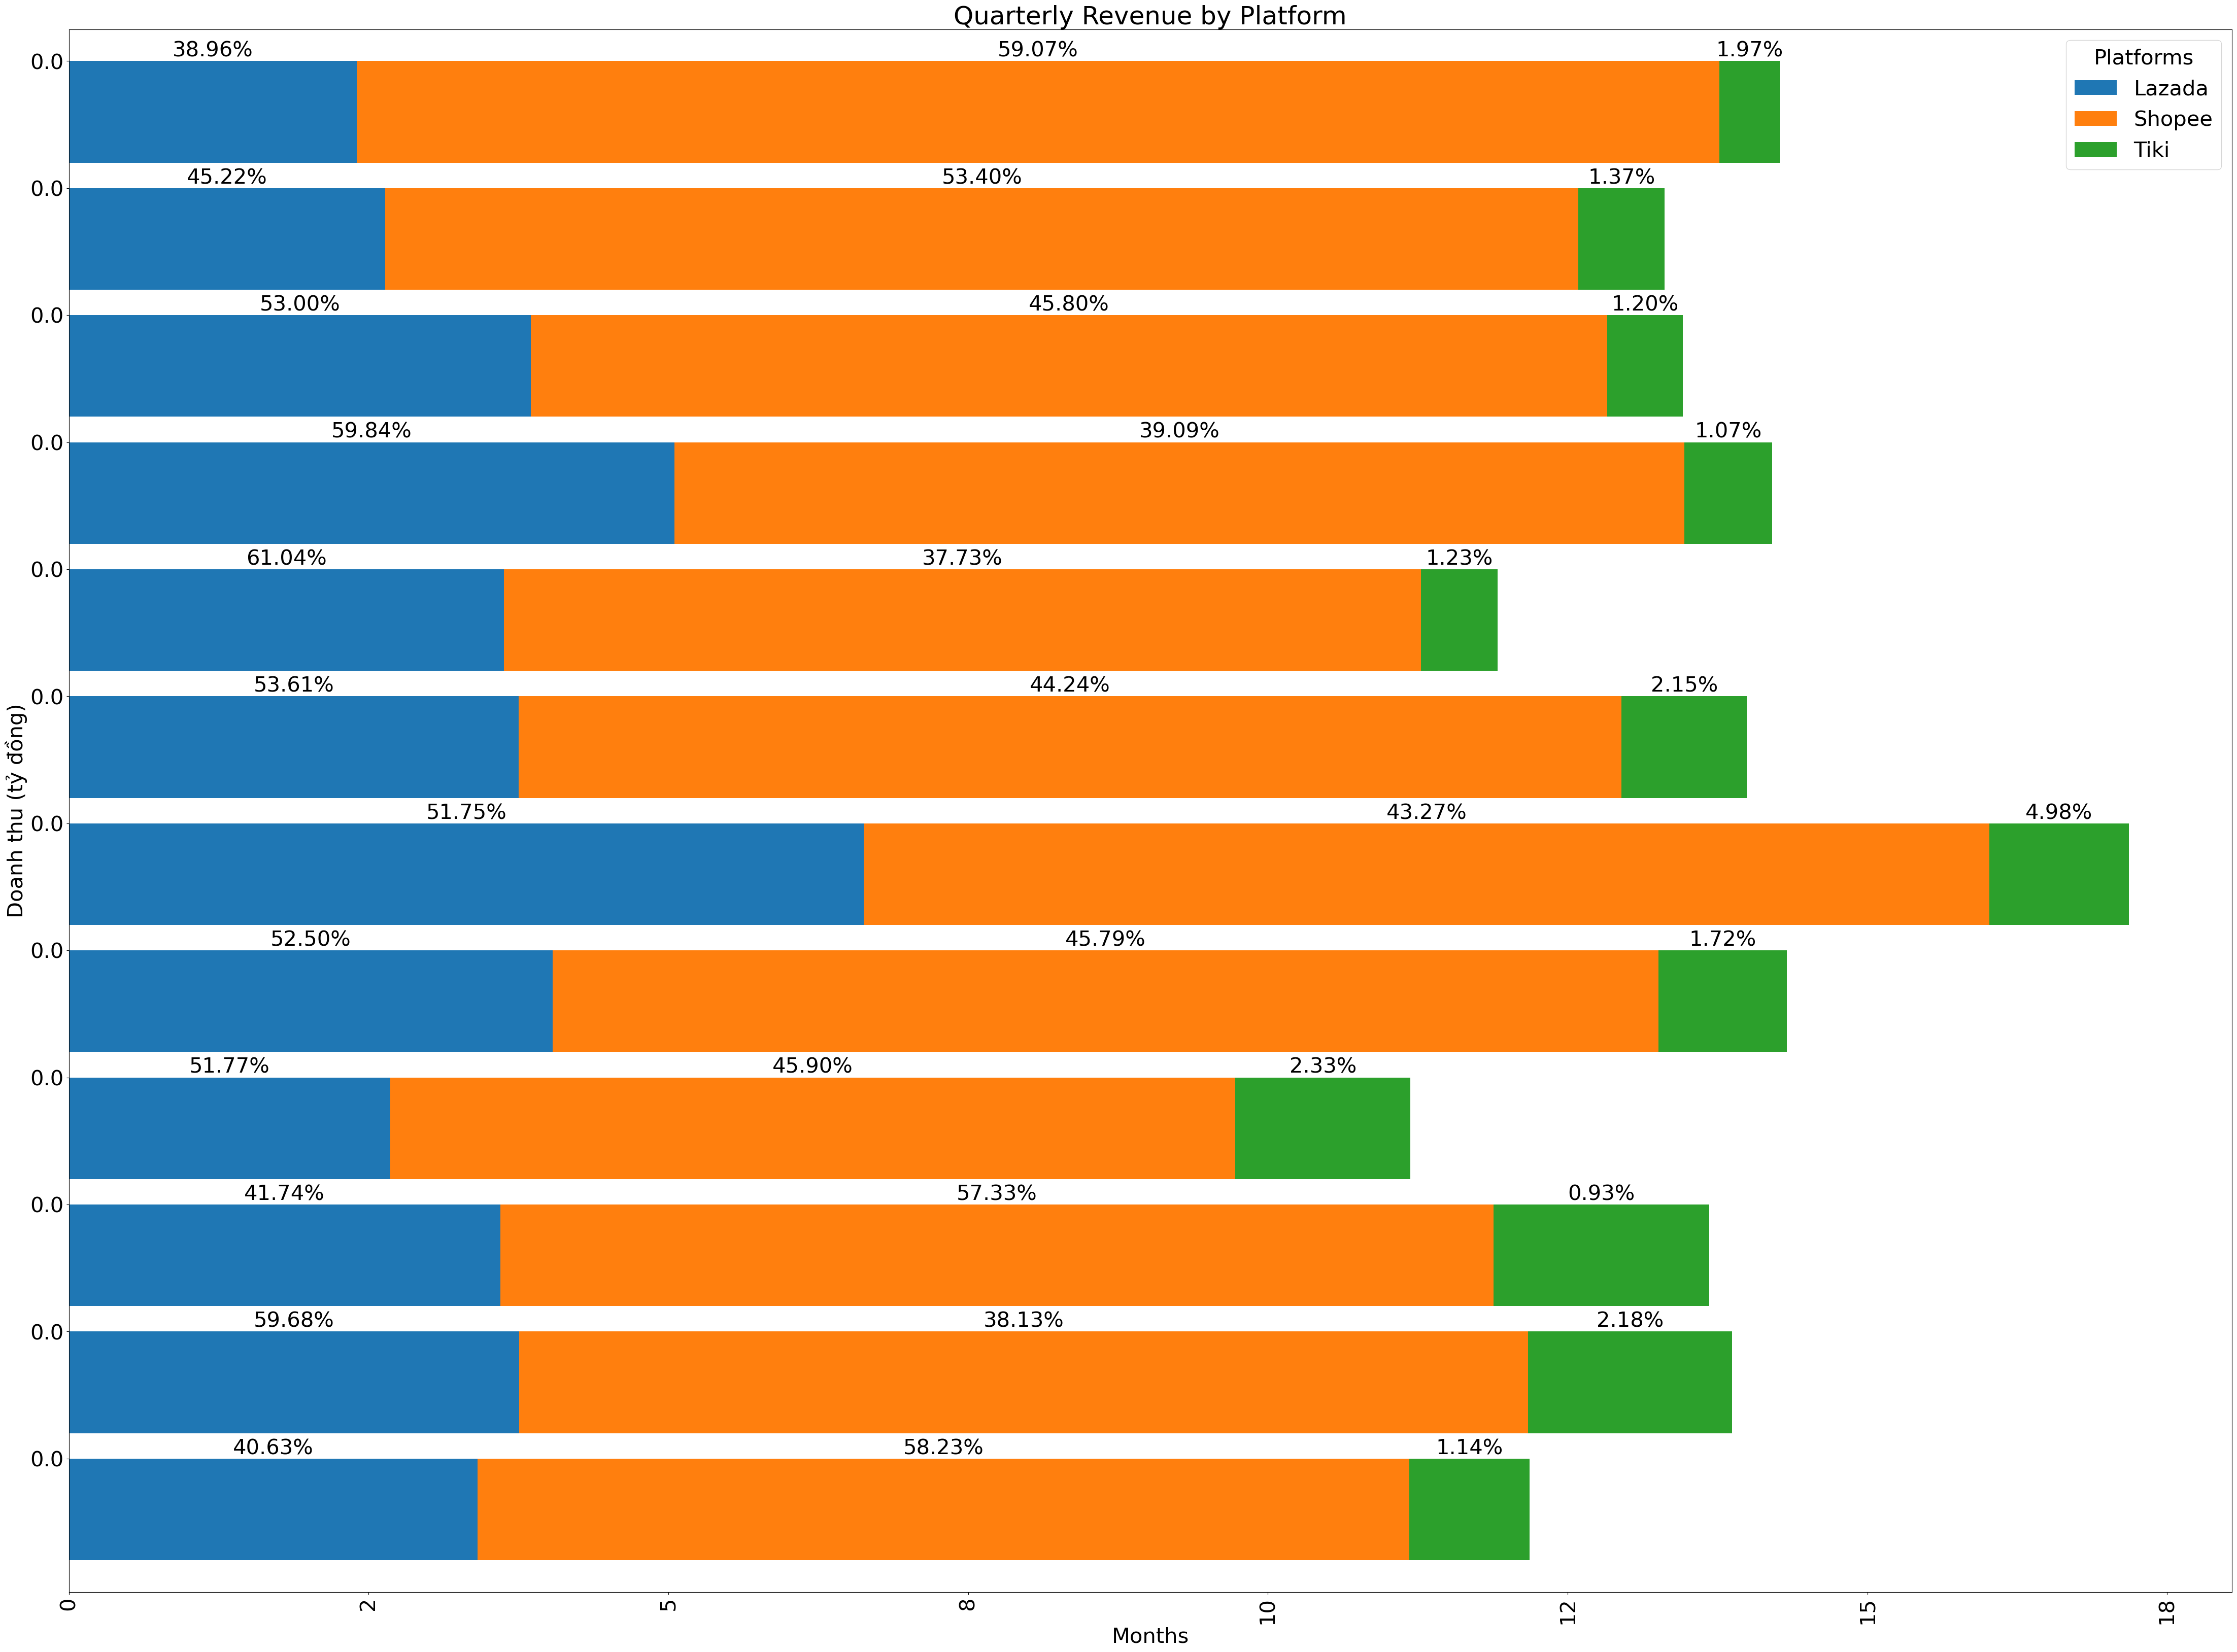

In [94]:
# Vẽ biểu đồ cột và điều chỉnh khoảng cách giữa các cột
ax = ezviz_revenue_month.transpose().plot(kind='barh', stacked=True, figsize=(55, 40), width=0.8, position=1)

# Thiết lập tiêu đề và nhãn trục
plt.title('Quarterly Revenue by Platform')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.xticks(rotation=90)  # Góc quay của nhãn trục x
plt.ylabel('Doanh thu (tỷ đồng)')
plt.yticks(ax.get_yticks(), [f'{y/1e9:.1f}' for y in ax.get_yticks()])

# Hiển thị biểu đồ và legend
plt.legend(title='Platforms', bbox_to_anchor=(1, 1))  # bbox_to_anchor để đặt vị trí của legend

# Hiển thị giá trị cụ thể trên đỉnh của mỗi cột
value = [40.63, 59.68, 41.74, 51.77, 52.5,51.75, 53.61, 61.04, 59.84, 53.0, 45.22, 38.96,58.23,38.13,57.33, 45.9, 45.79, 43.27, 44.24,37.73, 39.09, 45.8, 53.4, 59.07,1.14, 2.18, 0.93, 2.33, 1.72, 4.98,2.15, 1.23, 1.07, 1.2, 1.37, 1.97]

for i, patch in enumerate(ax.patches):
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width / 2, y + height, f'{value[i]:.2f}%', ha='center', va='bottom', color='black')

# Định dạng lại nhãn trục tung để hiển thị đơn vị nghìn
def thousands_formatter(x, pos):
    return f'{x/1e9:.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Hiển thị biểu đồ
plt.show()

## Doanh số các mức giá tại Yoosee

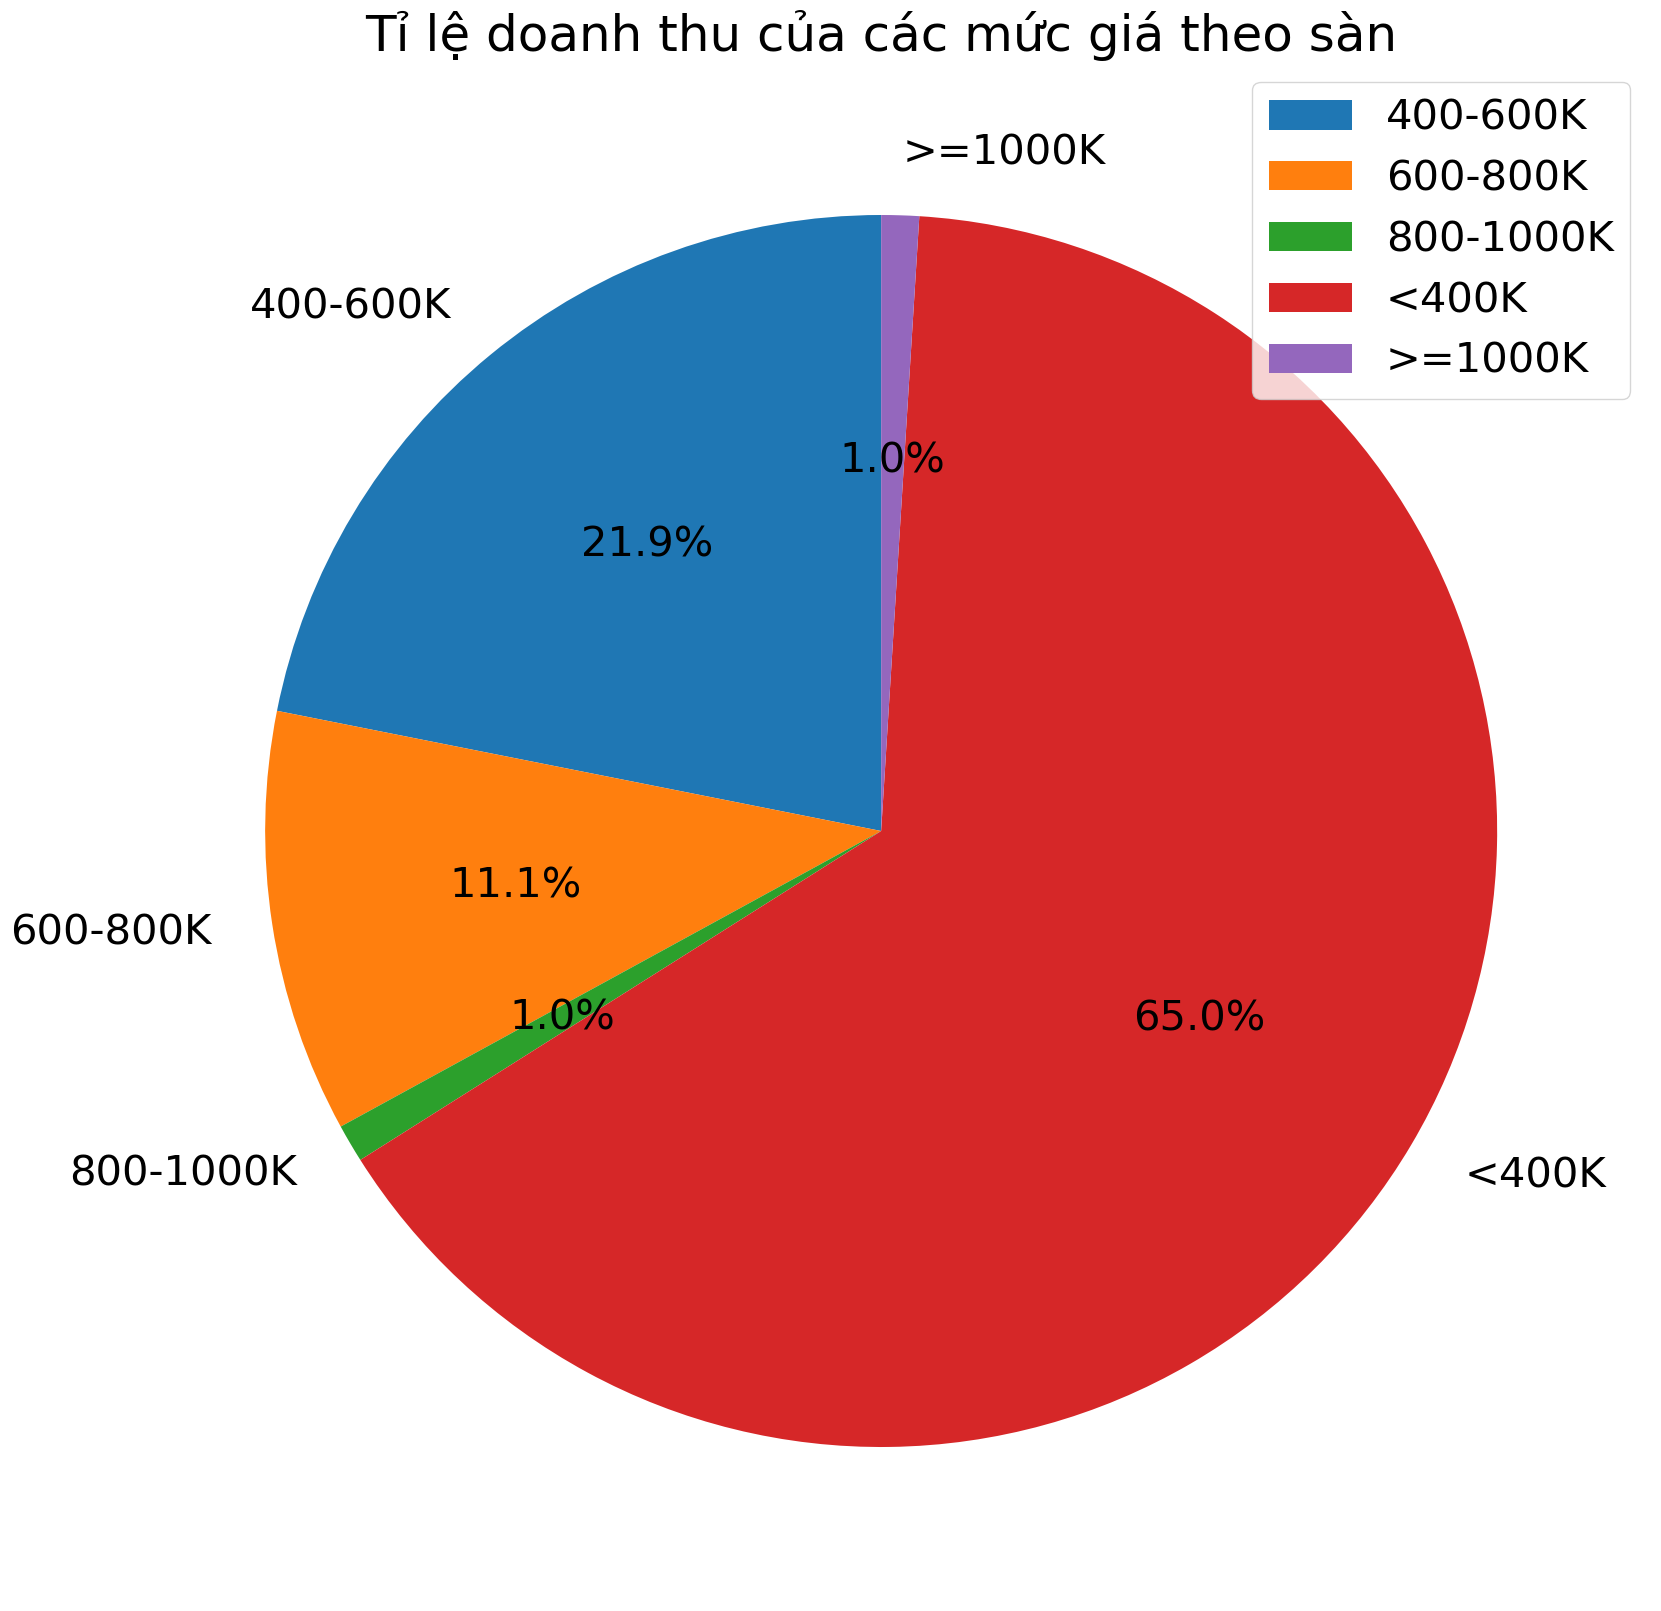

In [95]:
yoosee_price = yoosee_shop.pivot_table(values='all_revenue', index='price_range', aggfunc='sum')
# Vẽ biểu đồ tròn
ax = yoosee_price.plot(kind="pie", y='all_revenue', autopct='%1.1f%%', startangle=90, figsize=(20, 20), legend=True)

# Tiêu đề
plt.title('Tỉ lệ doanh thu của các mức giá theo sàn')
ax.set_ylabel('')
# Hiển thị
plt.show()